 # WATER POTABILITY PREDICTION MODEL

The dataset used for this model was gotten from https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('Datasets/aquaattributes.xlsx')

In [3]:
df.head(20)

Stationcode                                         Locations        Lat  \
0          1001                                BEAS AT U/S MANALI  32.244947   
1          1002                                  BEAS AT D/S KULU  31.960582   
2          1003                                   BEAS AT D/S AUT  26.887893   
3          1004                            BEAS AT U/S PANDON DAM  47.351943   
4          1005          BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE  25.992786   
5          1550                                         U/S MANDI  31.708165   
6          1006                                 BEAS AT D/S MANDI  31.708165   
7          2604                           BEAS AT D/S JAISINGHPUR  31.899643   
8          1007                               BEAS AT D/S ALAMPUR  15.884349   
9          1008                          BEAS AT D/S DEHRAGOPIPUR  31.881756   
10         1009                              BEAS AT D/S PONG DAM  31.976579   
11         1693                               BEAS AT TALWARA H/W  31.931129   
12         1694                                     U/S PATHANKOT  32.264338   
13         1695                                     U/S PATHANKOT  32.264338   
14         1010                 BEAS AT MIRTHAL BRIDGE, GURDASPUR  31.940009   
15         1294  BEAS AT 1KM.D/S OF EFFL. DISH. POINT AT MUKERIAN  31.940009   
16         1011       BEAS AT G.T.ROAD UNDER BDG. NEAR KAPURTHALA  31.371480   
17         1696                                      U/S GOINDWAL  31.363840   
18         1012         BEAS AT 100M D/S INDUST. DISCH. GOINDWAL   31.363840   
19         1697                                    BEAS AT HARIKE  31.170000   

          Lon Capitalcity             State  Temperature   D.O   pH  \
0   77.191080      Shimla  HIMACHAL PRADESH          9.0   9.0  8.0   
1   77.114009      Shimla  HIMACHAL PRADESH         10.0   9.0  8.0   
2   75.811484      Shimla  HIMACHAL PRADESH         11.0   9.0  8.0   
3   19.633621      Shimla  HIMACHAL PRADESH         13.0   9.0  8.0   
4   91.826111      Shimla  HIMACHAL PRADESH         14.0  10.0  8.0   
5   76.931367      Shimla  HIMACHAL PRADESH         16.0   9.0  8.0   
6   76.931367      Shimla  HIMACHAL PRADESH         16.0   9.0  8.0   
7   76.597945      Shimla  HIMACHAL PRADESH         19.0   8.0  8.0   
8   78.119382      Shimla  HIMACHAL PRADESH         19.0   8.0  8.0   
9   76.214645      Shimla  HIMACHAL PRADESH         19.0   8.0  8.0   
10  76.050795      Shimla  HIMACHAL PRADESH         20.0   8.0  8.0   
11  75.894059  Chandigarh            PUNJAB         15.0   8.0  8.0   
12  75.642112  Chandigarh            PUNJAB         18.0   7.0  8.0   
13  75.642112  Chandigarh            PUNJAB         15.0   7.0  7.0   
14  75.247906  Chandigarh            PUNJAB         15.0   8.0  8.0   
15  75.247906  Chandigarh            PUNJAB         14.0   7.0  7.0   
16  75.393681  Chandigarh            PUNJAB         14.0   7.0  7.0   
17  75.137025  Chandigarh            PUNJAB         16.0   7.0  7.0   
18  75.137025  Chandigarh            PUNJAB         17.0   7.0  7.0   
19  75.200000  Chandigarh            PUNJAB         16.0   7.0  8.0   

   Conductivity  B.O.D Nitrate Fecalcaliform  Totalcaliform class  
0            85   0.10     0.2           106          397.0   yes  
1           102   0.30     0.4           153          954.0   yes  
2            96   0.20     0.3            58          653.0   yes  
3            94   0.20     0.4            34          317.0   yes  
4           112   0.20     0.5           213         1072.0   yes  
5           117   0.20     0.5           100          722.0   yes  
6           155   0.50     0.7           445         1855.0   yes  
7           211   0.50     0.5             7           72.0   yes  
8           202   0.60     0.4             9          123.0   yes  
9           280   0.70     1.1            10          157.0   yes  
10          177   0.50     0.4             7           92.0   yes  
11          285

In [4]:
df.shape

(1361, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [6]:
df.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      37
B.O.D             68
Nitrate          209
Fecalcaliform    188
Totalcaliform    135
class              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(967, 15)

In [9]:
df.isnull().sum()

Stationcode      0
Locations        0
Lat              0
Lon              0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    object 
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    object 
 12  Fecalcaliform  967 non-null    object 
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 120.9+ KB


In [11]:
cndt = df['Conductivity']

In [12]:
[x for x in cndt.apply(type).unique()]

[int, float]

In [13]:
df['Conductivity'] = df['Conductivity'].astype(float)

In [14]:
nitr = df['Nitrate']

In [15]:
[x for x in nitr.apply(type).unique()]

[float, int]

In [16]:
df['Nitrate'] = df['Nitrate'].astype(float)

In [17]:
fclf = df['Fecalcaliform']

In [18]:
[x for x in fclf.apply(type).unique()]

[int, float]

In [19]:
df['Fecalcaliform'] = df['Fecalcaliform'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    float64
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    float64
 12  Fecalcaliform  967 non-null    float64
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 120.9+ KB


In [21]:
df.describe()

Stationcode         Lat         Lon  Temperature         D.O  \
count   967.000000  967.000000  967.000000   967.000000  967.000000   
mean   1899.374354   20.970569   78.364700    25.355714    6.891423   
std     706.222881    6.459671    6.894196     4.413136    1.674220   
min       4.000000    8.388518   19.633621     5.000000    0.000000   
25%    1326.500000   17.000538   74.970558    24.000000    6.200000   
50%    1960.000000   21.007658   76.852727    26.458333    7.091667   
75%    2515.500000   26.234941   80.964831    27.908333    7.750000   
max    3029.000000   47.351943   95.999123    37.500000   30.366667   

               pH  Conductivity       B.O.D     Nitrate  Fecalcaliform  \
count  967.000000    967.000000  967.000000  967.000000   9.670000e+02   
mean     7.668664   1323.534458    3.738066    5.075913   1.773840e+05   
std      0.478087   3703.988886    8.546417   30.069937   3.792506e+06   
min      5.200000     25.250000    0.000000    0.000000   1.400000e+00   
25%      7.450000    201.500000    1.021250    0.304167   1.579167e+01   
50%      7.788333    388.000000    2.091667    0.800000   1.441667e+02   
75%      8.000000    754.333333    3.936667    2.000000   8.245833e+02   
max      9.575000  36593.000000  158.750000  640.000000   1.100000e+08   

       Totalcaliform  
count   9.670000e+02  
mean    5.361407e+05  
std     1.015845e+07  
min     5.000000e-03  
25%     5.000000e+01  
50%     4.650000e+02  
75%     1.746665e+03  
max     2.500000e+08

In [22]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [23]:
df_new['class'] = df_new['class'] == 'yes'

In [24]:
df_new.head()

Temperature   D.O   pH  Conductivity  B.O.D  Nitrate  Fecalcaliform  \
0          9.0   9.0  8.0          85.0    0.1      0.2          106.0   
1         10.0   9.0  8.0         102.0    0.3      0.4          153.0   
2         11.0   9.0  8.0          96.0    0.2      0.3           58.0   
3         13.0   9.0  8.0          94.0    0.2      0.4           34.0   
4         14.0  10.0  8.0         112.0    0.2      0.5          213.0   

   Totalcaliform  class  
0          397.0   True  
1          954.0   True  
2          653.0   True  
3          317.0   True  
4         1072.0   True

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [26]:
df_new.corr()

Temperature       D.O        pH  Conductivity     B.O.D  \
Temperature       1.000000 -0.137697 -0.062000      0.132268  0.059620   
D.O              -0.137697  1.000000  0.194636     -0.092865 -0.280783   
pH               -0.062000  0.194636  1.000000     -0.008232 -0.004717   
Conductivity      0.132268 -0.092865 -0.008232      1.000000  0.164644   
B.O.D             0.059620 -0.280783 -0.004717      0.164644  1.000000   
Nitrate           0.026301  0.011558 -0.147210     -0.008017  0.004074   
Fecalcaliform    -0.013133 -0.165299  0.008265     -0.003694  0.053959   
Totalcaliform    -0.013379 -0.182276  0.009426     -0.003406  0.063619   
class            -0.162458 -0.147469 -0.298328      0.069188  0.047831   

                Nitrate  Fecalcaliform  Totalcaliform     class  
Temperature    0.026301      -0.013133      -0.013379 -0.162458  
D.O            0.011558      -0.165299      -0.182276 -0.147469  
pH            -0.147210       0.008265       0.009426 -0.298328  
Conductivity  -0.008017      -0.003694      -0.003406  0.069188  
B.O.D          0.004074       0.053959       0.063619  0.047831  
Nitrate        1.000000      -0.005780      -0.006528  0.005181  
Fecalcaliform -0.005780       1.000000       0.848463  0.024510  
Totalcaliform -0.006528       0.848463       1.000000  0.027741  
class          0.005181       0.024510       0.027741  1.000000

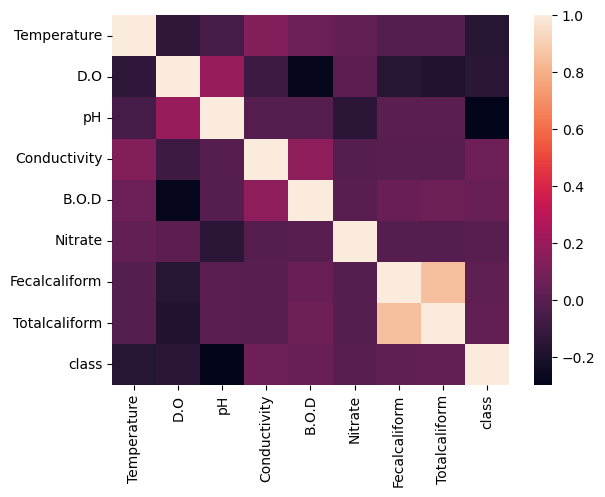

In [27]:
sns.heatmap(df_new.corr());

In [28]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [29]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [30]:
df_new['class'] = df_new['class'] == 'yes'

In [31]:
df_new.head()

Temperature   D.O   pH  Conductivity  B.O.D  Nitrate  Fecalcaliform  \
0          9.0   9.0  8.0          85.0    0.1      0.2          106.0   
1         10.0   9.0  8.0         102.0    0.3      0.4          153.0   
2         11.0   9.0  8.0          96.0    0.2      0.3           58.0   
3         13.0   9.0  8.0          94.0    0.2      0.4           34.0   
4         14.0  10.0  8.0         112.0    0.2      0.5          213.0   

   Totalcaliform  class  
0          397.0   True  
1          954.0   True  
2          653.0   True  
3          317.0   True  
4         1072.0   True

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [33]:
df_new.corr()

Temperature       D.O        pH  Conductivity     B.O.D  \
Temperature       1.000000 -0.137697 -0.062000      0.132268  0.059620   
D.O              -0.137697  1.000000  0.194636     -0.092865 -0.280783   
pH               -0.062000  0.194636  1.000000     -0.008232 -0.004717   
Conductivity      0.132268 -0.092865 -0.008232      1.000000  0.164644   
B.O.D             0.059620 -0.280783 -0.004717      0.164644  1.000000   
Nitrate           0.026301  0.011558 -0.147210     -0.008017  0.004074   
Fecalcaliform    -0.013133 -0.165299  0.008265     -0.003694  0.053959   
Totalcaliform    -0.013379 -0.182276  0.009426     -0.003406  0.063619   
class            -0.162458 -0.147469 -0.298328      0.069188  0.047831   

                Nitrate  Fecalcaliform  Totalcaliform     class  
Temperature    0.026301      -0.013133      -0.013379 -0.162458  
D.O            0.011558      -0.165299      -0.182276 -0.147469  
pH            -0.147210       0.008265       0.009426 -0.298328  
Conductivity  -0.008017      -0.003694      -0.003406  0.069188  
B.O.D          0.004074       0.053959       0.063619  0.047831  
Nitrate        1.000000      -0.005780      -0.006528  0.005181  
Fecalcaliform -0.005780       1.000000       0.848463  0.024510  
Totalcaliform -0.006528       0.848463       1.000000  0.027741  
class          0.005181       0.024510       0.027741  1.000000

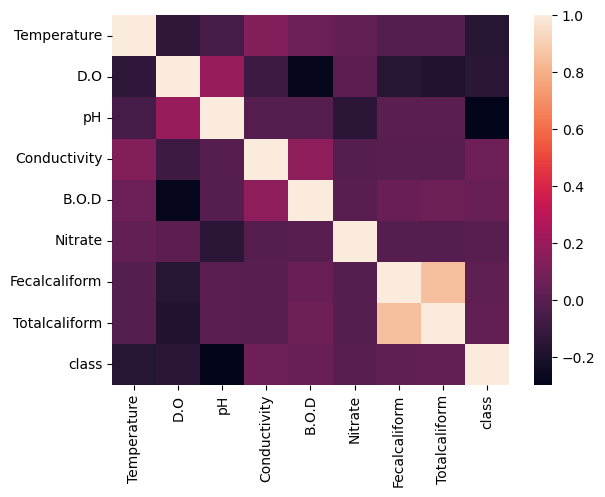

In [34]:
sns.heatmap(df_new.corr());

In [35]:
X = df.loc[:,['Temperature','Conductivity','B.O.D', 'Nitrate','Totalcaliform']]

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   Conductivity   967 non-null    float64
 2   B.O.D          967 non-null    float64
 3   Nitrate        967 non-null    float64
 4   Totalcaliform  967 non-null    float64
dtypes: float64(5)
memory usage: 45.3 KB


In [37]:
X.head()

Temperature  Conductivity  B.O.D  Nitrate  Totalcaliform
0          9.0          85.0    0.1      0.2          397.0
1         10.0         102.0    0.3      0.4          954.0
2         11.0          96.0    0.2      0.3          653.0
3         13.0          94.0    0.2      0.4          317.0
4         14.0         112.0    0.2      0.5         1072.0

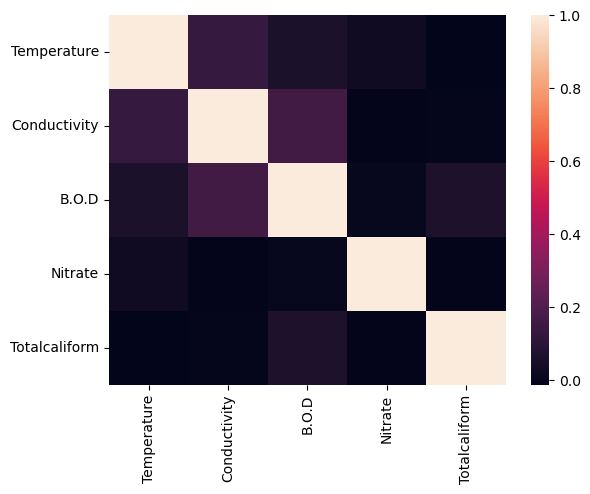

In [38]:
sns.heatmap(X.corr());

In [39]:
[x for x in df['class'].apply(type).unique()]

[str]

In [40]:
df_new['class'].unique()

array([ True, False])

In [41]:
y = df_new['pH']

In [42]:
y.value_counts()

pH
8.000000    72
7.600000    24
7.500000    22
7.800000    22
7.700000    22
            ..
7.872000     1
7.680000     1
7.637500     1
7.545000     1
7.453636     1
Name: count, Length: 577, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [45]:
X_train.shape

(773, 5)

In [46]:
y_train.shape

(773,)

In [47]:
X_val.shape

(194, 5)

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error as MSE

In [49]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

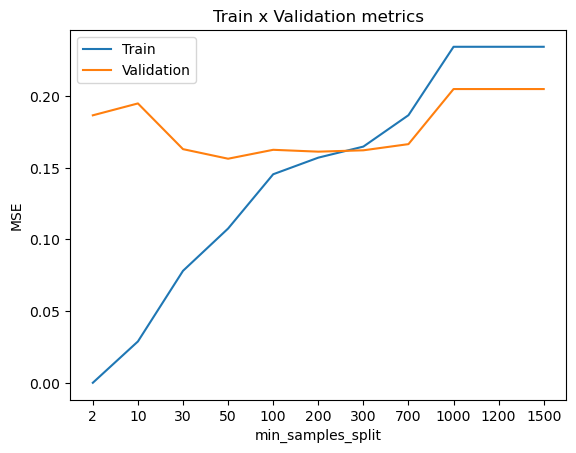

In [50]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [51]:
min_samples_split_list = np.arange(30,105,5)

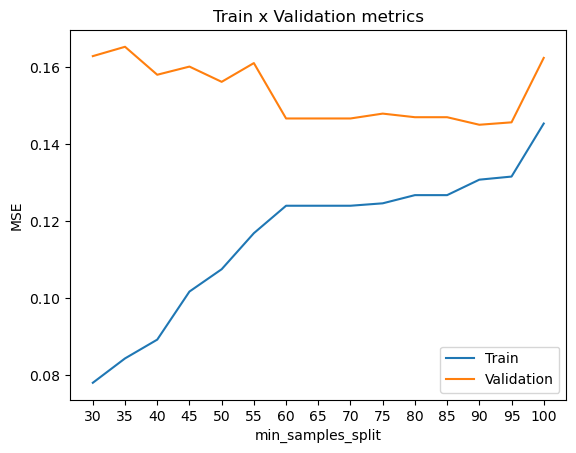

In [52]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [53]:
min_samples_split_list = np.arange(50,100)

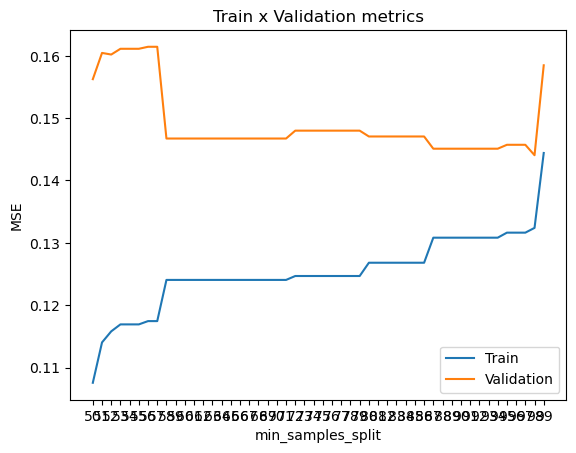

In [54]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [55]:
ind_min_samples_split = np.argmin(MSE_list_val)
ind_min_samples_split

48

In [56]:
best_min_samples_split = min_samples_split_list[ind_min_samples_split]
best_min_samples_split

98

In [57]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

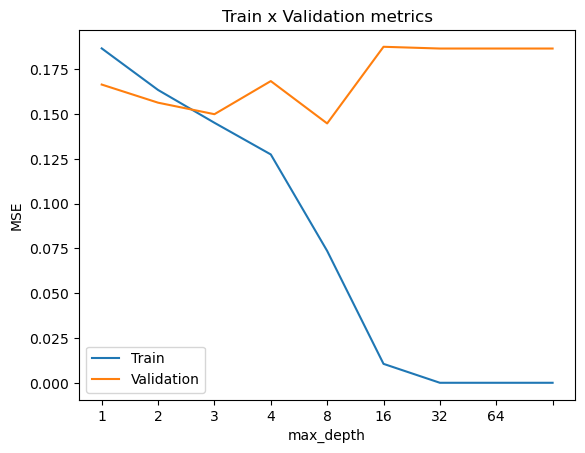

In [58]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [59]:
max_depth_list = np.arange(2,17)

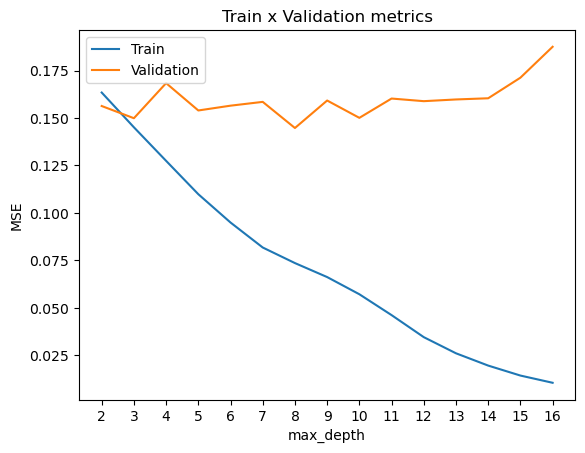

In [60]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [61]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

6

In [62]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

8

    Chosen max_depth = 8
    Chosen min_samples_split = 98

In [63]:
decision_tree_pH_model = DecisionTreeRegressor(min_samples_split = 98,
                                             max_depth = 8,
                                             random_state = 123).fit(X_train,y_train)

In [64]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.1414
MSE for validation:
	MSE: 0.1437


In [65]:
for feature, importance in tuple(zip(decision_tree_pH_model.feature_names_in_,
                                     decision_tree_pH_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.0326
Conductivity: 0.5948
B.O.D: 0.2035
Nitrate: 0.0487
Totalcaliform: 0.1204


In [66]:
y_pred_pH = decision_tree_pH_model.predict(X_val)

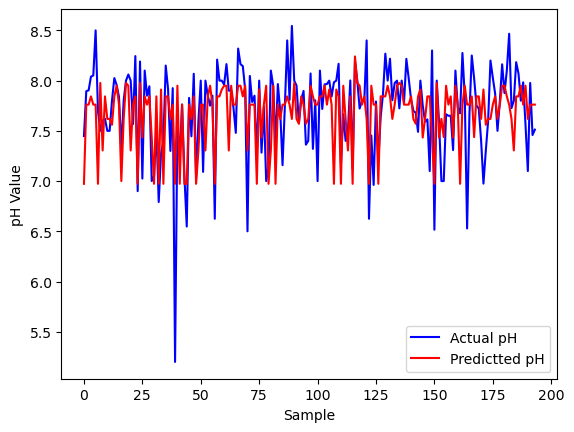

In [67]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [68]:
diff_pH = y_pred_pH - y_val

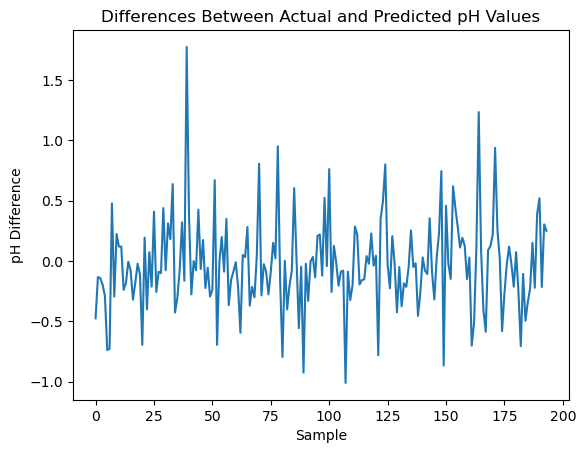

In [69]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [70]:
decision_tree_pH_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 98,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
degree_list = np.arange(1,5)

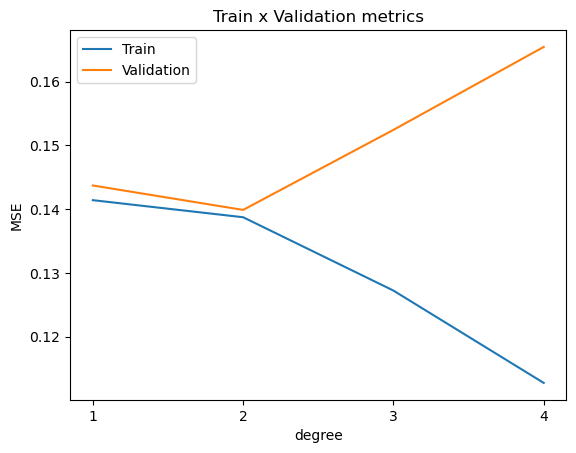

In [73]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = DecisionTreeRegressor(min_samples_split = 98,
                                  max_depth = 8,
                                  random_state = 123).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [74]:
MSE_list_val

[0.14370477059573586,
 0.13987706317381887,
 0.1524223226461354,
 0.16542337523438985]

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

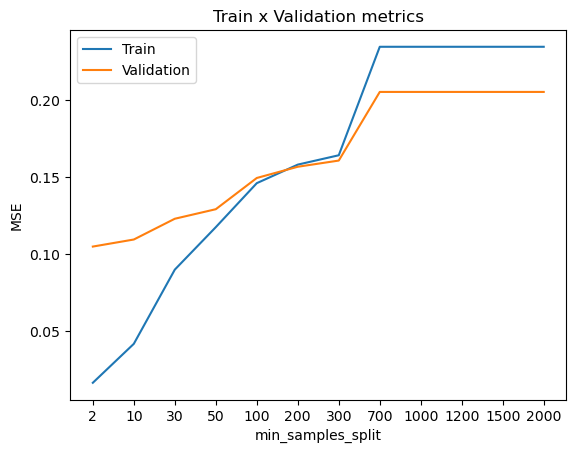

In [77]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [78]:
min_samples_split_list = np.arange(2,11)

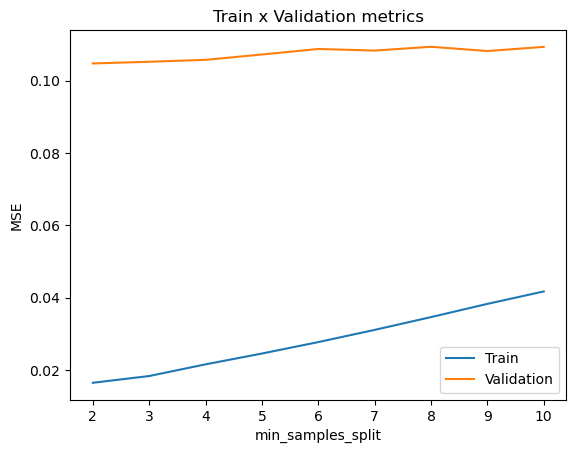

In [79]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [80]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

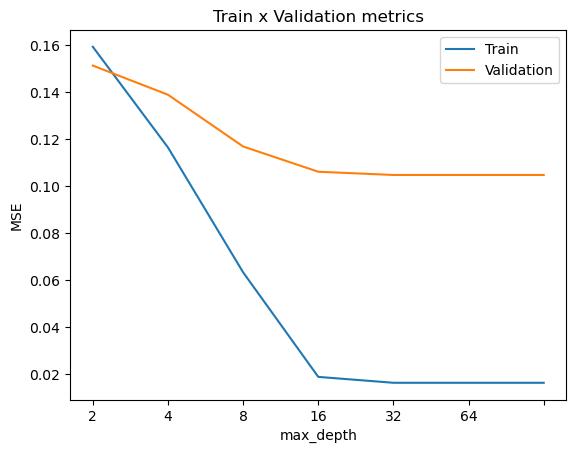

In [81]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [82]:
max_depth_list = np.arange(8,64)

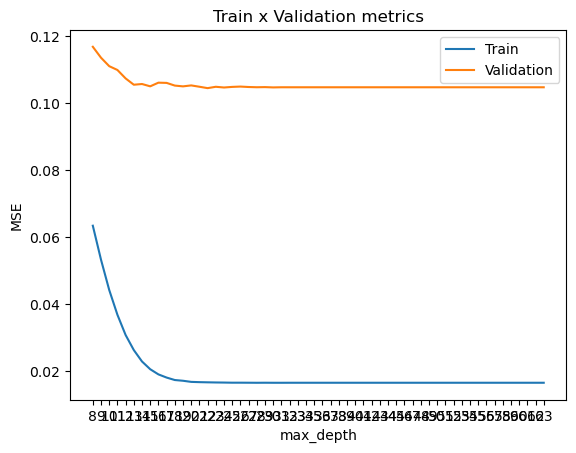

In [83]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [84]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

14

In [85]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

22

In [86]:
n_estimators_list = [10,50,100,500,1000,2000]

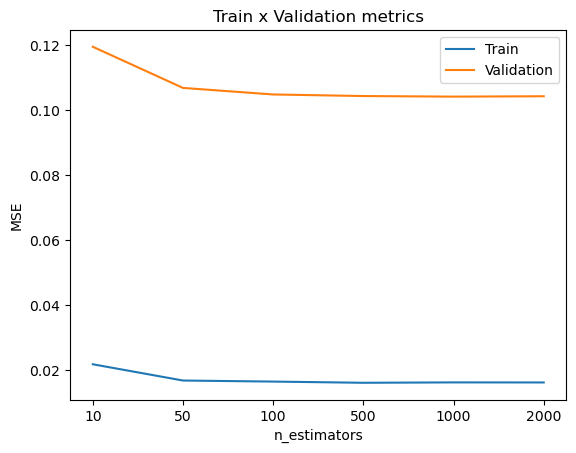

In [87]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [88]:
n_estimators_list = np.arange(100,1000,50)

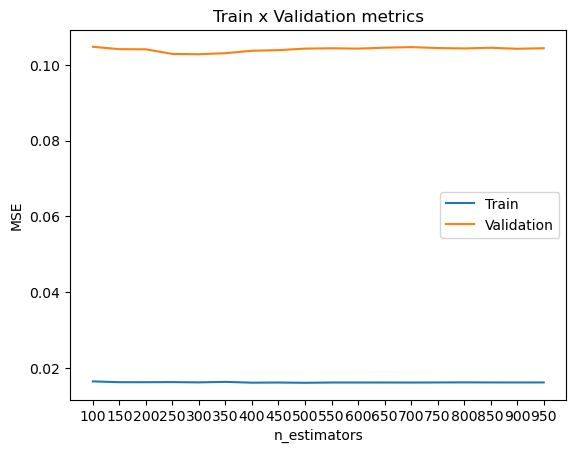

In [89]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [90]:
MSE_list_val

[0.1047463519638999,
 0.1041147044735681,
 0.10407563815438015,
 0.10286014712474081,
 0.10277941106368356,
 0.10305738739030264,
 0.10369382710334074,
 0.10386025848293681,
 0.10426403282054757,
 0.10435072967048535,
 0.10426469770179678,
 0.10450647994744756,
 0.10465209952726667,
 0.10441797074223383,
 0.10431395215388749,
 0.10448604933992092,
 0.10422267413523165,
 0.10436628187934463]

In [91]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

4

In [92]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

300

    Chosen max_depth = 22
    Chosen n_estimators = 300
    Chosen min_samples_split = 2

In [93]:
random_forest_pH_model = RandomForestRegressor(n_estimators = 300,
                                             max_depth = 22, 
                                             min_samples_split = 2).fit(X_train,y_train)

In [94]:
for feature, importance in tuple(zip(random_forest_pH_model.feature_names_in_,
                                     random_forest_pH_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.1268
Conductivity: 0.3776
B.O.D: 0.1769
Nitrate: 0.1396
Totalcaliform: 0.1790


In [95]:
print(f"MSE for train:\n\tMSE: {MSE(random_forest_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(random_forest_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.0165
MSE for validation:
	MSE: 0.1027


In [96]:
y_pred_pH = random_forest_pH_model.predict(X_val)

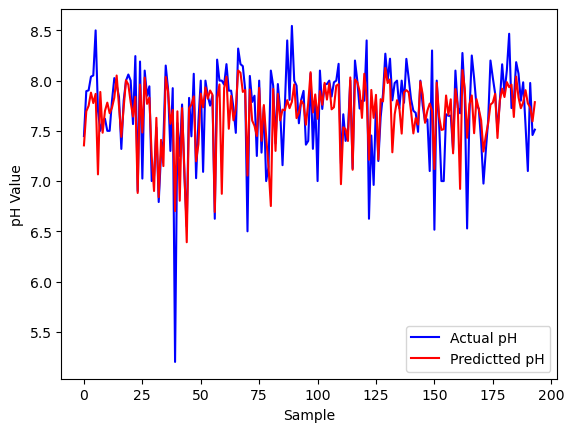

In [97]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [98]:
diff_pH = y_pred_pH - y_val

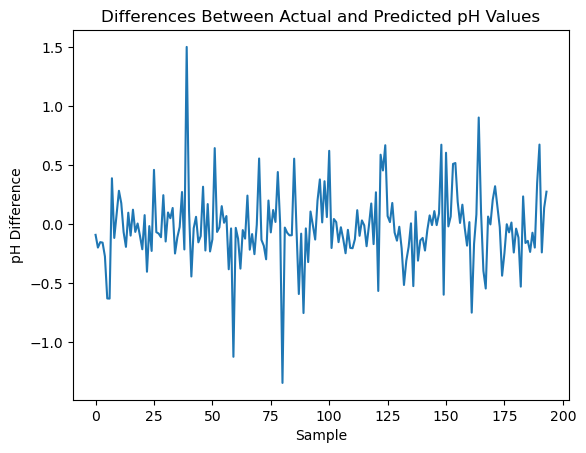

In [99]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [100]:
from xgboost import XGBRegressor

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, train_size = 0.8, random_state = 123)

In [102]:
n = int(len(X_train)*0.8) ## Using 80% to train and 20% to eval

In [103]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [104]:
n_estimators_list = [10,50,100,500,1000,2000]

In [105]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = XGBRegressor(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

[0]	validation_0-rmse:4.99489
[1]	validation_0-rmse:3.50403
[2]	validation_0-rmse:2.46622
[3]	validation_0-rmse:1.75292
[4]	validation_0-rmse:1.26094
[5]	validation_0-rmse:0.92544
[6]	validation_0-rmse:0.69602
[7]	validation_0-rmse:0.55974
[8]	validation_0-rmse:0.47157
[9]	validation_0-rmse:0.42087
[0]	validation_0-rmse:4.99489
[1]	validation_0-rmse:3.50403
[2]	validation_0-rmse:2.46622
[3]	validation_0-rmse:1.75292
[4]	validation_0-rmse:1.26094
[5]	validation_0-rmse:0.92544
[6]	validation_0-rmse:0.69602
[7]	validation_0-rmse:0.55974
[8]	validation_0-rmse:0.47157
[9]	validation_0-rmse:0.42087
[10]	validation_0-rmse:0.39143
[11]	validation_0-rmse:0.37556
[12]	validation_0-rmse:0.37180
[13]	validation_0-rmse:0.36933
[14]	validation_0-rmse:0.36851
[15]	validation_0-rmse:0.36851
[16]	validation_0-rmse:0.36705
[17]	validation_0-rmse:0.36680
[18]	validation_0-rmse:0.36933
[19]	validation_0-rmse:0.37033
[20]	validation_0-rmse:0.36969
[21]	validation_0-rmse:0.36938
[22]	validation_0-rmse:0.370

[106]	validation_0-rmse:0.36922
[107]	validation_0-rmse:0.36923
[108]	validation_0-rmse:0.36923
[109]	validation_0-rmse:0.36914
[110]	validation_0-rmse:0.36913
[111]	validation_0-rmse:0.36923
[112]	validation_0-rmse:0.36916
[113]	validation_0-rmse:0.36927
[114]	validation_0-rmse:0.36926
[115]	validation_0-rmse:0.36932
[116]	validation_0-rmse:0.36944
[117]	validation_0-rmse:0.36946
[118]	validation_0-rmse:0.36953
[119]	validation_0-rmse:0.36950
[120]	validation_0-rmse:0.36953
[121]	validation_0-rmse:0.36953
[122]	validation_0-rmse:0.36953
[123]	validation_0-rmse:0.36963
[124]	validation_0-rmse:0.36963
[125]	validation_0-rmse:0.36966
[126]	validation_0-rmse:0.36988
[127]	validation_0-rmse:0.36984
[128]	validation_0-rmse:0.36982
[129]	validation_0-rmse:0.36981
[130]	validation_0-rmse:0.36995
[131]	validation_0-rmse:0.36994
[132]	validation_0-rmse:0.36992
[133]	validation_0-rmse:0.36993
[134]	validation_0-rmse:0.36998
[135]	validation_0-rmse:0.36985
[136]	validation_0-rmse:0.36987
[137]	va

[363]	validation_0-rmse:0.36996
[364]	validation_0-rmse:0.36996
[365]	validation_0-rmse:0.36996
[366]	validation_0-rmse:0.36996
[367]	validation_0-rmse:0.36996
[368]	validation_0-rmse:0.36996
[369]	validation_0-rmse:0.36996
[370]	validation_0-rmse:0.36996
[371]	validation_0-rmse:0.36996
[372]	validation_0-rmse:0.36996
[373]	validation_0-rmse:0.36996
[374]	validation_0-rmse:0.36996
[375]	validation_0-rmse:0.36996
[376]	validation_0-rmse:0.36996
[377]	validation_0-rmse:0.36996
[378]	validation_0-rmse:0.36996
[379]	validation_0-rmse:0.36996
[380]	validation_0-rmse:0.36996
[381]	validation_0-rmse:0.36996
[382]	validation_0-rmse:0.36996
[383]	validation_0-rmse:0.36996
[384]	validation_0-rmse:0.36996
[385]	validation_0-rmse:0.36996
[386]	validation_0-rmse:0.36996
[387]	validation_0-rmse:0.36996
[388]	validation_0-rmse:0.36996
[389]	validation_0-rmse:0.36996
[390]	validation_0-rmse:0.36996
[391]	validation_0-rmse:0.36996
[392]	validation_0-rmse:0.36996
[393]	validation_0-rmse:0.36996
[394]	va

[123]	validation_0-rmse:0.36963
[124]	validation_0-rmse:0.36963
[125]	validation_0-rmse:0.36966
[126]	validation_0-rmse:0.36988
[127]	validation_0-rmse:0.36984
[128]	validation_0-rmse:0.36982
[129]	validation_0-rmse:0.36981
[130]	validation_0-rmse:0.36995
[131]	validation_0-rmse:0.36994
[132]	validation_0-rmse:0.36992
[133]	validation_0-rmse:0.36993
[134]	validation_0-rmse:0.36998
[135]	validation_0-rmse:0.36985
[136]	validation_0-rmse:0.36987
[137]	validation_0-rmse:0.36986
[138]	validation_0-rmse:0.36981
[139]	validation_0-rmse:0.36972
[140]	validation_0-rmse:0.36961
[141]	validation_0-rmse:0.36961
[142]	validation_0-rmse:0.36966
[143]	validation_0-rmse:0.36967
[144]	validation_0-rmse:0.36970
[145]	validation_0-rmse:0.36974
[146]	validation_0-rmse:0.36975
[147]	validation_0-rmse:0.36974
[148]	validation_0-rmse:0.36974
[149]	validation_0-rmse:0.36979
[150]	validation_0-rmse:0.36978
[151]	validation_0-rmse:0.36981
[152]	validation_0-rmse:0.36980
[153]	validation_0-rmse:0.36981
[154]	va

[380]	validation_0-rmse:0.36996
[381]	validation_0-rmse:0.36996
[382]	validation_0-rmse:0.36996
[383]	validation_0-rmse:0.36996
[384]	validation_0-rmse:0.36996
[385]	validation_0-rmse:0.36996
[386]	validation_0-rmse:0.36996
[387]	validation_0-rmse:0.36996
[388]	validation_0-rmse:0.36996
[389]	validation_0-rmse:0.36996
[390]	validation_0-rmse:0.36996
[391]	validation_0-rmse:0.36996
[392]	validation_0-rmse:0.36996
[393]	validation_0-rmse:0.36996
[394]	validation_0-rmse:0.36996
[395]	validation_0-rmse:0.36996
[396]	validation_0-rmse:0.36996
[397]	validation_0-rmse:0.36996
[398]	validation_0-rmse:0.36996
[399]	validation_0-rmse:0.36996
[400]	validation_0-rmse:0.36996
[401]	validation_0-rmse:0.36996
[402]	validation_0-rmse:0.36996
[403]	validation_0-rmse:0.36996
[404]	validation_0-rmse:0.36996
[405]	validation_0-rmse:0.36996
[406]	validation_0-rmse:0.36996
[407]	validation_0-rmse:0.36996
[408]	validation_0-rmse:0.36996
[409]	validation_0-rmse:0.36996
[410]	validation_0-rmse:0.36996
[411]	va

[637]	validation_0-rmse:0.36996
[638]	validation_0-rmse:0.36996
[639]	validation_0-rmse:0.36996
[640]	validation_0-rmse:0.36996
[641]	validation_0-rmse:0.36996
[642]	validation_0-rmse:0.36996
[643]	validation_0-rmse:0.36996
[644]	validation_0-rmse:0.36996
[645]	validation_0-rmse:0.36996
[646]	validation_0-rmse:0.36996
[647]	validation_0-rmse:0.36996
[648]	validation_0-rmse:0.36996
[649]	validation_0-rmse:0.36996
[650]	validation_0-rmse:0.36996
[651]	validation_0-rmse:0.36996
[652]	validation_0-rmse:0.36996
[653]	validation_0-rmse:0.36996
[654]	validation_0-rmse:0.36996
[655]	validation_0-rmse:0.36996
[656]	validation_0-rmse:0.36996
[657]	validation_0-rmse:0.36996
[658]	validation_0-rmse:0.36996
[659]	validation_0-rmse:0.36996
[660]	validation_0-rmse:0.36996
[661]	validation_0-rmse:0.36996
[662]	validation_0-rmse:0.36996
[663]	validation_0-rmse:0.36996
[664]	validation_0-rmse:0.36996
[665]	validation_0-rmse:0.36996
[666]	validation_0-rmse:0.36996
[667]	validation_0-rmse:0.36996
[668]	va

[894]	validation_0-rmse:0.36996
[895]	validation_0-rmse:0.36996
[896]	validation_0-rmse:0.36996
[897]	validation_0-rmse:0.36996
[898]	validation_0-rmse:0.36996
[899]	validation_0-rmse:0.36996
[900]	validation_0-rmse:0.36996
[901]	validation_0-rmse:0.36996
[902]	validation_0-rmse:0.36996
[903]	validation_0-rmse:0.36996
[904]	validation_0-rmse:0.36996
[905]	validation_0-rmse:0.36996
[906]	validation_0-rmse:0.36996
[907]	validation_0-rmse:0.36996
[908]	validation_0-rmse:0.36996
[909]	validation_0-rmse:0.36996
[910]	validation_0-rmse:0.36996
[911]	validation_0-rmse:0.36996
[912]	validation_0-rmse:0.36996
[913]	validation_0-rmse:0.36996
[914]	validation_0-rmse:0.36996
[915]	validation_0-rmse:0.36996
[916]	validation_0-rmse:0.36996
[917]	validation_0-rmse:0.36996
[918]	validation_0-rmse:0.36996
[919]	validation_0-rmse:0.36996
[920]	validation_0-rmse:0.36996
[921]	validation_0-rmse:0.36996
[922]	validation_0-rmse:0.36996
[923]	validation_0-rmse:0.36996
[924]	validation_0-rmse:0.36996
[925]	va

[154]	validation_0-rmse:0.36981
[155]	validation_0-rmse:0.36980
[156]	validation_0-rmse:0.36981
[157]	validation_0-rmse:0.36981
[158]	validation_0-rmse:0.36986
[159]	validation_0-rmse:0.36992
[160]	validation_0-rmse:0.36995
[161]	validation_0-rmse:0.36997
[162]	validation_0-rmse:0.37001
[163]	validation_0-rmse:0.37000
[164]	validation_0-rmse:0.37003
[165]	validation_0-rmse:0.37005
[166]	validation_0-rmse:0.37007
[167]	validation_0-rmse:0.37009
[168]	validation_0-rmse:0.37010
[169]	validation_0-rmse:0.37011
[170]	validation_0-rmse:0.37014
[171]	validation_0-rmse:0.37015
[172]	validation_0-rmse:0.37013
[173]	validation_0-rmse:0.37014
[174]	validation_0-rmse:0.37009
[175]	validation_0-rmse:0.37004
[176]	validation_0-rmse:0.37002
[177]	validation_0-rmse:0.37002
[178]	validation_0-rmse:0.37002
[179]	validation_0-rmse:0.37001
[180]	validation_0-rmse:0.36997
[181]	validation_0-rmse:0.36998
[182]	validation_0-rmse:0.36998
[183]	validation_0-rmse:0.36994
[184]	validation_0-rmse:0.36997
[185]	va

[411]	validation_0-rmse:0.36996
[412]	validation_0-rmse:0.36996
[413]	validation_0-rmse:0.36996
[414]	validation_0-rmse:0.36996
[415]	validation_0-rmse:0.36996
[416]	validation_0-rmse:0.36996
[417]	validation_0-rmse:0.36996
[418]	validation_0-rmse:0.36996
[419]	validation_0-rmse:0.36996
[420]	validation_0-rmse:0.36996
[421]	validation_0-rmse:0.36996
[422]	validation_0-rmse:0.36996
[423]	validation_0-rmse:0.36996
[424]	validation_0-rmse:0.36996
[425]	validation_0-rmse:0.36996
[426]	validation_0-rmse:0.36996
[427]	validation_0-rmse:0.36996
[428]	validation_0-rmse:0.36996
[429]	validation_0-rmse:0.36996
[430]	validation_0-rmse:0.36996
[431]	validation_0-rmse:0.36996
[432]	validation_0-rmse:0.36996
[433]	validation_0-rmse:0.36996
[434]	validation_0-rmse:0.36996
[435]	validation_0-rmse:0.36996
[436]	validation_0-rmse:0.36996
[437]	validation_0-rmse:0.36996
[438]	validation_0-rmse:0.36996
[439]	validation_0-rmse:0.36996
[440]	validation_0-rmse:0.36996
[441]	validation_0-rmse:0.36996
[442]	va

[668]	validation_0-rmse:0.36996
[669]	validation_0-rmse:0.36996
[670]	validation_0-rmse:0.36996
[671]	validation_0-rmse:0.36996
[672]	validation_0-rmse:0.36996
[673]	validation_0-rmse:0.36996
[674]	validation_0-rmse:0.36996
[675]	validation_0-rmse:0.36996
[676]	validation_0-rmse:0.36996
[677]	validation_0-rmse:0.36996
[678]	validation_0-rmse:0.36996
[679]	validation_0-rmse:0.36996
[680]	validation_0-rmse:0.36996
[681]	validation_0-rmse:0.36996
[682]	validation_0-rmse:0.36996
[683]	validation_0-rmse:0.36996
[684]	validation_0-rmse:0.36996
[685]	validation_0-rmse:0.36996
[686]	validation_0-rmse:0.36996
[687]	validation_0-rmse:0.36996
[688]	validation_0-rmse:0.36996
[689]	validation_0-rmse:0.36996
[690]	validation_0-rmse:0.36996
[691]	validation_0-rmse:0.36996
[692]	validation_0-rmse:0.36996
[693]	validation_0-rmse:0.36996
[694]	validation_0-rmse:0.36996
[695]	validation_0-rmse:0.36996
[696]	validation_0-rmse:0.36996
[697]	validation_0-rmse:0.36996
[698]	validation_0-rmse:0.36996
[699]	va

[925]	validation_0-rmse:0.36996
[926]	validation_0-rmse:0.36996
[927]	validation_0-rmse:0.36996
[928]	validation_0-rmse:0.36996
[929]	validation_0-rmse:0.36996
[930]	validation_0-rmse:0.36996
[931]	validation_0-rmse:0.36996
[932]	validation_0-rmse:0.36996
[933]	validation_0-rmse:0.36996
[934]	validation_0-rmse:0.36996
[935]	validation_0-rmse:0.36996
[936]	validation_0-rmse:0.36996
[937]	validation_0-rmse:0.36996
[938]	validation_0-rmse:0.36996
[939]	validation_0-rmse:0.36996
[940]	validation_0-rmse:0.36996
[941]	validation_0-rmse:0.36996
[942]	validation_0-rmse:0.36996
[943]	validation_0-rmse:0.36996
[944]	validation_0-rmse:0.36996
[945]	validation_0-rmse:0.36996
[946]	validation_0-rmse:0.36996
[947]	validation_0-rmse:0.36996
[948]	validation_0-rmse:0.36996
[949]	validation_0-rmse:0.36996
[950]	validation_0-rmse:0.36996
[951]	validation_0-rmse:0.36996
[952]	validation_0-rmse:0.36996
[953]	validation_0-rmse:0.36996
[954]	validation_0-rmse:0.36996
[955]	validation_0-rmse:0.36996
[956]	va

[1176]	validation_0-rmse:0.36996
[1177]	validation_0-rmse:0.36996
[1178]	validation_0-rmse:0.36996
[1179]	validation_0-rmse:0.36996
[1180]	validation_0-rmse:0.36996
[1181]	validation_0-rmse:0.36996
[1182]	validation_0-rmse:0.36996
[1183]	validation_0-rmse:0.36996
[1184]	validation_0-rmse:0.36996
[1185]	validation_0-rmse:0.36996
[1186]	validation_0-rmse:0.36996
[1187]	validation_0-rmse:0.36996
[1188]	validation_0-rmse:0.36996
[1189]	validation_0-rmse:0.36996
[1190]	validation_0-rmse:0.36996
[1191]	validation_0-rmse:0.36996
[1192]	validation_0-rmse:0.36996
[1193]	validation_0-rmse:0.36996
[1194]	validation_0-rmse:0.36996
[1195]	validation_0-rmse:0.36996
[1196]	validation_0-rmse:0.36996
[1197]	validation_0-rmse:0.36996
[1198]	validation_0-rmse:0.36996
[1199]	validation_0-rmse:0.36996
[1200]	validation_0-rmse:0.36996
[1201]	validation_0-rmse:0.36996
[1202]	validation_0-rmse:0.36996
[1203]	validation_0-rmse:0.36996
[1204]	validation_0-rmse:0.36996
[1205]	validation_0-rmse:0.36996
[1206]	val

[1425]	validation_0-rmse:0.36996
[1426]	validation_0-rmse:0.36996
[1427]	validation_0-rmse:0.36996
[1428]	validation_0-rmse:0.36996
[1429]	validation_0-rmse:0.36996
[1430]	validation_0-rmse:0.36996
[1431]	validation_0-rmse:0.36996
[1432]	validation_0-rmse:0.36996
[1433]	validation_0-rmse:0.36996
[1434]	validation_0-rmse:0.36996
[1435]	validation_0-rmse:0.36996
[1436]	validation_0-rmse:0.36996
[1437]	validation_0-rmse:0.36996
[1438]	validation_0-rmse:0.36996
[1439]	validation_0-rmse:0.36996
[1440]	validation_0-rmse:0.36996
[1441]	validation_0-rmse:0.36996
[1442]	validation_0-rmse:0.36996
[1443]	validation_0-rmse:0.36996
[1444]	validation_0-rmse:0.36996
[1445]	validation_0-rmse:0.36996
[1446]	validation_0-rmse:0.36996
[1447]	validation_0-rmse:0.36996
[1448]	validation_0-rmse:0.36996
[1449]	validation_0-rmse:0.36996
[1450]	validation_0-rmse:0.36996
[1451]	validation_0-rmse:0.36996
[1452]	validation_0-rmse:0.36996
[1453]	validation_0-rmse:0.36996
[1454]	validation_0-rmse:0.36996
[1455]	val

[1674]	validation_0-rmse:0.36996
[1675]	validation_0-rmse:0.36996
[1676]	validation_0-rmse:0.36996
[1677]	validation_0-rmse:0.36996
[1678]	validation_0-rmse:0.36996
[1679]	validation_0-rmse:0.36996
[1680]	validation_0-rmse:0.36996
[1681]	validation_0-rmse:0.36996
[1682]	validation_0-rmse:0.36996
[1683]	validation_0-rmse:0.36996
[1684]	validation_0-rmse:0.36996
[1685]	validation_0-rmse:0.36996
[1686]	validation_0-rmse:0.36996
[1687]	validation_0-rmse:0.36996
[1688]	validation_0-rmse:0.36996
[1689]	validation_0-rmse:0.36996
[1690]	validation_0-rmse:0.36996
[1691]	validation_0-rmse:0.36996
[1692]	validation_0-rmse:0.36996
[1693]	validation_0-rmse:0.36996
[1694]	validation_0-rmse:0.36996
[1695]	validation_0-rmse:0.36996
[1696]	validation_0-rmse:0.36996
[1697]	validation_0-rmse:0.36996
[1698]	validation_0-rmse:0.36996
[1699]	validation_0-rmse:0.36996
[1700]	validation_0-rmse:0.36996
[1701]	validation_0-rmse:0.36996
[1702]	validation_0-rmse:0.36996
[1703]	validation_0-rmse:0.36996
[1704]	val

[1923]	validation_0-rmse:0.36996
[1924]	validation_0-rmse:0.36996
[1925]	validation_0-rmse:0.36996
[1926]	validation_0-rmse:0.36996
[1927]	validation_0-rmse:0.36996
[1928]	validation_0-rmse:0.36996
[1929]	validation_0-rmse:0.36996
[1930]	validation_0-rmse:0.36996
[1931]	validation_0-rmse:0.36996
[1932]	validation_0-rmse:0.36996
[1933]	validation_0-rmse:0.36996
[1934]	validation_0-rmse:0.36996
[1935]	validation_0-rmse:0.36996
[1936]	validation_0-rmse:0.36996
[1937]	validation_0-rmse:0.36996
[1938]	validation_0-rmse:0.36996
[1939]	validation_0-rmse:0.36996
[1940]	validation_0-rmse:0.36996
[1941]	validation_0-rmse:0.36996
[1942]	validation_0-rmse:0.36996
[1943]	validation_0-rmse:0.36996
[1944]	validation_0-rmse:0.36996
[1945]	validation_0-rmse:0.36996
[1946]	validation_0-rmse:0.36996
[1947]	validation_0-rmse:0.36996
[1948]	validation_0-rmse:0.36996
[1949]	validation_0-rmse:0.36996
[1950]	validation_0-rmse:0.36996
[1951]	validation_0-rmse:0.36996
[1952]	validation_0-rmse:0.36996
[1953]	val

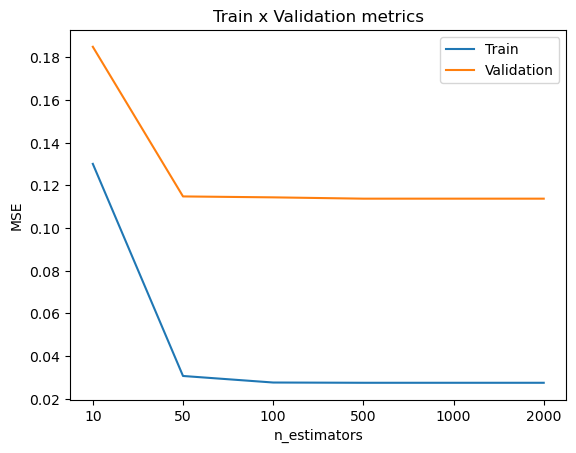

In [106]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [107]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

3

In [108]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

500

In [109]:
xgb_pH_model = XGBRegressor(n_estimators = 500, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_pH_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:6.42095
[1]	validation_0-rmse:5.77873
[2]	validation_0-rmse:5.20232
[3]	validation_0-rmse:4.68393
[4]	validation_0-rmse:4.21664
[5]	validation_0-rmse:3.79746
[6]	validation_0-rmse:3.42077
[7]	validation_0-rmse:3.08249
[8]	validation_0-rmse:2.77846
[9]	validation_0-rmse:2.50737
[10]	validation_0-rmse:2.26223
[11]	validation_0-rmse:2.04225
[12]	validation_0-rmse:1.84393
[13]	validation_0-rmse:1.66810
[14]	validation_0-rmse:1.50960
[15]	validation_0-rmse:1.36839
[16]	validation_0-rmse:1.24143
[17]	validation_0-rmse:1.12776
[18]	validation_0-rmse:1.02718
[19]	validation_0-rmse:0.93979
[20]	validation_0-rmse:0.86322
[21]	validation_0-rmse:0.79291
[22]	validation_0-rmse:0.73232
[23]	validation_0-rmse:0.68154
[24]	validation_0-rmse:0.63601
[25]	validation_0-rmse:0.59597
[26]	validation_0-rmse:0.56068
[27]	validation_0-rmse:0.52854
[28]	validation_0-rmse:0.50286
[29]	validation_0-rmse:0.48120
[30]	validation_0-rmse:0.46218
[31]	validation_0-rmse:0.44679
[32]	validation_0-

[260]	validation_0-rmse:0.37542
[261]	validation_0-rmse:0.37548
[262]	validation_0-rmse:0.37546
[263]	validation_0-rmse:0.37547
[264]	validation_0-rmse:0.37547
[265]	validation_0-rmse:0.37547
[266]	validation_0-rmse:0.37550
[267]	validation_0-rmse:0.37563
[268]	validation_0-rmse:0.37556
[269]	validation_0-rmse:0.37555
[270]	validation_0-rmse:0.37556
[271]	validation_0-rmse:0.37555
[272]	validation_0-rmse:0.37560
[273]	validation_0-rmse:0.37561
[274]	validation_0-rmse:0.37564
[275]	validation_0-rmse:0.37574
[276]	validation_0-rmse:0.37574
[277]	validation_0-rmse:0.37578
[278]	validation_0-rmse:0.37598
[279]	validation_0-rmse:0.37585
[280]	validation_0-rmse:0.37587
[281]	validation_0-rmse:0.37584
[282]	validation_0-rmse:0.37579
[283]	validation_0-rmse:0.37572
[284]	validation_0-rmse:0.37570
[285]	validation_0-rmse:0.37571
[286]	validation_0-rmse:0.37564
[287]	validation_0-rmse:0.37565
[288]	validation_0-rmse:0.37564
[289]	validation_0-rmse:0.37570
[290]	validation_0-rmse:0.37570
[291]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [110]:
xgb_pH_model.best_iteration

499

In [111]:
print(f"MSE for train:\n\tMSE: {MSE(xgb_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(xgb_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.0284
MSE for validation:
	MSE: 0.1099


In [112]:
y_pred_pH = xgb_pH_model.predict(X_val)

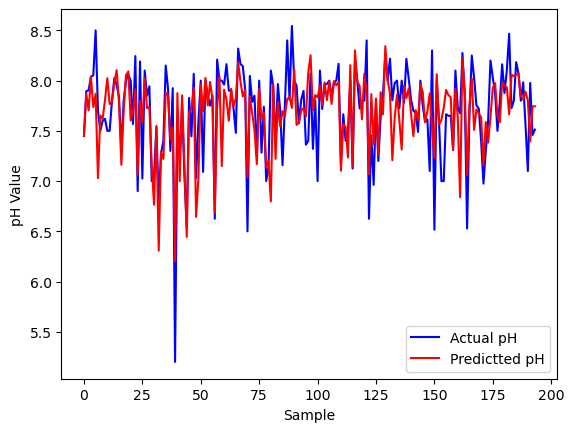

In [113]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [114]:
diff_pH = y_pred_pH - y_val

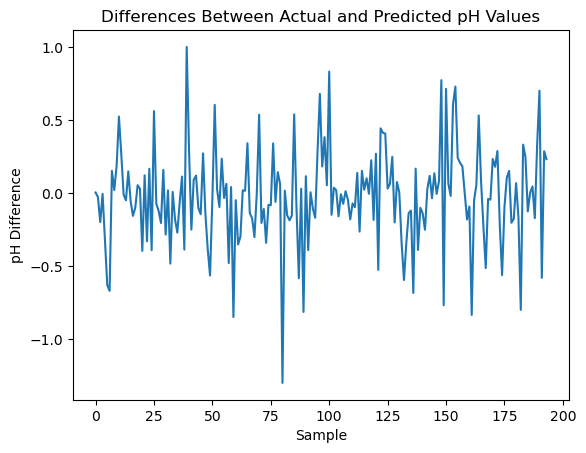

In [115]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [117]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(X_train)
Xn = norm(X_train)

In [297]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 3ms/step - loss: 17.9560
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.8644
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.6944
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5107
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3513
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3143
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3305
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3142
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2631
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2103
Epoch 11/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.1642
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2136
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8671
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9474
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8408
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8298
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7940
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8788
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8364
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8082
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8061
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8168
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7751
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9139
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.6069
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6139
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5655
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7119
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6736
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6723
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5875
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5362
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5955
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5496
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5325
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6317
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4538
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6526
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6586
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5118
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.2720
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8847
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6568
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5387
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4652
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4457
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4424
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4621
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.6682
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4428
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4942
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4730
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4540
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4376
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3844
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4842
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3857
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3600
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3646
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4578
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.6214
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3365
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2415
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3077
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3927
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2414
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2708
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5990
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5651
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5163
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4400
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4964
Epoch 505/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.1515
Epoch 592/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1622
Epoch 593/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1887
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1986
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8009
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4272
Epoch 597/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8227
Epoch 598/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7042
Epoch 599/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6108
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6093
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5991
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6127
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4588
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4380
Epoch 691/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4962
Epoch 692/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5489
Epoch 693/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6141
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5227
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4449
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5370
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4659
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4728
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4843
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5720
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4730
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4756
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4940
Epoch 790/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4843
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5494
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4909
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4972
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4875
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4769
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4904
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5220
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5099
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4663
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4350
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4044
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4741
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4263
Epoch 890/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3956
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4241
Epoch 892/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4304
Epoch 893/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4261
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4713
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4499
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4639
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4563
Epoch 984/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4060
Epoch 985/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3870
Epoch 986/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4286
Epoch 987/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4047
Epoch 988/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4462
Epoch 989/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4052
Epoch 990/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3524
Epoch 991/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3983
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3515
Epoch 993/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4035
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3822
Epoch 995/1000
25/2

In [298]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [299]:
MSE_pred

[0.9958321577505215]

In [300]:
MSE_pred

[0.9958321577505215]

In [301]:
MSE_train

[1.2519672052705095]

In [302]:
MSE_train

[1.2519672052705095]

In [303]:
yhat_pred

array([[ 8.919276 ],
       [ 6.827222 ],
       [ 7.3167095],
       [ 7.7634478],
       [ 7.5211935],
       [ 6.398661 ],
       [ 7.951419 ],
       [ 7.110079 ],
       [ 6.8456106],
       [ 6.2613115],
       [ 7.558557 ],
       [ 6.5626097],
       [ 6.61934  ],
       [ 7.5430527],
       [ 7.2377205],
       [ 7.85685  ],
       [ 5.123619 ],
       [ 6.9703565],
       [ 8.356986 ],
       [ 5.102201 ],
       [ 7.4600596],
       [ 6.8471036],
       [10.908514 ],
       [ 5.687245 ],
       [ 7.927004 ],
       [ 6.751793 ],
       [ 7.206825 ],
       [ 7.304865 ],
       [ 6.7625027],
       [ 6.1945295],
       [ 6.6654015],
       [ 5.590663 ],
       [ 5.7428637],
       [ 7.1544895],
       [ 7.655364 ],
       [ 6.878576 ],
       [ 6.470418 ],
       [ 8.135705 ],
       [ 7.4243326],
       [ 7.6518607],
       [ 6.39472  ],
       [ 7.435619 ],
       [ 7.2169385],
       [ 7.0285482],
       [ 6.1554337],
       [ 7.6515446],
       [ 6.3828444],
       [ 7.87

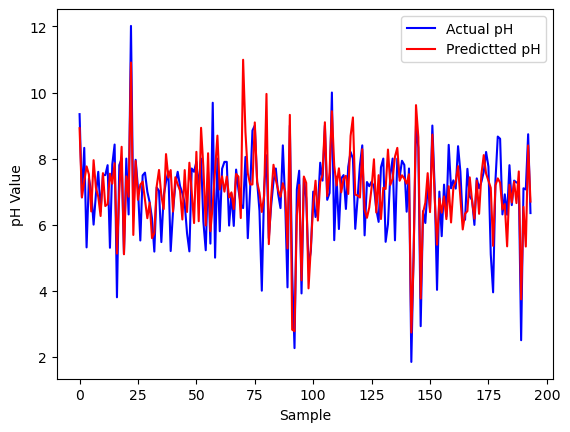

In [304]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [305]:
diff_pH = yhat_pred.flatten() - y_val

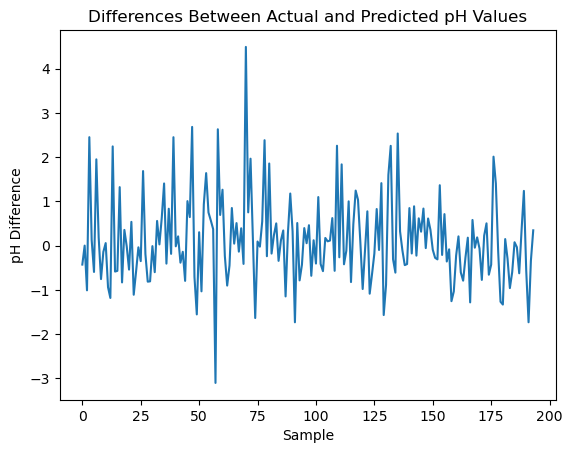

In [306]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [287]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 16.6534
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 4.1405
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.9075
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.6709
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3083
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3489
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2638
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.1919
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.1393
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2022
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1069
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.1876
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.9755
Epoch 102/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.9439
Epoch 103/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.9457
Epoch 104/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8987
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8311
Epoch 106/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8441
Epoch 107/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8920
Epoch 108/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.0461
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8420
Epoch 110/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8381
Epoch 111/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8552
Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8259
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.5693
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5734
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5594
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.0327
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8424
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5715
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6133
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5587
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5870
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6300
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5527
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5066
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4431
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3672
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4273
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4205
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5310
Epoch 302/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4746
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3817
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4448
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4229
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4407
Epoch 307/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3544
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3427
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4323
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5228
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4697
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4531
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4434
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4000
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3963
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4217
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4331
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3880
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4168
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4071
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3590
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3584
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3384
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3286
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3740
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3702
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3770
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3319
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3413
Epoch 502/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3231
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3556
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4078
Epoch 505/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 1.3221
Epoch 592/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3656
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3181
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2945
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3199
Epoch 596/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3359
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3172
Epoch 598/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3075
Epoch 599/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3528
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3917
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3481
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2985
Epoch 603/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.4129
Epoch 690/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8639
Epoch 691/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7105
Epoch 692/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6300
Epoch 693/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4548
Epoch 694/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4229
Epoch 695/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4037
Epoch 696/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3716
Epoch 697/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3763
Epoch 698/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2831
Epoch 699/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4389
Epoch 700/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5604
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.4437
Epoch 788/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4050
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3688
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3471
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3588
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3635
Epoch 793/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4267
Epoch 794/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3598
Epoch 795/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3474
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3295
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3551
Epoch 798/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3945
Epoch 799/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.2879
Epoch 886/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3448
Epoch 887/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3678
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3159
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3952
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3528
Epoch 891/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3313
Epoch 892/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3739
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3963
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3758
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4258
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3523
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2726
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2826
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3737
Epoch 986/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3064
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2943
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3758
Epoch 989/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.5491
Epoch 990/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.4253
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3802
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3444
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3194
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3270
Epoch 995/1000
25/2

In [288]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [289]:
MSE_pred

[0.985899442135189]

In [290]:
MSE_pred

[0.985899442135189]

In [291]:
MSE_train

[1.1363213380110257]

In [292]:
MSE_train

[1.1363213380110257]

In [293]:
yhat_pred

array([[ 8.94586  ],
       [ 7.3004103],
       [ 7.1780663],
       [ 8.0567465],
       [ 7.453644 ],
       [ 7.964782 ],
       [ 8.064061 ],
       [ 7.146044 ],
       [ 7.8926377],
       [ 6.4868364],
       [ 7.691471 ],
       [ 6.950305 ],
       [ 7.552041 ],
       [ 7.4883175],
       [ 7.6887555],
       [ 7.87376  ],
       [ 3.1086636],
       [ 7.422503 ],
       [ 8.118826 ],
       [ 4.531914 ],
       [ 7.532112 ],
       [ 7.3299346],
       [10.59907  ],
       [ 6.627909 ],
       [ 7.856733 ],
       [ 7.14128  ],
       [ 7.1902103],
       [ 7.576668 ],
       [ 7.3552666],
       [ 7.2145534],
       [ 7.6248956],
       [ 6.5525637],
       [ 5.8159413],
       [ 7.704824 ],
       [ 7.7666626],
       [ 7.509474 ],
       [ 7.424415 ],
       [ 8.153096 ],
       [ 7.6019917],
       [ 5.2602077],
       [ 6.6626816],
       [ 7.505414 ],
       [ 7.4104877],
       [ 7.807719 ],
       [ 6.6353765],
       [ 7.384485 ],
       [ 7.1204534],
       [ 8.17

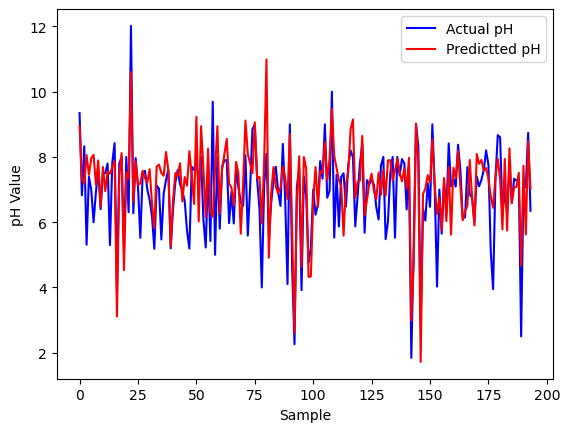

In [294]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [295]:
diff_pH = yhat_pred.flatten() - y_val

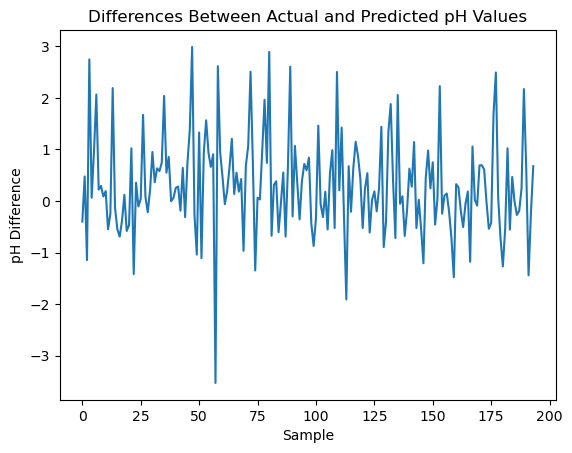

In [296]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [307]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 14.0924
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.5876
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.7728
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4077
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4196
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2635
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2279
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2584
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3038
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.1935
Epoch 11/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2871
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2520
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7661
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7151
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7371
Epoch 104/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8516
Epoch 105/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7576
Epoch 106/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7592
Epoch 107/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7180
Epoch 108/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.4139
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.0424
Epoch 110/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8662
Epoch 111/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8005
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7859
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.5415
Epoch 200/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6215
Epoch 201/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4825
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6639
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7713
Epoch 204/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7152
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5579
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6358
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5788
Epoch 208/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.5383
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5747
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6694
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.5259
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6438
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5824
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4892
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5226
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6632
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6091
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6827
Epoch 305/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4677
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5876
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4665
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5737
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4630
Epoch 396/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4340
Epoch 397/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3923
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3569
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3858
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4419
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4296
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3899
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3342
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3644
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3821
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3726
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3553
Epoch 494/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.3883
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2865
Epoch 496/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4289
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6269
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5230
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6886
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6008
Epoch 501/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.4029
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4470
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3745
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4010
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4118
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3473
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3282
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2785
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3017
Epoch 596/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2924
Epoch 597/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2909
Epoch 598/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2970
Epoch 599/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2713
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3144
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2762
Epoch 602/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3199
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3174
Epoch 690/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3577
Epoch 691/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5301
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4852
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3294
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4152
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2791
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3513
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1911
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2773
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2874
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2302
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.2389
Epoch 788/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3318
Epoch 789/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2999
Epoch 790/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2073
Epoch 791/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2469
Epoch 792/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2404
Epoch 793/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1761
Epoch 794/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2614
Epoch 795/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2412
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2274
Epoch 797/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2707
Epoch 798/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2620
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.0875
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1796
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4100
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3298
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0978
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1727
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5245
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8017
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6590
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2859
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2819
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2022
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.0968
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1240
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2501
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1322
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1488
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2165
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1579
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0602
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2965
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0798
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0417
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0506
Epoch 995/1000
25/2

In [308]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [309]:
MSE_pred

[1.3041600185860935]

In [310]:
MSE_pred

[1.3041600185860935]

In [311]:
MSE_train

[0.9700282288194889]

In [312]:
MSE_train

[0.9700282288194889]

In [313]:
yhat_pred

array([[ 9.026375 ],
       [ 7.0652366],
       [ 6.8450675],
       [ 7.4630756],
       [ 7.2299747],
       [ 7.518226 ],
       [ 7.28758  ],
       [ 7.1531   ],
       [ 7.1559386],
       [ 6.723648 ],
       [ 7.431594 ],
       [ 5.629019 ],
       [ 7.1920156],
       [ 7.807988 ],
       [ 7.4668617],
       [ 7.020755 ],
       [ 3.1126804],
       [ 7.442215 ],
       [ 8.227839 ],
       [ 5.8710017],
       [ 8.142158 ],
       [ 6.9995127],
       [ 7.25482  ],
       [ 6.1830482],
       [ 8.25285  ],
       [ 7.0619783],
       [ 6.9357486],
       [ 7.0932574],
       [ 6.9639893],
       [ 6.8612313],
       [ 6.6348033],
       [ 6.0866647],
       [ 5.88929  ],
       [ 7.294071 ],
       [ 7.2864194],
       [ 7.417097 ],
       [ 6.851927 ],
       [ 7.1819324],
       [ 7.2349825],
       [ 4.624326 ],
       [ 6.639233 ],
       [ 7.1705856],
       [ 6.9602413],
       [ 7.2369795],
       [ 6.328829 ],
       [ 7.0036764],
       [ 7.167213 ],
       [ 7.67

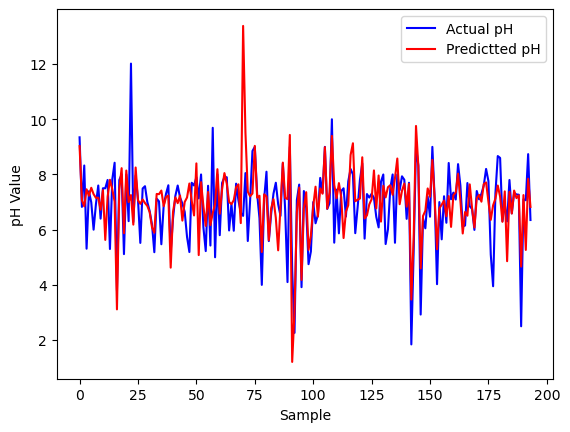

In [314]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [315]:
diff_pH = yhat_pred.flatten() - y_val

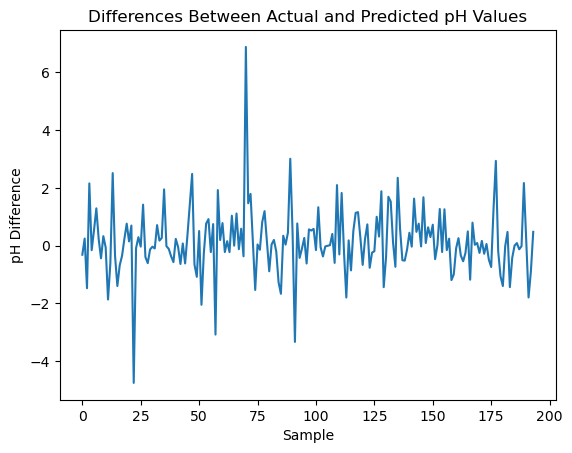

In [316]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [118]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 18.8240
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5634
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2410
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.5573
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.4491
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.4232
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3620
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3597
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3200
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3299
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3142
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2718
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2539
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2305
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2162
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2253
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2150
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2156
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2142
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2181
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2425
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2995
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 0.2074
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2380
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1994
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2042
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1907
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2587
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2082
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2086
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2197
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2499
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2285
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2046
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1925
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1900
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1968
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1913
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1847
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1951
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2017
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1901
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1984
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2219
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1832
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1911
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1766
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1838
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1757
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1840
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1760
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1978
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1772
Epoch 407/1000
25/2

25/25 [==============================] - 0s 1ms/step - loss: 0.1856
Epoch 494/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1818
Epoch 495/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1906
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1787
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1788
Epoch 500/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 501/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1846
Epoch 502/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1787
Epoch 503/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1792
Epoch 504/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1814
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1851
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1767
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1790
Epoch 594/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1749
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1800
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1799
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 599/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1757
Epoch 600/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1736
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1734
Epoch 602/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.2009
Epoch 603/1000
25/2

25/25 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1825
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1836
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1792
Epoch 693/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1747
Epoch 694/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1836
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1783
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1788
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1750
Epoch 699/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1874
Epoch 788/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1726
Epoch 789/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1796
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1798
Epoch 791/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1744
Epoch 792/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1856
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1771
Epoch 794/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1751
Epoch 795/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1789
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1783
Epoch 797/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1765
Epoch 798/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 799/1000
25/2

25/25 [==============================] - 0s 1ms/step - loss: 0.1782
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1793
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1743
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1737
Epoch 890/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1740
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1792
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 894/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1750
Epoch 895/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 896/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1762
Epoch 897/1000
25/2

25/25 [==============================] - 0s 6ms/step - loss: 0.1891
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1855
Epoch 985/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1757
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1849
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1815
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1849
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1834
Epoch 990/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1750
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1773
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1861
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1791
Epoch 994/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1759
Epoch 995/1000
25/2

In [119]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [120]:
MSE_pred

[0.16350452063347098]

In [121]:
MSE_pred

[0.16350452063347098]

In [122]:
MSE_train

[0.1630905640849694]

In [123]:
MSE_train

[0.1630905640849694]

In [124]:
yhat_pred

array([[7.750125 ],
       [7.7530794],
       [7.5209026],
       [7.731022 ],
       [7.388921 ],
       [7.4806423],
       [7.0447445],
       [7.5185833],
       [7.745611 ],
       [7.8740435],
       [7.750125 ],
       [7.72204  ],
       [7.7385902],
       [7.6812057],
       [7.819482 ],
       [7.382805 ],
       [7.698492 ],
       [7.7249813],
       [7.8059664],
       [7.776251 ],
       [7.4942245],
       [7.6775026],
       [7.7082033],
       [6.9803123],
       [7.755764 ],
       [7.598913 ],
       [7.891815 ],
       [7.248744 ],
       [7.8324337],
       [7.7132874],
       [6.9799175],
       [7.846752 ],
       [7.0263224],
       [7.27112  ],
       [6.9625063],
       [7.824916 ],
       [7.877146 ],
       [7.6331472],
       [7.3286743],
       [6.2798233],
       [7.782378 ],
       [6.959239 ],
       [7.200144 ],
       [7.0358124],
       [6.9984903],
       [7.37383  ],
       [7.7804976],
       [7.6887493],
       [7.152363 ],
       [7.8330803],


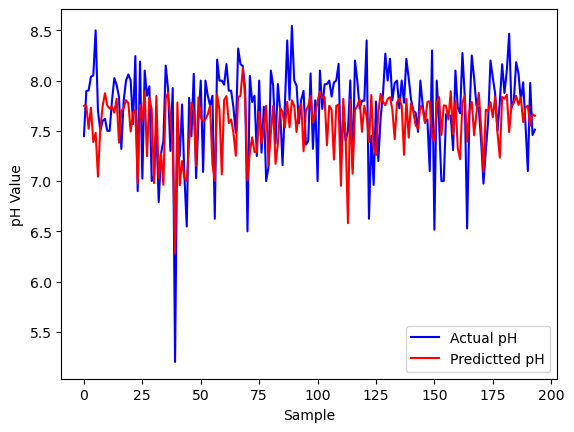

In [125]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [126]:
diff_pH = yhat_pred.flatten() - y_val

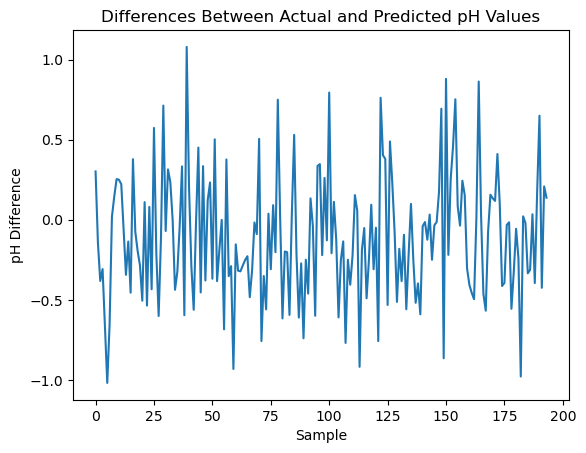

In [127]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [317]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 17.3504
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.9719
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.7800
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.7361
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.6864
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4638
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3391
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2345
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3203
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3425
Epoch 11/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.1961
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3415
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5649
Epoch 102/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6138
Epoch 103/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5181
Epoch 104/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6666
Epoch 105/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5871
Epoch 106/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7849
Epoch 107/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6516
Epoch 108/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6740
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5696
Epoch 110/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6567
Epoch 111/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5328
Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7431
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.4540
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5026
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3798
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4787
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4698
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4956
Epoch 205/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4268
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7946
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7658
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5376
Epoch 209/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5287
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4853
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4884
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6287
Epoch 299/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4836
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3620
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3982
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3217
Epoch 303/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3450
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3740
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3884
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3584
Epoch 307/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4039
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4208
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3952
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2666
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2715
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2553
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3958
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2811
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2968
Epoch 402/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4011
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3999
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3727
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3304
Epoch 406/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2212
Epoch 407/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.1908
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1481
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1790
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3150
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4162
Epoch 498/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2056
Epoch 499/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1462
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0925
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4264
Epoch 502/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3672
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2497
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1228
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.5008
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4895
Epoch 593/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4062
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4077
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3816
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4081
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5175
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4407
Epoch 599/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4133
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5241
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5213
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4349
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.6174
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5534
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5212
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5271
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5083
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5021
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4850
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4805
Epoch 697/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5322
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5385
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4819
Epoch 700/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4495
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3060
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3693
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4222
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4693
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2098
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0933
Epoch 793/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3324
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1330
Epoch 795/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1365
Epoch 796/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.0162
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2710
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1094
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4727
Epoch 886/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5148
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4652
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5197
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4996
Epoch 890/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4509
Epoch 891/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5017
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5076
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4929
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4985
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4893
Epoch 896/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5398
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.5031
Epoch 984/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4328
Epoch 985/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4174
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4033
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4036
Epoch 988/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4319
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3739
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3853
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4515
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3860
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4216
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4421
Epoch 995/1000
25/2

In [318]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [319]:
MSE_pred

[1.1721728208236146]

In [320]:
MSE_pred

[1.1721728208236146]

In [321]:
MSE_train

[1.2306832950363542]

In [322]:
MSE_train

[1.2306832950363542]

In [323]:
yhat_pred

array([[ 8.605958  ],
       [ 7.1559653 ],
       [ 7.62159   ],
       [ 8.203519  ],
       [ 7.8914924 ],
       [ 6.494576  ],
       [ 7.643     ],
       [ 7.116674  ],
       [ 7.27923   ],
       [ 6.9922347 ],
       [ 6.915052  ],
       [ 7.231336  ],
       [ 6.837198  ],
       [ 7.255529  ],
       [ 7.824901  ],
       [ 7.674478  ],
       [ 7.6141953 ],
       [ 8.545477  ],
       [ 8.175173  ],
       [ 4.798571  ],
       [ 8.349078  ],
       [ 6.9259744 ],
       [11.0436125 ],
       [ 6.390921  ],
       [ 8.118122  ],
       [ 7.0936065 ],
       [ 6.171596  ],
       [ 7.6491075 ],
       [ 7.729114  ],
       [ 6.3934054 ],
       [ 7.113835  ],
       [ 6.3691273 ],
       [ 6.3691273 ],
       [ 7.2757382 ],
       [ 7.086224  ],
       [ 7.325731  ],
       [ 7.0143147 ],
       [ 7.6851773 ],
       [ 7.598762  ],
       [ 6.3691273 ],
       [ 7.1292644 ],
       [ 7.3011622 ],
       [ 7.612989  ],
       [ 7.390101  ],
       [ 6.3691273 ],
       [ 7

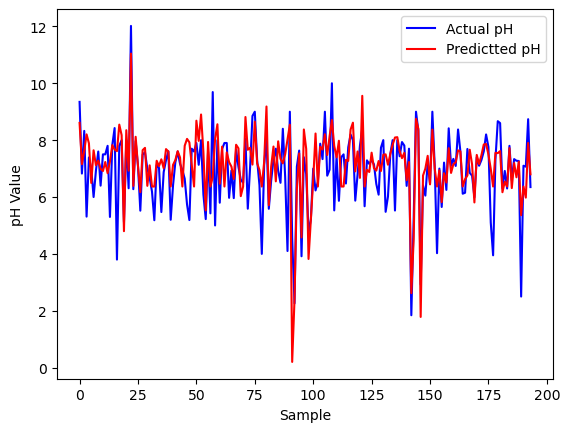

In [324]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [325]:
diff_pH = yhat_pred.flatten() - y_val

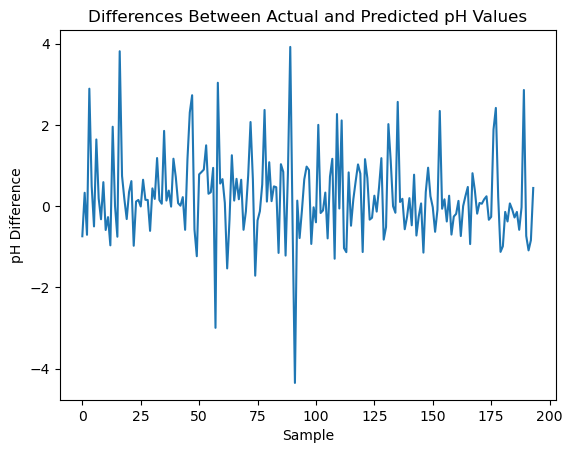

In [326]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [128]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 2s 3ms/step - loss: 23.6848
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7113
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5445
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.4347
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3680
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3588
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3444
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3513
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4103
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3267
Epoch 11/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3147
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3914
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1958
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2041
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2425
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3346
Epoch 105/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2152
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2418
Epoch 107/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2098
Epoch 108/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2030
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2063
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2130
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2060
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2145
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 200/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1991
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2144
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1899
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1979
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2161
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1949
Epoch 207/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1884
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1848
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1867
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1792
Epoch 211/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.1960
Epoch 298/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2021
Epoch 299/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1941
Epoch 300/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1808
Epoch 301/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1804
Epoch 302/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1921
Epoch 303/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1989
Epoch 304/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 305/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1862
Epoch 306/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 307/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1853
Epoch 308/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2071
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1789
Epoch 396/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1873
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1821
Epoch 398/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1774
Epoch 399/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1812
Epoch 400/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1946
Epoch 401/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 402/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1808
Epoch 403/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2021
Epoch 404/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2059
Epoch 405/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1851
Epoch 406/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1771
Epoch 407/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.1769
Epoch 494/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1763
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1872
Epoch 496/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1800
Epoch 497/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1850
Epoch 499/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1772
Epoch 500/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 501/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2001
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1882
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1788
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1863
Epoch 592/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1971
Epoch 593/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1866
Epoch 594/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1936
Epoch 595/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1825
Epoch 596/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2055
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1962
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 599/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1835
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 601/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1854
Epoch 602/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1823
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1817
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1834
Epoch 691/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1782
Epoch 692/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1821
Epoch 693/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1744
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1892
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1780
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1828
Epoch 697/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1982
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1869
Epoch 699/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 700/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1790
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 788/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1811
Epoch 789/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1954
Epoch 790/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1908
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1847
Epoch 792/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1778
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 794/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1874
Epoch 795/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1964
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1785
Epoch 797/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1822
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1816
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 886/1000
25/25 [==============================] - 0s 11ms/step - loss: 0.1867
Epoch 887/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.1930
Epoch 888/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1973
Epoch 889/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1798
Epoch 890/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1776
Epoch 891/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1796
Epoch 892/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1783
Epoch 893/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1772
Epoch 894/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1811
Epoch 895/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1811
Epoch 896/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1732
Epoch 897/1000
25/

25/25 [==============================] - 0s 3ms/step - loss: 0.1750
Epoch 984/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1777
Epoch 985/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1762
Epoch 986/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1740
Epoch 987/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1823
Epoch 988/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1905
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1768
Epoch 990/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1784
Epoch 991/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1782
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1827
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1768
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1801
Epoch 995/1000
25/2

In [129]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 3ms/step


In [130]:
MSE_pred

[0.15805095546094522]

In [131]:
MSE_train

[0.15164495711513598]

In [132]:
yhat_pred

array([[7.832604 ],
       [7.75087  ],
       [7.5830383],
       [7.6988225],
       [7.499812 ],
       [7.6055207],
       [6.981721 ],
       [7.5996814],
       [7.9254723],
       [7.6965184],
       [7.845032 ],
       [7.831118 ],
       [7.687913 ],
       [7.7037387],
       [7.850894 ],
       [7.503957 ],
       [7.033828 ],
       [7.8069234],
       [7.848296 ],
       [7.852594 ],
       [7.35835  ],
       [7.722685 ],
       [7.8091393],
       [6.942113 ],
       [7.7321496],
       [7.6046658],
       [7.7752748],
       [7.325011 ],
       [7.809095 ],
       [7.715656 ],
       [6.9762764],
       [7.716039 ],
       [6.974301 ],
       [7.247761 ],
       [6.920065 ],
       [7.7843676],
       [7.896708 ],
       [7.5053926],
       [7.4458437],
       [6.920065 ],
       [7.782383 ],
       [6.920065 ],
       [7.2684717],
       [6.920065 ],
       [6.920065 ],
       [7.448175 ],
       [7.789557 ],
       [7.6833153],
       [7.1467385],
       [7.7225585],


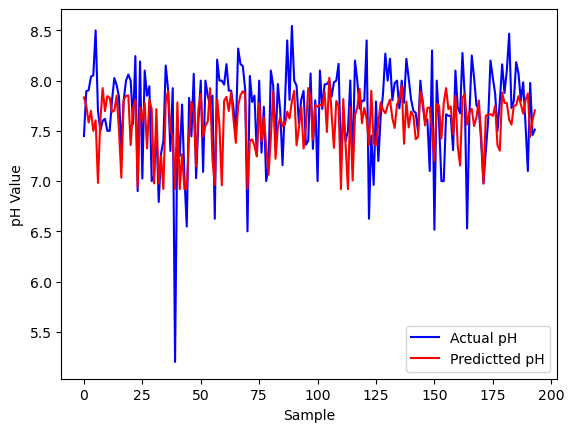

In [133]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [134]:
diff_pH = yhat_pred.flatten()- y_val

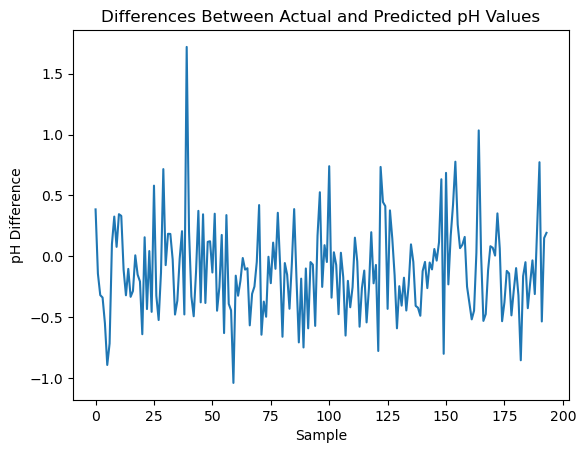

In [135]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [327]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 2s 3ms/step - loss: 15.4481
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.2249
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.7595
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.8132
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.5425
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.5075
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3424
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4884
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4999
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4827
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2459
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2781
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6545
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6527
Epoch 103/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6844
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6089
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6656
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6321
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6382
Epoch 108/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6202
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6438
Epoch 110/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6288
Epoch 111/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6082
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6385
Epoc

25/25 [==============================] - 0s 4ms/step - loss: 1.5863
Epoch 200/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4844
Epoch 201/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5871
Epoch 202/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5633
Epoch 203/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6105
Epoch 204/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5717
Epoch 205/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5565
Epoch 206/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5409
Epoch 207/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6221
Epoch 208/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5937
Epoch 209/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5274
Epoch 210/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5133
Epoch 211/1000
25/2

25/25 [==============================] - 0s 5ms/step - loss: 1.4322
Epoch 298/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.4576
Epoch 299/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4129
Epoch 300/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4931
Epoch 301/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4626
Epoch 302/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4555
Epoch 303/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5666
Epoch 304/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5313
Epoch 305/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4379
Epoch 306/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5355
Epoch 307/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3590
Epoch 308/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4377
Epoch 309/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3659
Epoch 396/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3830
Epoch 397/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4501
Epoch 398/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3715
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4149
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3966
Epoch 401/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3719
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3713
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6041
Epoch 404/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3868
Epoch 405/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3752
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4064
Epoch 407/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3144
Epoch 494/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3160
Epoch 495/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3173
Epoch 496/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3844
Epoch 497/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3237
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4666
Epoch 499/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3212
Epoch 500/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3515
Epoch 501/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2279
Epoch 502/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2852
Epoch 503/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2134
Epoch 504/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1302
Epoch 505/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 1.4641
Epoch 592/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4058
Epoch 593/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3848
Epoch 594/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3630
Epoch 595/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.4384
Epoch 596/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3559
Epoch 597/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4499
Epoch 598/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3791
Epoch 599/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3634
Epoch 600/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4105
Epoch 601/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.3863
Epoch 602/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4578
Epoch 603/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.4495
Epoch 690/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.5064
Epoch 691/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4249
Epoch 692/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4368
Epoch 693/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.4178
Epoch 694/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4439
Epoch 695/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4786
Epoch 696/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.6078
Epoch 697/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4371
Epoch 698/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4255
Epoch 699/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4307
Epoch 700/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4007
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.4346
Epoch 788/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4250
Epoch 789/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6878
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3391
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2005
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2094
Epoch 793/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1731
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0691
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4796
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4239
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2204
Epoch 798/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4168
Epoch 799/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.4708
Epoch 886/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4686
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4588
Epoch 888/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4320
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4786
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6622
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5256
Epoch 892/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4400
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6022
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8107
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7483
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8610
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.8827
Epoch 984/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8533
Epoch 985/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8504
Epoch 986/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8501
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8104
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7750
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7692
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7697
Epoch 991/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7657
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7469
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7302
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7338
Epoch 995/1000
25/2

In [328]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [329]:
MSE_pred

[1.3363579249584001]

In [330]:
MSE_train

[1.4578072248909428]

In [331]:
yhat_pred

array([[ 8.514831 ],
       [ 7.008383 ],
       [ 7.008383 ],
       [ 7.1716013],
       [ 7.008383 ],
       [ 6.8420954],
       [ 7.008383 ],
       [ 7.008383 ],
       [ 7.5274334],
       [ 6.8734126],
       [ 7.5274334],
       [ 6.950819 ],
       [ 7.395501 ],
       [ 7.1583233],
       [ 7.3085175],
       [ 7.008383 ],
       [ 4.086443 ],
       [ 7.008383 ],
       [ 8.2114   ],
       [ 3.2714596],
       [ 7.008383 ],
       [ 7.008383 ],
       [11.652925 ],
       [ 6.186781 ],
       [ 8.072883 ],
       [ 7.008383 ],
       [ 4.153222 ],
       [ 7.008383 ],
       [ 7.008383 ],
       [ 7.008383 ],
       [ 6.1959267],
       [ 6.14647  ],
       [ 6.14647  ],
       [ 7.008383 ],
       [ 7.008383 ],
       [ 7.359086 ],
       [ 7.008383 ],
       [ 7.0552807],
       [ 7.008383 ],
       [ 5.34144  ],
       [ 6.762889 ],
       [ 6.8844786],
       [ 7.008383 ],
       [ 6.8387833],
       [ 6.14647  ],
       [ 7.008383 ],
       [ 7.008383 ],
       [ 7.23

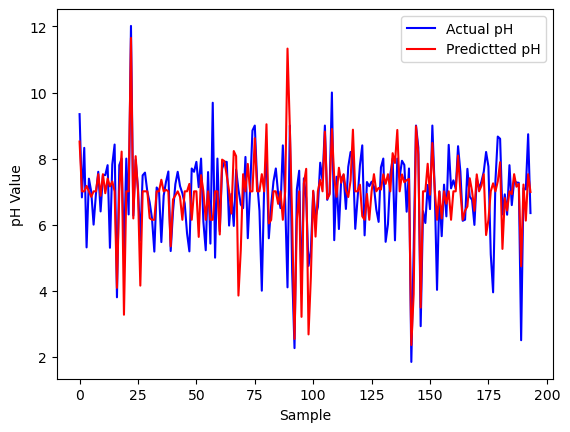

In [332]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [333]:
diff_pH = yhat_pred.flatten()- y_val

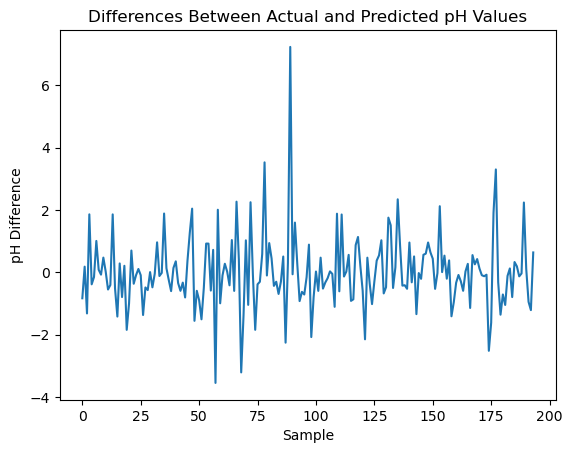

In [334]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [259]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 2s 3ms/step - loss: 22.5688
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.9761
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.0694
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.6888
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4646
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4597
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3469
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5202
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3017
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3127
Epoch 11/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4703
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.5081
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7229
Epoch 102/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8110
Epoch 103/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7236
Epoch 104/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6872
Epoch 105/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7028
Epoch 106/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7896
Epoch 107/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6412
Epoch 108/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6622
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7416
Epoch 110/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6228
Epoch 111/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5630
Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7125
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 1.4650
Epoch 200/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5600
Epoch 201/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5201
Epoch 202/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4845
Epoch 203/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4645
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5242
Epoch 205/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5458
Epoch 206/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5325
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5962
Epoch 208/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4895
Epoch 209/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5912
Epoch 210/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4858
Epoch 211/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.7159
Epoch 298/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7089
Epoch 299/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8413
Epoch 300/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8100
Epoch 301/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7485
Epoch 302/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6523
Epoch 303/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6142
Epoch 304/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6347
Epoch 305/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6046
Epoch 306/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8175
Epoch 307/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6819
Epoch 308/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6949
Epoch 309/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3533
Epoch 396/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4348
Epoch 397/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2747
Epoch 398/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2657
Epoch 399/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4724
Epoch 400/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2024
Epoch 401/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5782
Epoch 402/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2904
Epoch 403/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4218
Epoch 404/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.9793
Epoch 405/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8481
Epoch 406/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7077
Epoch 407/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.6163
Epoch 494/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5586
Epoch 495/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5074
Epoch 496/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3818
Epoch 497/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5445
Epoch 498/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5490
Epoch 499/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3680
Epoch 500/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3518
Epoch 501/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2892
Epoch 502/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6635
Epoch 503/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7404
Epoch 504/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8810
Epoch 505/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.5255
Epoch 592/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4485
Epoch 593/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4639
Epoch 594/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4575
Epoch 595/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4772
Epoch 596/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4429
Epoch 597/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5240
Epoch 598/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4301
Epoch 599/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4164
Epoch 600/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4650
Epoch 601/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4425
Epoch 602/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4092
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.9899
Epoch 690/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5468
Epoch 691/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3948
Epoch 692/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2587
Epoch 693/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2301
Epoch 694/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4242
Epoch 695/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3302
Epoch 696/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2552
Epoch 697/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2060
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1744
Epoch 699/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2969
Epoch 700/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1135
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.8953
Epoch 788/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3632
Epoch 789/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8662
Epoch 790/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8353
Epoch 791/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7405
Epoch 792/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7217
Epoch 793/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6756
Epoch 794/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6128
Epoch 795/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6075
Epoch 796/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5676
Epoch 797/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4937
Epoch 798/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4651
Epoch 799/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.5045
Epoch 886/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5572
Epoch 887/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4985
Epoch 888/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5316
Epoch 889/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4872
Epoch 890/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4684
Epoch 891/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4387
Epoch 892/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4907
Epoch 893/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5536
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5891
Epoch 895/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5646
Epoch 896/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5637
Epoch 897/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.7075
Epoch 984/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7352
Epoch 985/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5570
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6642
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5465
Epoch 988/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5611
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5937
Epoch 990/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5081
Epoch 991/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5074
Epoch 992/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5408
Epoch 993/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5035
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4202
Epoch 995/1000
25/2

In [260]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 3ms/step


In [261]:
MSE_pred

[1.2688856248222429]

In [262]:
MSE_train

[1.4379113266143184]

In [263]:
yhat_pred

array([[ 9.40658  ],
       [ 7.6891947],
       [ 8.03571  ],
       [ 7.7028656],
       [ 8.226185 ],
       [ 7.9932456],
       [ 7.3452616],
       [ 7.7760105],
       [ 6.493143 ],
       [ 6.986788 ],
       [ 6.93583  ],
       [ 6.5479593],
       [ 8.188795 ],
       [ 8.006268 ],
       [ 8.001144 ],
       [ 7.396535 ],
       [ 4.94328  ],
       [ 7.002539 ],
       [ 8.426417 ],
       [ 5.6165166],
       [ 8.381    ],
       [ 7.735277 ],
       [11.626491 ],
       [ 6.5479593],
       [ 8.094261 ],
       [ 7.1499915],
       [ 7.511591 ],
       [ 8.003122 ],
       [ 7.836734 ],
       [ 7.1400967],
       [ 6.855258 ],
       [ 6.796403 ],
       [ 6.5479593],
       [ 7.4713707],
       [ 7.3686275],
       [ 7.534522 ],
       [ 7.96791  ],
       [ 7.5492783],
       [ 7.5966415],
       [ 6.5479593],
       [ 6.8133464],
       [ 7.3390284],
       [ 6.9356623],
       [ 7.06211  ],
       [ 6.5479593],
       [ 7.526022 ],
       [ 6.5479593],
       [ 8.15

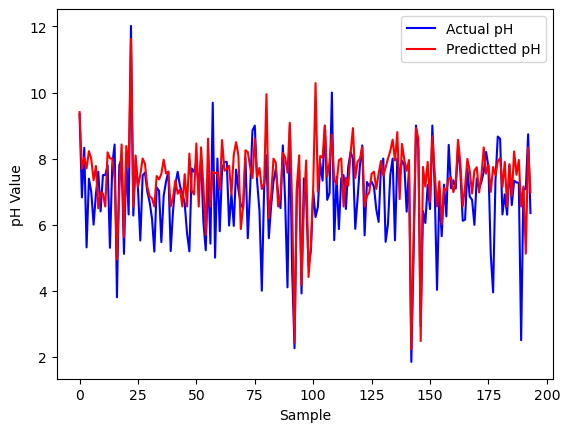

In [264]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [265]:
diff_pH = yhat_pred.flatten()- y_val

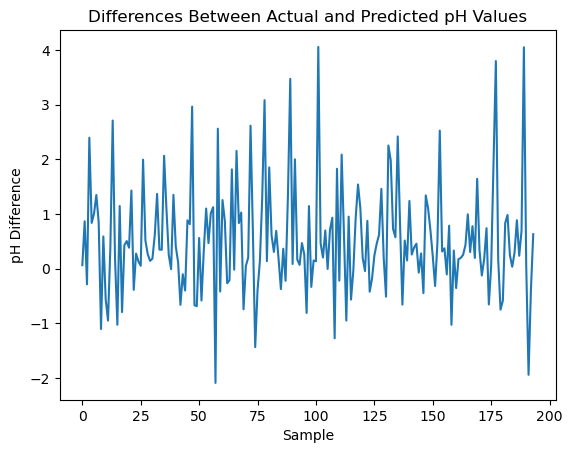

In [266]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [136]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 3s 2ms/step - loss: 20.4303
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.1051
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7069
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5284
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.5088
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6246
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4012
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.5068
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4204
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4202
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3892
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3976
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2147
Epoch 102/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2225
Epoch 103/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2200
Epoch 104/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2153
Epoch 105/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2196
Epoch 106/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2085
Epoch 107/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2152
Epoch 108/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2099
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2935
Epoch 110/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2347
Epoch 111/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2146
Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2122
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.2398
Epoch 200/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2300
Epoch 201/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2274
Epoch 202/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2231
Epoch 203/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2102
Epoch 204/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1981
Epoch 205/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2027
Epoch 206/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2015
Epoch 207/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.2103
Epoch 208/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2062
Epoch 209/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2064
Epoch 210/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.2143
Epoch 211/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 0.1941
Epoch 298/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1865
Epoch 299/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2076
Epoch 300/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2247
Epoch 301/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1941
Epoch 302/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1891
Epoch 303/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1903
Epoch 304/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1931
Epoch 305/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 306/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2067
Epoch 307/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2319
Epoch 308/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2573
Epoch 309/1000
25/2

25/25 [==============================] - 0s 8ms/step - loss: 0.1967
Epoch 396/1000
25/25 [==============================] - 0s 15ms/step - loss: 0.1934
Epoch 397/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1967
Epoch 398/1000
25/25 [==============================] - 0s 13ms/step - loss: 0.2276
Epoch 399/1000
25/25 [==============================] - 0s 13ms/step - loss: 0.1893
Epoch 400/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1981
Epoch 401/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1842
Epoch 402/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1934
Epoch 403/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1893
Epoch 404/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1888
Epoch 405/1000
25/25 [==============================] - 0s 10ms/step - loss: 0.1913
Epoch 406/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.2061
Epoch 407/1000


25/25 [==============================] - 0s 5ms/step - loss: 0.1936
Epoch 494/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1952
Epoch 495/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1898
Epoch 496/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1953
Epoch 497/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2010
Epoch 498/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1872
Epoch 499/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1852
Epoch 500/1000
25/25 [==============================] - 0s 13ms/step - loss: 0.1850
Epoch 501/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1925
Epoch 502/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1909
Epoch 503/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.2208
Epoch 504/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2083
Epoch 505/1000
25/

25/25 [==============================] - 0s 9ms/step - loss: 0.1917
Epoch 592/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1947
Epoch 593/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2023
Epoch 594/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1906
Epoch 595/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2114
Epoch 596/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1933
Epoch 597/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1808
Epoch 598/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1869
Epoch 599/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.2154
Epoch 600/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1896
Epoch 601/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1786
Epoch 602/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1999
Epoch 603/1000
25/2

25/25 [==============================] - 0s 8ms/step - loss: 0.1820
Epoch 690/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.1854
Epoch 691/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1985
Epoch 692/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1920
Epoch 693/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1879
Epoch 694/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2174
Epoch 695/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1904
Epoch 696/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1955
Epoch 697/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1814
Epoch 698/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1996
Epoch 699/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1816
Epoch 700/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.1901
Epoch 701/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 0.1801
Epoch 788/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1922
Epoch 789/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1967
Epoch 790/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1967
Epoch 791/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1819
Epoch 792/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.1783
Epoch 793/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1827
Epoch 794/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1998
Epoch 795/1000
25/25 [==============================] - 0s 10ms/step - loss: 0.1928
Epoch 796/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.1896
Epoch 797/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.2029
Epoch 798/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.1875
Epoch 799/1000
25/

25/25 [==============================] - 0s 7ms/step - loss: 0.1814
Epoch 886/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1820
Epoch 887/1000
25/25 [==============================] - 0s 11ms/step - loss: 0.2008
Epoch 888/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.2076
Epoch 889/1000
25/25 [==============================] - 0s 10ms/step - loss: 0.1861
Epoch 890/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.1981
Epoch 891/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1841
Epoch 892/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1812
Epoch 893/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1877
Epoch 894/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.2187
Epoch 895/1000
25/25 [==============================] - 0s 15ms/step - loss: 0.1875
Epoch 896/1000
25/25 [==============================] - 0s 10ms/step - loss: 0.1861
Epoch 897/1000


25/25 [==============================] - 0s 16ms/step - loss: 0.1850
Epoch 984/1000
25/25 [==============================] - 1s 33ms/step - loss: 0.1885
Epoch 985/1000
25/25 [==============================] - 0s 15ms/step - loss: 0.1813
Epoch 986/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1811
Epoch 987/1000
25/25 [==============================] - 0s 15ms/step - loss: 0.1801
Epoch 988/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1839
Epoch 989/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1877
Epoch 990/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1923
Epoch 991/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1986
Epoch 992/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1918
Epoch 993/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1899
Epoch 994/1000
25/25 [==============================] - 0s 12ms/step - loss: 0.1922
Epoch 995/1000

In [137]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 4ms/step


In [138]:
MSE_pred

[0.16955447058375508]

In [139]:
MSE_train

[0.18754668599327445]

In [140]:
yhat_pred

array([[7.937055 ],
       [7.9252057],
       [7.7352567],
       [7.881569 ],
       [7.701381 ],
       [7.78963  ],
       [7.282356 ],
       [7.8322406],
       [7.9892344],
       [7.9838076],
       [7.8193316],
       [7.978234 ],
       [7.827147 ],
       [7.833021 ],
       [7.9733906],
       [7.6782746],
       [7.6258407],
       [7.829643 ],
       [7.794307 ],
       [7.993236 ],
       [7.744393 ],
       [7.8892493],
       [7.824164 ],
       [7.3449016],
       [7.769481 ],
       [7.801182 ],
       [7.9970884],
       [7.5766034],
       [7.895776 ],
       [7.859222 ],
       [7.2979064],
       [7.813968 ],
       [7.2001233],
       [7.6610637],
       [7.16976  ],
       [7.9212346],
       [7.961614 ],
       [7.760836 ],
       [7.679734 ],
       [7.744393 ],
       [7.897167 ],
       [7.1754594],
       [7.556613 ],
       [7.3173385],
       [7.2333007],
       [7.6510816],
       [7.9402037],
       [7.8423514],
       [7.3955398],
       [7.9592314],


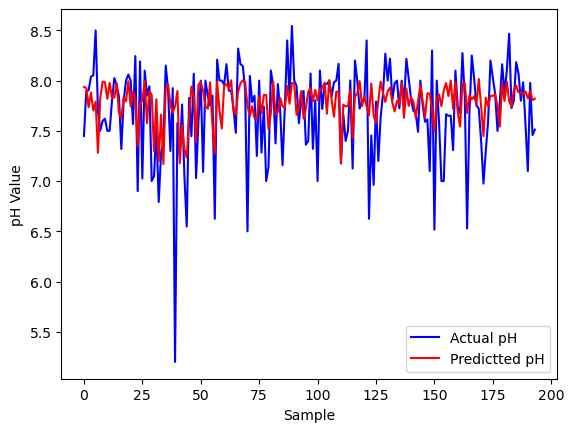

In [141]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [142]:
diff_pH = yhat_pred.flatten() - y_val

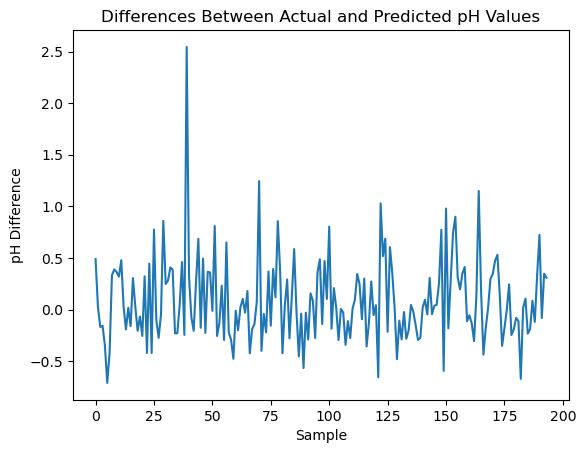

In [143]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

#### Getting Nitrate Value

In [116]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Totalcaliform']]

In [117]:
X.head()

Temperature   D.O   pH  Conductivity  B.O.D  Totalcaliform
0          9.0   9.0  8.0          85.0    0.1          397.0
1         10.0   9.0  8.0         102.0    0.3          954.0
2         11.0   9.0  8.0          96.0    0.2          653.0
3         13.0   9.0  8.0          94.0    0.2          317.0
4         14.0  10.0  8.0         112.0    0.2         1072.0

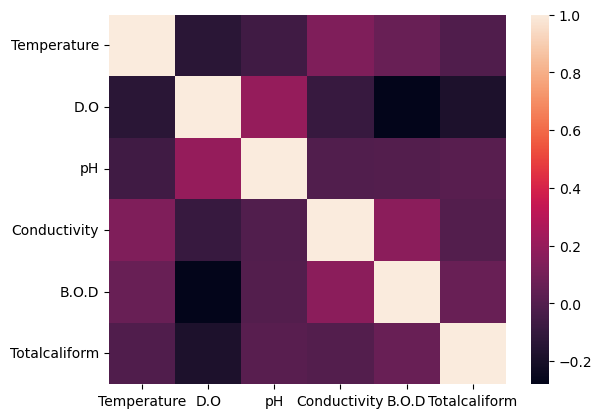

In [118]:
sns.heatmap(X.corr());

In [119]:
y = df_new['Nitrate']

In [120]:
y.value_counts()

Nitrate
4.000000     42
3.000000     41
1.380000     34
2.000000     27
1.711670     19
             ..
2.842445      1
2.806900      1
1.875483      1
1.888775      1
30.000000     1
Name: count, Length: 674, dtype: int64

In [121]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [122]:
X_train.shape

(773, 6)

In [123]:
y_train.shape

(773,)

In [124]:
X_val.shape

(194, 6)

In [125]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

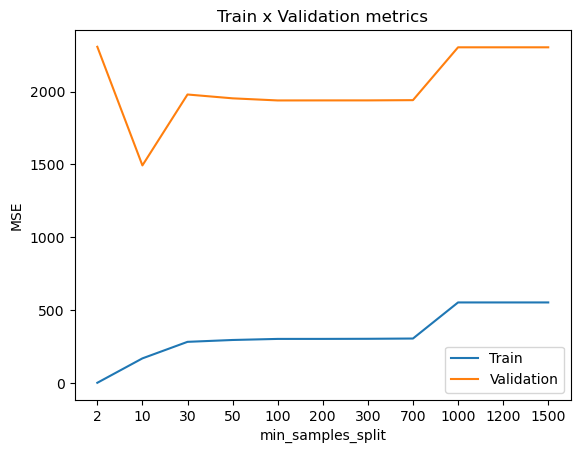

In [126]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [127]:
min_samples_split_list = np.arange(2,30)

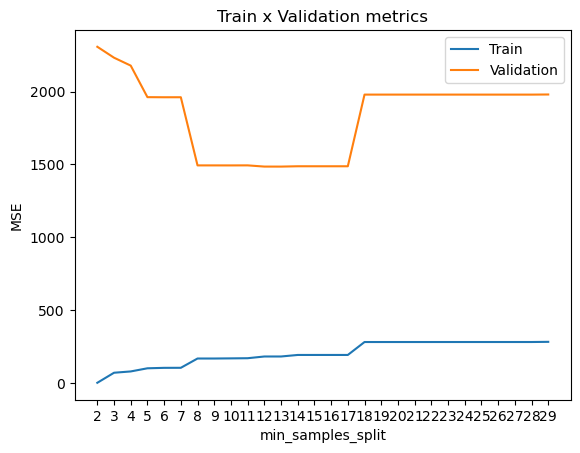

In [128]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [129]:
min_samples_split_list = np.arange(7,20)

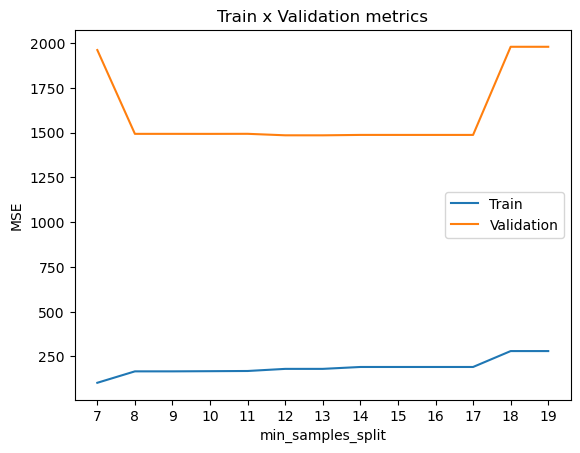

In [130]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [131]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

6

In [132]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

13

In [133]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

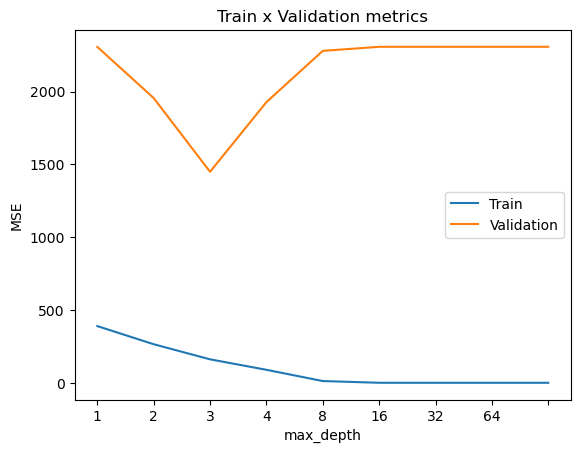

In [134]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

    Chosen max_depth = 3
    Chosen min_samples_split = 13

In [135]:
decision_tree_nitr_model = DecisionTreeRegressor(min_samples_split = 13,
                                             max_depth = 3,
                                             random_state = 123).fit(X_train,y_train)

In [136]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 215.4973
MSE for validation:
	MSE: 1449.2868


In [137]:
y_pred_nitr = decision_tree_nitr_model.predict(X_val)

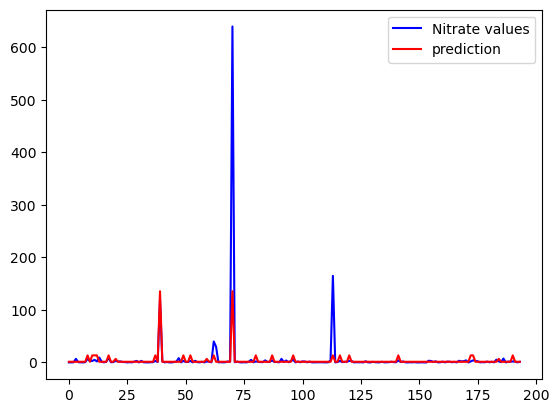

In [138]:
plt.plot(range(len(y_val)),y_val,'b',label='Nitrate values')
plt.plot(range(len(y_pred_nitr)),y_pred_nitr,'r',label='prediction')
plt.legend(loc='best');

In [139]:
diff_nitr = y_pred_nitr - y_val

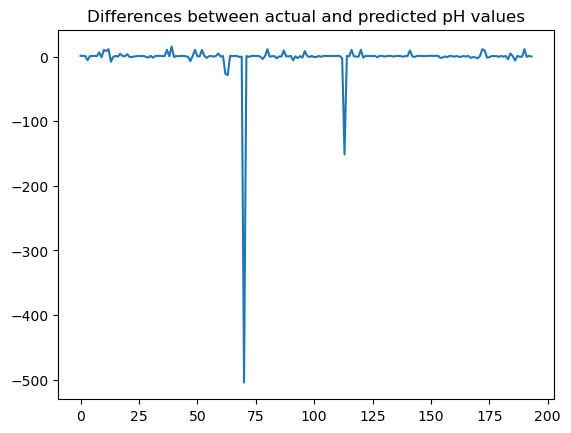

In [140]:
plt.plot(range(len(diff_nitr)),diff_nitr)
plt.title('Differences between actual and predicted pH values');

In [141]:
decision_tree_nitr_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [142]:
degree_list = np.arange(1,5)

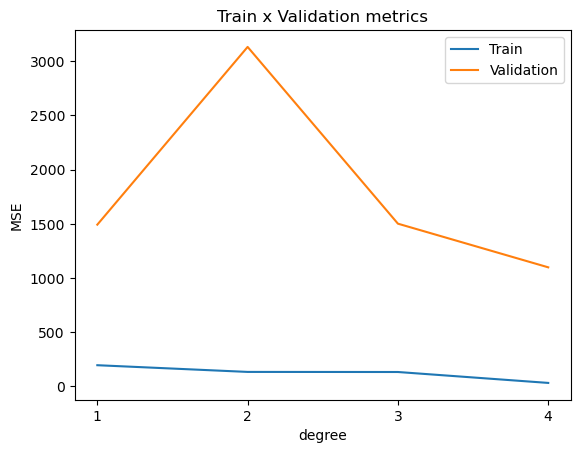

In [143]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = DecisionTreeRegressor(min_samples_split = 10,
                                  max_depth = 6,
                                  random_state = 123).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [144]:
MSE_list_val

[1492.5582918562636,
 3132.1135956094645,
 1501.5706671397156,
 1098.8503438678115]

In [145]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

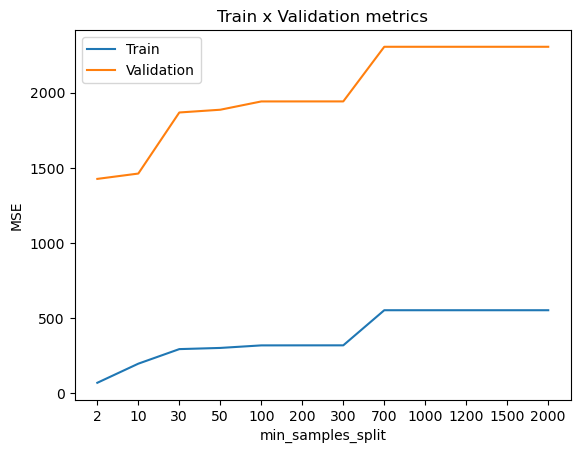

In [146]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [147]:
min_samples_split_list = np.arange(2,11)

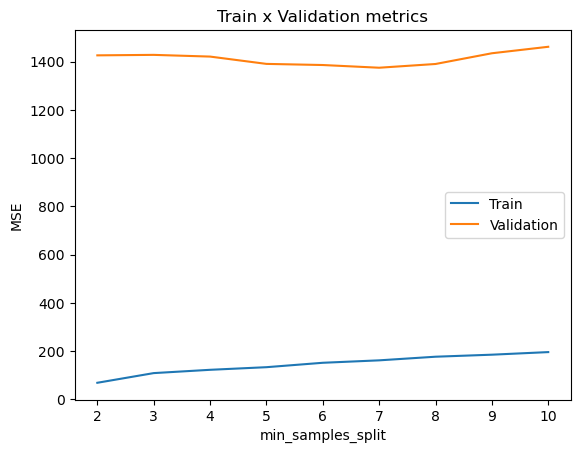

In [148]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [149]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

5

In [150]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

7

In [151]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

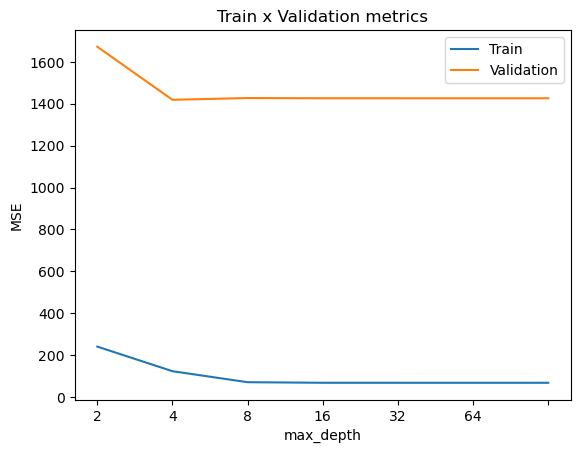

In [152]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [153]:
MSE_list_val

[1670.9898320871157,
 1418.2308339379058,
 1426.6334886784455,
 1425.602448664635,
 1425.594997712932,
 1425.5953247611526,
 1425.5953247611526]

In [154]:
max_depth_list = np.arange(8,33)

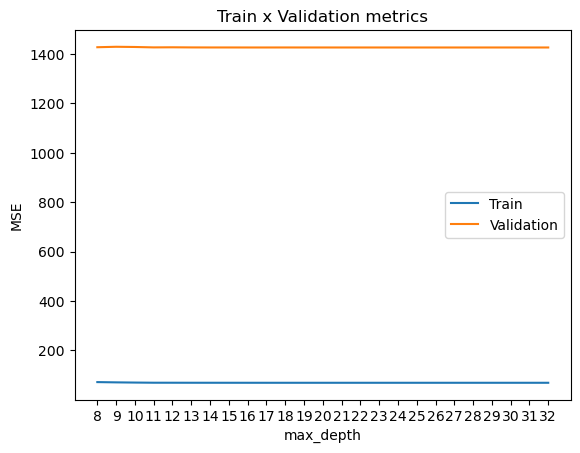

In [155]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [156]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

17

In [157]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

25

In [158]:
n_estimators_list = [10,50,100,500,1000,2000]

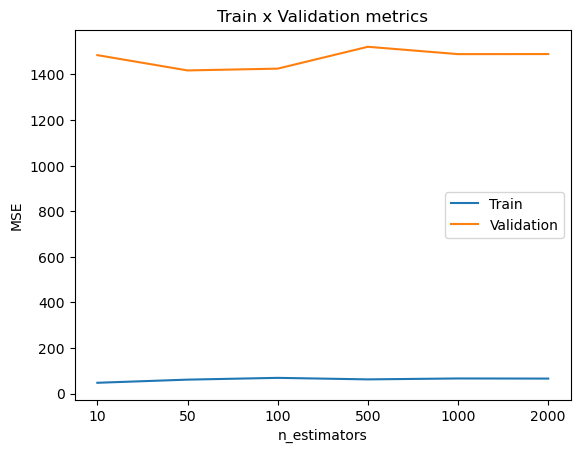

In [159]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [160]:
n_estimators_list = np.arange(10,100,5)

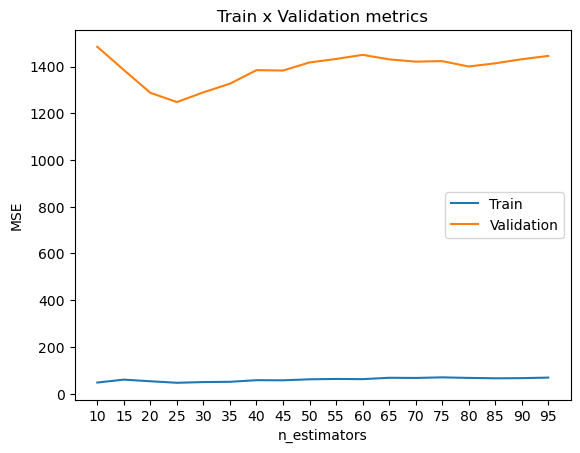

In [161]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [162]:
MSE_list_val

[1484.8966722670145,
 1385.511131178504,
 1287.9075817728335,
 1248.3109864643377,
 1289.9177863799018,
 1326.9351763773477,
 1384.886591109946,
 1383.1919447016583,
 1417.7652094019156,
 1432.7292065239926,
 1450.3241065725535,
 1431.0775883567862,
 1421.3187788552707,
 1423.5615926606724,
 1400.4292000258395,
 1414.1197566715973,
 1431.514089288314,
 1445.8430953609154]

In [163]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

3

In [164]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

25

    Chosen max_depth = 25
    Chosen n_estimators = 25
    Chosen min_samples_split = 7

In [165]:
random_forest_nitr_model = RandomForestRegressor(n_estimators = 25,
                                             max_depth = 25, 
                                             min_samples_split = 7).fit(X_train,y_train)

In [166]:
print(f"MSE for train:\n\tMSE: {MSE(random_forest_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(random_forest_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 151.0610
MSE for validation:
	MSE: 1379.8928


In [167]:
y_pred_nitr = random_forest_nitr_model.predict(X_val)

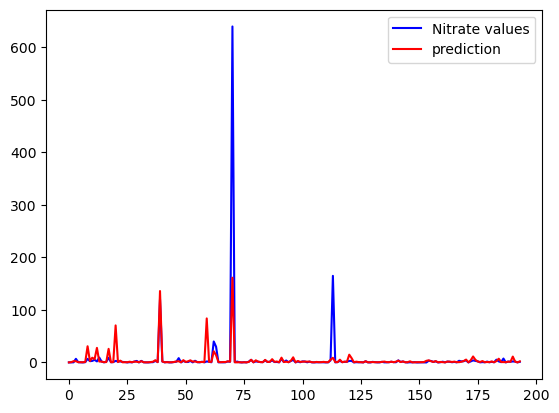

In [168]:
plt.plot(range(len(y_val)),y_val,'b',label='Nitrate values')
plt.plot(range(len(y_pred_nitr)),y_pred_nitr,'r',label='prediction')
plt.legend(loc='best');

In [169]:
diff_nitr = y_pred_nitr - y_val

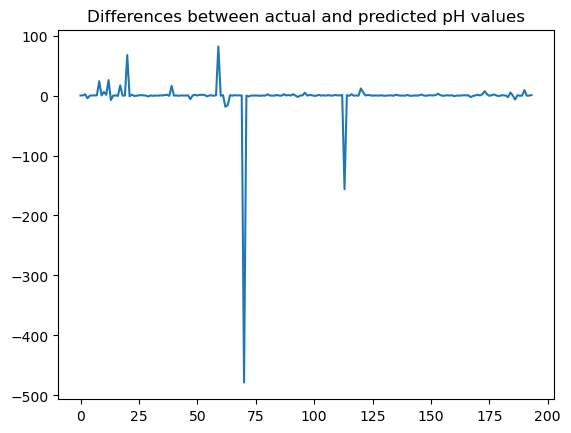

In [170]:
plt.plot(range(len(diff_nitr)),diff_nitr)
plt.title('Differences between actual and predicted pH values');

In [171]:
degree_list = np.arange(1,5)

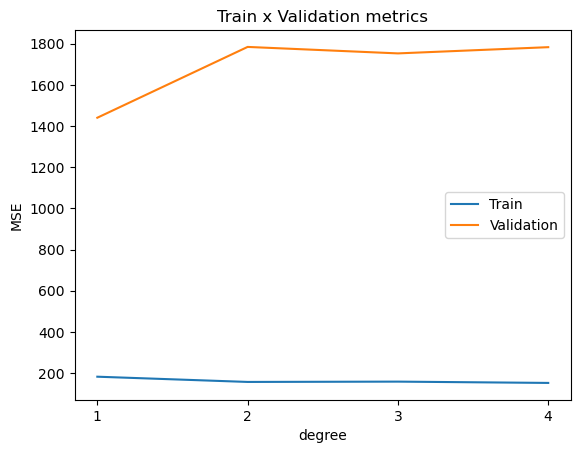

In [172]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = RandomForestRegressor(n_estimators = 25,
                                  max_depth = 25,
                                  min_samples_split = 7).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [173]:
MSE_list_val

[1440.5065848052361,
 1784.4173539836195,
 1752.9715888466062,
 1783.1991795581753]

In [174]:
n = int(len(X_train)*0.8) ## Using 80% to train and 20% to eval

In [175]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [176]:
n_estimators_list = [10,50,100,500,1000,2000]

In [177]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = XGBRegressor(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

[0]	validation_0-rmse:12.21689
[1]	validation_0-rmse:12.24081
[2]	validation_0-rmse:13.79113
[3]	validation_0-rmse:13.36284
[4]	validation_0-rmse:13.21338
[5]	validation_0-rmse:13.29361
[6]	validation_0-rmse:13.53318
[7]	validation_0-rmse:13.84803
[8]	validation_0-rmse:13.91526
[9]	validation_0-rmse:14.02508
[0]	validation_0-rmse:12.21689
[1]	validation_0-rmse:12.24081
[2]	validation_0-rmse:13.79113
[3]	validation_0-rmse:13.36284
[4]	validation_0-rmse:13.21338
[5]	validation_0-rmse:13.29361
[6]	validation_0-rmse:13.53318
[7]	validation_0-rmse:13.84803
[8]	validation_0-rmse:13.91526
[9]	validation_0-rmse:14.02508
[10]	validation_0-rmse:14.11432
[11]	validation_0-rmse:14.21552
[12]	validation_0-rmse:14.37288
[13]	validation_0-rmse:14.44311
[14]	validation_0-rmse:14.53206
[15]	validation_0-rmse:14.65584
[16]	validation_0-rmse:14.74246
[17]	validation_0-rmse:14.78937
[18]	validation_0-rmse:14.86153
[19]	validation_0-rmse:14.90303
[20]	validation_0-rmse:14.96905
[21]	validation_0-rmse:14.97

[98]	validation_0-rmse:14.98742
[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	valida

[347]	validation_0-rmse:14.98633
[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	validation_0-rmse:14.98633
[377]	vali

[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	validation_0-rmse:14.98636
[129]	valid

[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	validation_0-rmse:14.98633
[377]	validation_0-rmse:14.98633
[378]	vali

[597]	validation_0-rmse:14.98633
[598]	validation_0-rmse:14.98633
[599]	validation_0-rmse:14.98633
[600]	validation_0-rmse:14.98633
[601]	validation_0-rmse:14.98633
[602]	validation_0-rmse:14.98633
[603]	validation_0-rmse:14.98633
[604]	validation_0-rmse:14.98633
[605]	validation_0-rmse:14.98633
[606]	validation_0-rmse:14.98633
[607]	validation_0-rmse:14.98633
[608]	validation_0-rmse:14.98633
[609]	validation_0-rmse:14.98633
[610]	validation_0-rmse:14.98633
[611]	validation_0-rmse:14.98633
[612]	validation_0-rmse:14.98633
[613]	validation_0-rmse:14.98633
[614]	validation_0-rmse:14.98633
[615]	validation_0-rmse:14.98633
[616]	validation_0-rmse:14.98633
[617]	validation_0-rmse:14.98633
[618]	validation_0-rmse:14.98633
[619]	validation_0-rmse:14.98633
[620]	validation_0-rmse:14.98633
[621]	validation_0-rmse:14.98633
[622]	validation_0-rmse:14.98633
[623]	validation_0-rmse:14.98633
[624]	validation_0-rmse:14.98633
[625]	validation_0-rmse:14.98633
[626]	validation_0-rmse:14.98633
[627]	vali

[846]	validation_0-rmse:14.98633
[847]	validation_0-rmse:14.98633
[848]	validation_0-rmse:14.98633
[849]	validation_0-rmse:14.98633
[850]	validation_0-rmse:14.98633
[851]	validation_0-rmse:14.98633
[852]	validation_0-rmse:14.98633
[853]	validation_0-rmse:14.98633
[854]	validation_0-rmse:14.98633
[855]	validation_0-rmse:14.98633
[856]	validation_0-rmse:14.98633
[857]	validation_0-rmse:14.98633
[858]	validation_0-rmse:14.98633
[859]	validation_0-rmse:14.98633
[860]	validation_0-rmse:14.98633
[861]	validation_0-rmse:14.98633
[862]	validation_0-rmse:14.98633
[863]	validation_0-rmse:14.98633
[864]	validation_0-rmse:14.98633
[865]	validation_0-rmse:14.98633
[866]	validation_0-rmse:14.98633
[867]	validation_0-rmse:14.98633
[868]	validation_0-rmse:14.98633
[869]	validation_0-rmse:14.98633
[870]	validation_0-rmse:14.98633
[871]	validation_0-rmse:14.98633
[872]	validation_0-rmse:14.98633
[873]	validation_0-rmse:14.98633
[874]	validation_0-rmse:14.98633
[875]	validation_0-rmse:14.98633
[876]	vali

[98]	validation_0-rmse:14.98742
[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	valida

[347]	validation_0-rmse:14.98633
[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	validation_0-rmse:14.98633
[377]	vali

[596]	validation_0-rmse:14.98633
[597]	validation_0-rmse:14.98633
[598]	validation_0-rmse:14.98633
[599]	validation_0-rmse:14.98633
[600]	validation_0-rmse:14.98633
[601]	validation_0-rmse:14.98633
[602]	validation_0-rmse:14.98633
[603]	validation_0-rmse:14.98633
[604]	validation_0-rmse:14.98633
[605]	validation_0-rmse:14.98633
[606]	validation_0-rmse:14.98633
[607]	validation_0-rmse:14.98633
[608]	validation_0-rmse:14.98633
[609]	validation_0-rmse:14.98633
[610]	validation_0-rmse:14.98633
[611]	validation_0-rmse:14.98633
[612]	validation_0-rmse:14.98633
[613]	validation_0-rmse:14.98633
[614]	validation_0-rmse:14.98633
[615]	validation_0-rmse:14.98633
[616]	validation_0-rmse:14.98633
[617]	validation_0-rmse:14.98633
[618]	validation_0-rmse:14.98633
[619]	validation_0-rmse:14.98633
[620]	validation_0-rmse:14.98633
[621]	validation_0-rmse:14.98633
[622]	validation_0-rmse:14.98633
[623]	validation_0-rmse:14.98633
[624]	validation_0-rmse:14.98633
[625]	validation_0-rmse:14.98633
[626]	vali

[845]	validation_0-rmse:14.98633
[846]	validation_0-rmse:14.98633
[847]	validation_0-rmse:14.98633
[848]	validation_0-rmse:14.98633
[849]	validation_0-rmse:14.98633
[850]	validation_0-rmse:14.98633
[851]	validation_0-rmse:14.98633
[852]	validation_0-rmse:14.98633
[853]	validation_0-rmse:14.98633
[854]	validation_0-rmse:14.98633
[855]	validation_0-rmse:14.98633
[856]	validation_0-rmse:14.98633
[857]	validation_0-rmse:14.98633
[858]	validation_0-rmse:14.98633
[859]	validation_0-rmse:14.98633
[860]	validation_0-rmse:14.98633
[861]	validation_0-rmse:14.98633
[862]	validation_0-rmse:14.98633
[863]	validation_0-rmse:14.98633
[864]	validation_0-rmse:14.98633
[865]	validation_0-rmse:14.98633
[866]	validation_0-rmse:14.98633
[867]	validation_0-rmse:14.98633
[868]	validation_0-rmse:14.98633
[869]	validation_0-rmse:14.98633
[870]	validation_0-rmse:14.98633
[871]	validation_0-rmse:14.98633
[872]	validation_0-rmse:14.98633
[873]	validation_0-rmse:14.98633
[874]	validation_0-rmse:14.98633
[875]	vali

[1091]	validation_0-rmse:14.98633
[1092]	validation_0-rmse:14.98633
[1093]	validation_0-rmse:14.98633
[1094]	validation_0-rmse:14.98633
[1095]	validation_0-rmse:14.98633
[1096]	validation_0-rmse:14.98633
[1097]	validation_0-rmse:14.98633
[1098]	validation_0-rmse:14.98633
[1099]	validation_0-rmse:14.98633
[1100]	validation_0-rmse:14.98633
[1101]	validation_0-rmse:14.98633
[1102]	validation_0-rmse:14.98633
[1103]	validation_0-rmse:14.98633
[1104]	validation_0-rmse:14.98633
[1105]	validation_0-rmse:14.98633
[1106]	validation_0-rmse:14.98633
[1107]	validation_0-rmse:14.98633
[1108]	validation_0-rmse:14.98633
[1109]	validation_0-rmse:14.98633
[1110]	validation_0-rmse:14.98633
[1111]	validation_0-rmse:14.98633
[1112]	validation_0-rmse:14.98633
[1113]	validation_0-rmse:14.98633
[1114]	validation_0-rmse:14.98633
[1115]	validation_0-rmse:14.98633
[1116]	validation_0-rmse:14.98633
[1117]	validation_0-rmse:14.98633
[1118]	validation_0-rmse:14.98633
[1119]	validation_0-rmse:14.98633
[1120]	validat

[1332]	validation_0-rmse:14.98633
[1333]	validation_0-rmse:14.98633
[1334]	validation_0-rmse:14.98633
[1335]	validation_0-rmse:14.98633
[1336]	validation_0-rmse:14.98633
[1337]	validation_0-rmse:14.98633
[1338]	validation_0-rmse:14.98633
[1339]	validation_0-rmse:14.98633
[1340]	validation_0-rmse:14.98633
[1341]	validation_0-rmse:14.98633
[1342]	validation_0-rmse:14.98633
[1343]	validation_0-rmse:14.98633
[1344]	validation_0-rmse:14.98633
[1345]	validation_0-rmse:14.98633
[1346]	validation_0-rmse:14.98633
[1347]	validation_0-rmse:14.98633
[1348]	validation_0-rmse:14.98633
[1349]	validation_0-rmse:14.98633
[1350]	validation_0-rmse:14.98633
[1351]	validation_0-rmse:14.98633
[1352]	validation_0-rmse:14.98633
[1353]	validation_0-rmse:14.98633
[1354]	validation_0-rmse:14.98633
[1355]	validation_0-rmse:14.98633
[1356]	validation_0-rmse:14.98633
[1357]	validation_0-rmse:14.98633
[1358]	validation_0-rmse:14.98633
[1359]	validation_0-rmse:14.98633
[1360]	validation_0-rmse:14.98633
[1361]	validat

[1573]	validation_0-rmse:14.98633
[1574]	validation_0-rmse:14.98633
[1575]	validation_0-rmse:14.98633
[1576]	validation_0-rmse:14.98633
[1577]	validation_0-rmse:14.98633
[1578]	validation_0-rmse:14.98633
[1579]	validation_0-rmse:14.98633
[1580]	validation_0-rmse:14.98633
[1581]	validation_0-rmse:14.98633
[1582]	validation_0-rmse:14.98633
[1583]	validation_0-rmse:14.98633
[1584]	validation_0-rmse:14.98633
[1585]	validation_0-rmse:14.98633
[1586]	validation_0-rmse:14.98633
[1587]	validation_0-rmse:14.98633
[1588]	validation_0-rmse:14.98633
[1589]	validation_0-rmse:14.98633
[1590]	validation_0-rmse:14.98633
[1591]	validation_0-rmse:14.98633
[1592]	validation_0-rmse:14.98633
[1593]	validation_0-rmse:14.98633
[1594]	validation_0-rmse:14.98633
[1595]	validation_0-rmse:14.98633
[1596]	validation_0-rmse:14.98633
[1597]	validation_0-rmse:14.98633
[1598]	validation_0-rmse:14.98633
[1599]	validation_0-rmse:14.98633
[1600]	validation_0-rmse:14.98633
[1601]	validation_0-rmse:14.98633
[1602]	validat

[1814]	validation_0-rmse:14.98633
[1815]	validation_0-rmse:14.98633
[1816]	validation_0-rmse:14.98633
[1817]	validation_0-rmse:14.98633
[1818]	validation_0-rmse:14.98633
[1819]	validation_0-rmse:14.98633
[1820]	validation_0-rmse:14.98633
[1821]	validation_0-rmse:14.98633
[1822]	validation_0-rmse:14.98633
[1823]	validation_0-rmse:14.98633
[1824]	validation_0-rmse:14.98633
[1825]	validation_0-rmse:14.98633
[1826]	validation_0-rmse:14.98633
[1827]	validation_0-rmse:14.98633
[1828]	validation_0-rmse:14.98633
[1829]	validation_0-rmse:14.98633
[1830]	validation_0-rmse:14.98633
[1831]	validation_0-rmse:14.98633
[1832]	validation_0-rmse:14.98633
[1833]	validation_0-rmse:14.98633
[1834]	validation_0-rmse:14.98633
[1835]	validation_0-rmse:14.98633
[1836]	validation_0-rmse:14.98633
[1837]	validation_0-rmse:14.98633
[1838]	validation_0-rmse:14.98633
[1839]	validation_0-rmse:14.98633
[1840]	validation_0-rmse:14.98633
[1841]	validation_0-rmse:14.98633
[1842]	validation_0-rmse:14.98633
[1843]	validat

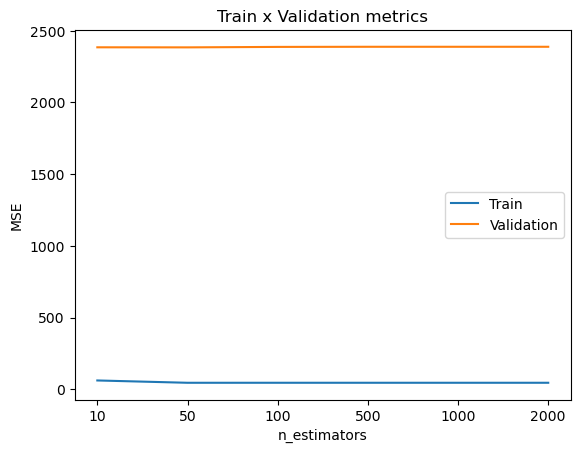

In [178]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [179]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

1

In [180]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

50

In [181]:
xgb_nitr_model = XGBRegressor(n_estimators = 50, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_nitr_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:13.93140
[1]	validation_0-rmse:12.98431
[2]	validation_0-rmse:12.32372
[3]	validation_0-rmse:12.03309
[4]	validation_0-rmse:12.01539
[5]	validation_0-rmse:11.26233
[6]	validation_0-rmse:10.66939
[7]	validation_0-rmse:10.11149
[8]	validation_0-rmse:9.71602
[9]	validation_0-rmse:9.39169
[10]	validation_0-rmse:9.08334
[11]	validation_0-rmse:8.89324
[12]	validation_0-rmse:8.74045
[13]	validation_0-rmse:8.61906
[14]	validation_0-rmse:8.61240
[15]	validation_0-rmse:8.56452
[16]	validation_0-rmse:8.58254
[17]	validation_0-rmse:8.58610
[18]	validation_0-rmse:8.64058
[19]	validation_0-rmse:8.69108
[20]	validation_0-rmse:8.75610
[21]	validation_0-rmse:8.83131
[22]	validation_0-rmse:8.91451
[23]	validation_0-rmse:8.98914
[24]	validation_0-rmse:9.00842
[25]	validation_0-rmse:9.03770
[26]	validation_0-rmse:9.09145
[27]	validation_0-rmse:9.14101
[28]	validation_0-rmse:9.19462
[29]	validation_0-rmse:9.24784
[30]	validation_0-rmse:9.31358
[31]	validation_0-rmse:9.37342
[32]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [182]:
xgb_nitr_model.best_iteration

49

In [183]:
print(f"MSE for train:\n\tMSE: {MSE(xgb_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(xgb_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 31.7594
MSE for validation:
	MSE: 2298.7988


In [184]:
y_pred_nitr = xgb_nitr_model.predict(X_val)

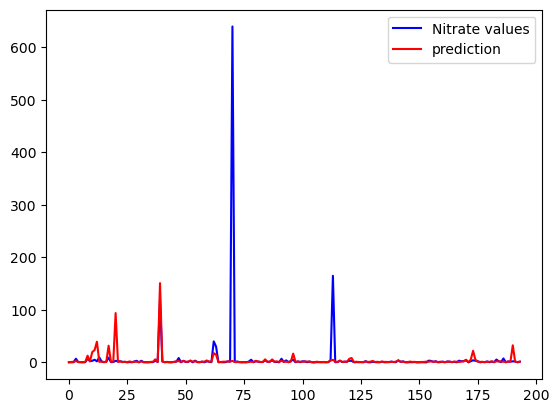

In [185]:
plt.plot(range(len(y_val)),y_val,'b',label='Nitrate values')
plt.plot(range(len(y_pred_nitr)),y_pred_nitr,'r',label='prediction')
plt.legend(loc='best');

In [186]:
diff_nitr = y_pred_nitr - y_val

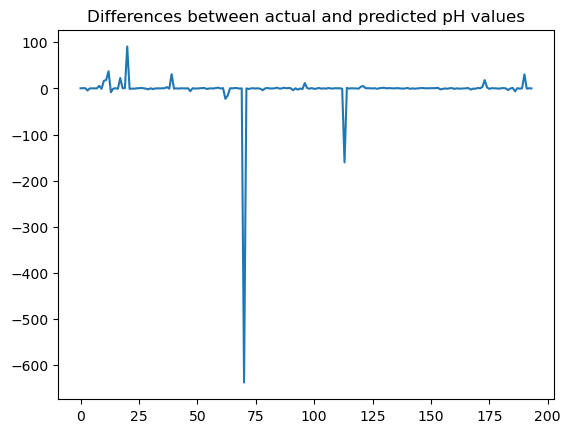

In [187]:
plt.plot(range(len(diff_nitr)),diff_nitr)
plt.title('Differences between actual and predicted pH values');

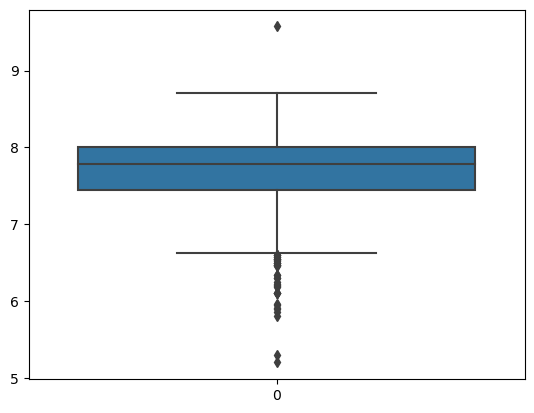

In [188]:
sns.boxplot(df['pH']);

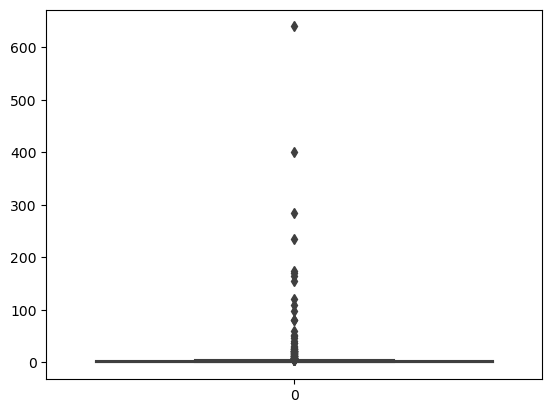

In [189]:
sns.boxplot(df['Nitrate']);

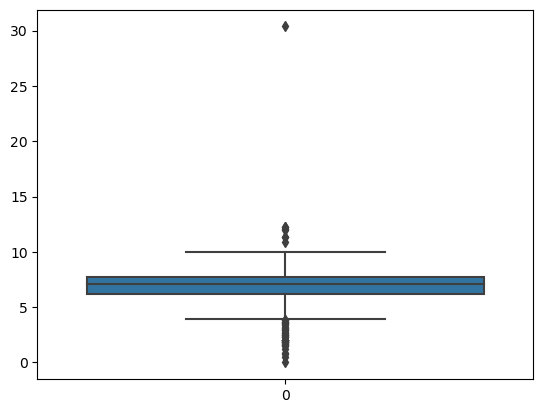

In [190]:
sns.boxplot(df['D.O']);

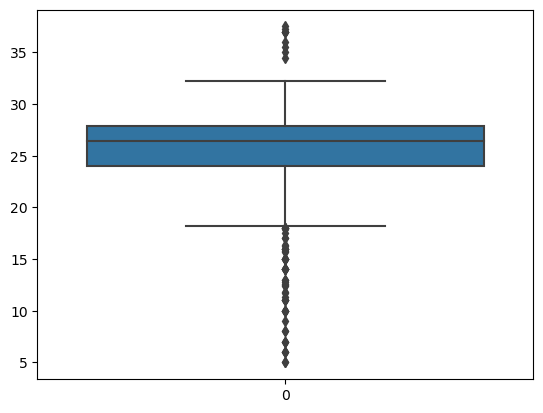

In [191]:
sns.boxplot(df['Temperature']);

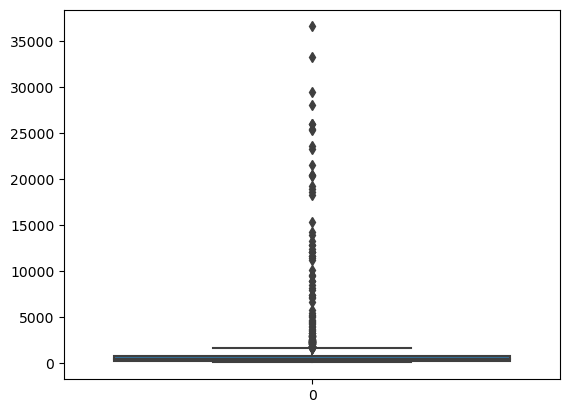

In [192]:
sns.boxplot(df['Conductivity']);

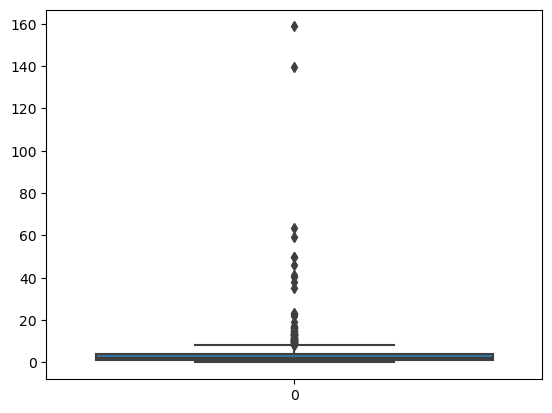

In [193]:
sns.boxplot(df['B.O.D']);

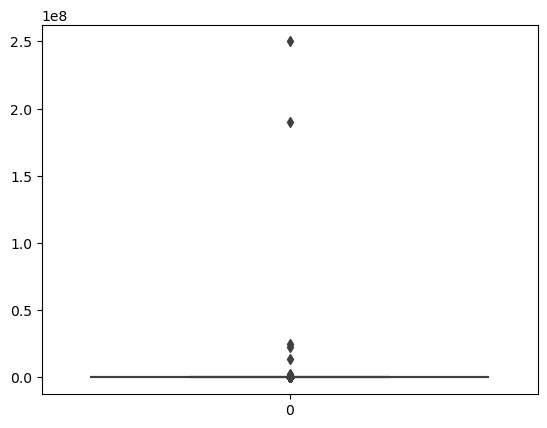

In [194]:
sns.boxplot(df['Totalcaliform']);

#### Getting D.O Value

In [144]:
X = df.loc[:,['Temperature','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [145]:
X.head()

Temperature   pH  Conductivity  B.O.D  Nitrate  Totalcaliform
0          9.0  8.0          85.0    0.1      0.2          397.0
1         10.0  8.0         102.0    0.3      0.4          954.0
2         11.0  8.0          96.0    0.2      0.3          653.0
3         13.0  8.0          94.0    0.2      0.4          317.0
4         14.0  8.0         112.0    0.2      0.5         1072.0

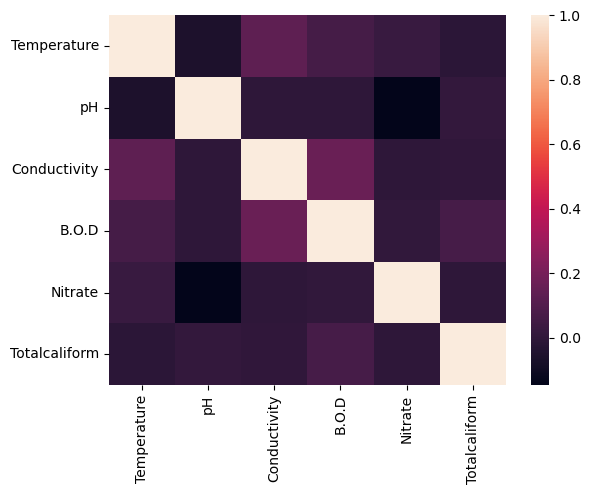

In [146]:
sns.heatmap(X.corr());

In [147]:
y = df_new['D.O']

In [148]:
y.value_counts()

D.O
8.000000    36
7.600000    26
7.700000    21
9.000000    20
7.300000    19
            ..
6.166667     1
6.188889     1
5.224000     1
5.844444     1
7.290000     1
Name: count, Length: 540, dtype: int64

In [149]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [150]:
X_train.shape

(773, 6)

In [151]:
y_train.shape

(773,)

In [152]:
X_val.shape

(194, 6)

In [153]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

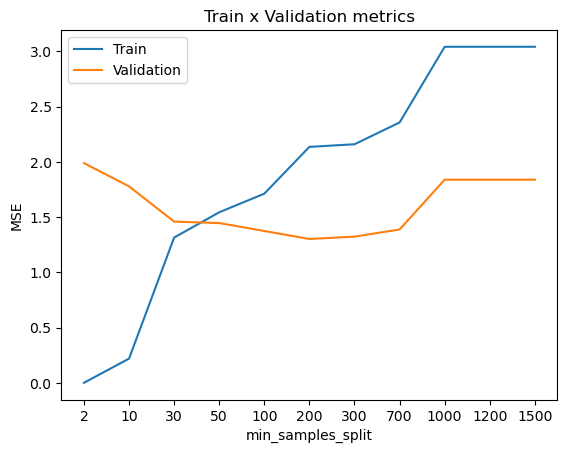

In [154]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [155]:
min_samples_split_list = np.arange(100,300,10)

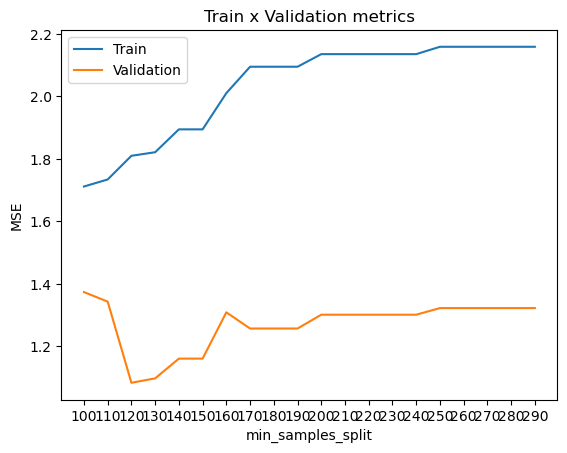

In [156]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [157]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

2

In [158]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

120

In [159]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

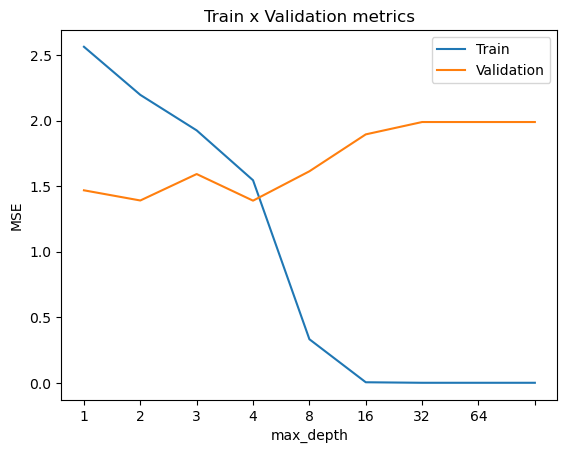

In [160]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [161]:
max_depth_list = np.arange(3,10)

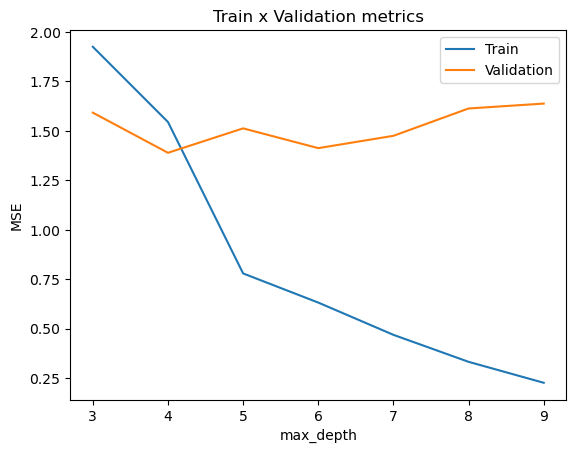

In [162]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

    Chosen max_depth = 4
    Chosen min_samples_split = 120

In [163]:
decision_tree_do_model = DecisionTreeRegressor(min_samples_split = 120,
                                             max_depth = 4,
                                             random_state = 123).fit(X_train,y_train)

In [164]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_do_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_do_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 1.9662
MSE for validation:
	MSE: 1.2626


In [165]:
y_pred_do = decision_tree_do_model.predict(X_val)

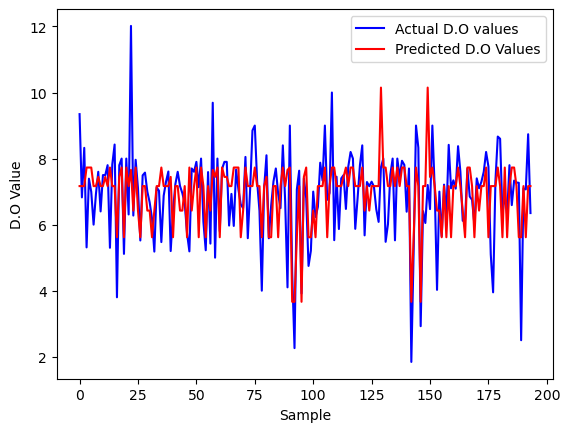

In [166]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O values')
plt.plot(range(len(y_pred_do)),y_pred_do,'r',label='Predicted D.O Values')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('D.O Value');

In [167]:
diff_do = y_pred_do - y_val

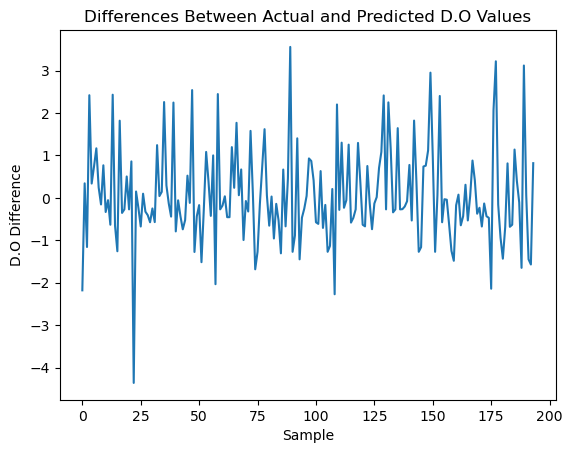

In [168]:
plt.plot(range(len(diff_do)),diff_do)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('D.O Difference');

In [169]:
decision_tree_do_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 120,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [170]:
degree_list = np.arange(1,5)

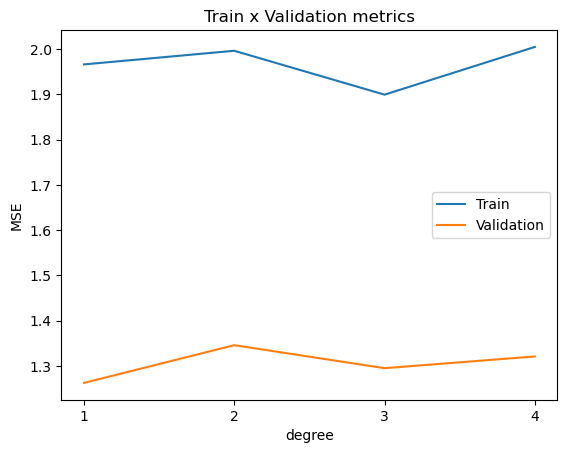

In [171]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = DecisionTreeRegressor(min_samples_split = 120,
                                  max_depth = 4,
                                  random_state = 123).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [172]:
MSE_list_val

[1.262601665317575, 1.3459699031971502, 1.2951933809737834, 1.321072458422356]

In [173]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

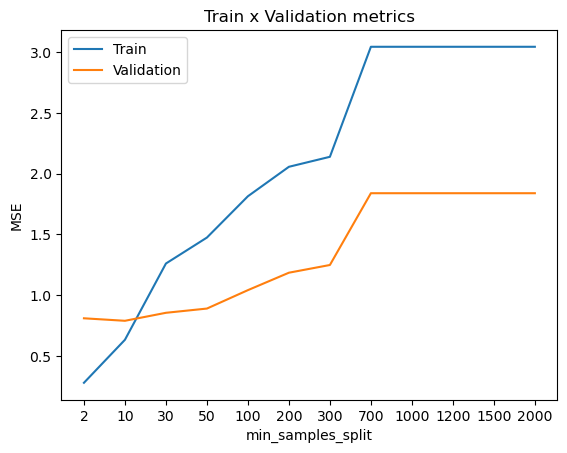

In [174]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [175]:
min_samples_split_list = np.arange(2,30)

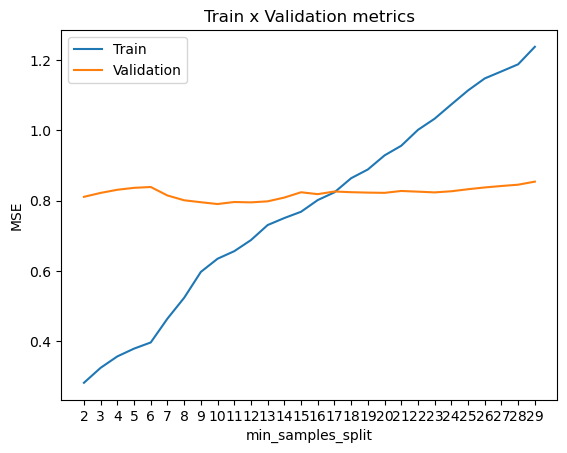

In [176]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [177]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

8

In [178]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

10

In [179]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

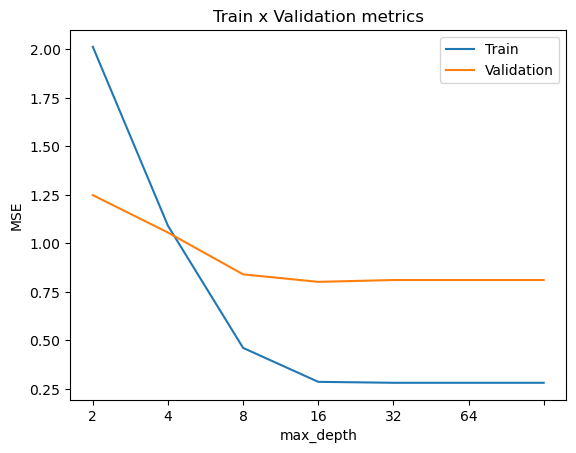

In [180]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [181]:
MSE_list_val

[1.2482090911994308,
 1.0553975116896588,
 0.839875896727465,
 0.8011774587514319,
 0.8106520187951638,
 0.8106520187951638,
 0.8106520187951638]

In [182]:
max_depth_list = np.arange(8,33)

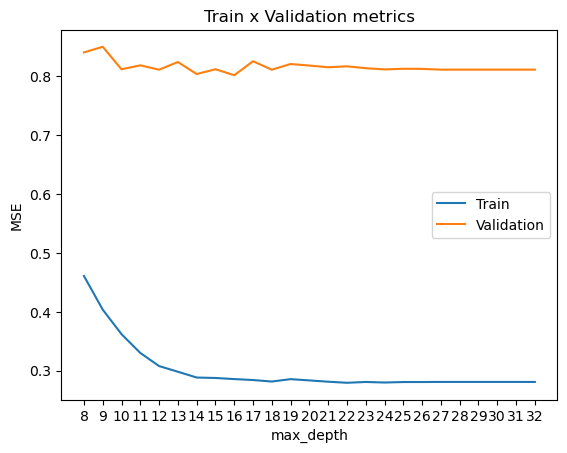

In [183]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [184]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

8

In [185]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

16

In [186]:
n_estimators_list = [10,50,100,500,1000,2000]

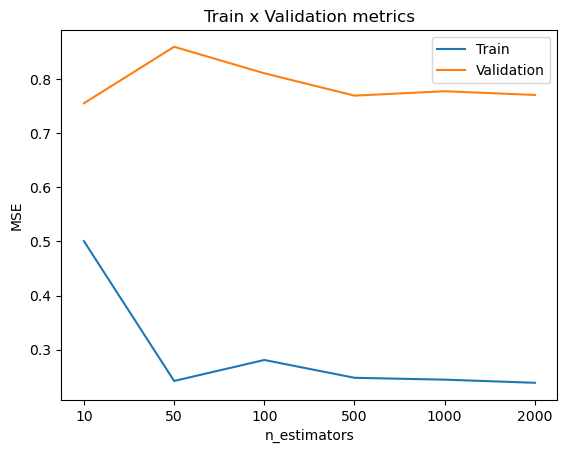

In [187]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [188]:
MSE_list_val

[0.7552665613766872,
 0.8596260389711765,
 0.8106520187951638,
 0.7693538111288876,
 0.7774729023954382,
 0.7706057445398652]

In [189]:
n_estimators_list = np.arange(5,50,5)

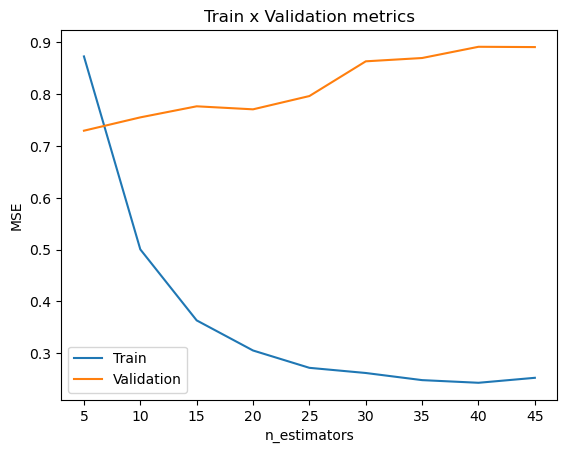

In [190]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [191]:
n_estimators_list = np.arange(1,11)

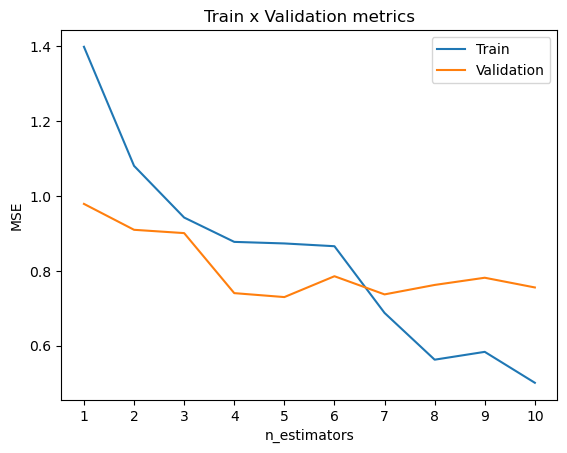

In [192]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [193]:
MSE_list_val

[0.9786839097526889,
 0.9094041784559069,
 0.9005716625669044,
 0.7400877952005849,
 0.7295463366715033,
 0.7852623123113541,
 0.7367120197855456,
 0.7619830892011316,
 0.7812399031111564,
 0.7552665613766872]

In [194]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

4

In [195]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

5

    Chosen max_depth = 16
    Chosen n_estimators = 5
    Chosen min_samples_split = 10

In [196]:
random_forest_do_model = RandomForestRegressor(n_estimators = 5,
                                             max_depth = 16, 
                                             min_samples_split = 10).fit(X_train,y_train)

In [197]:
print(f"MSE for train:\n\tMSE: {MSE(random_forest_do_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(random_forest_do_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.8294
MSE for validation:
	MSE: 0.9735


In [198]:
y_pred_do = random_forest_do_model.predict(X_val)

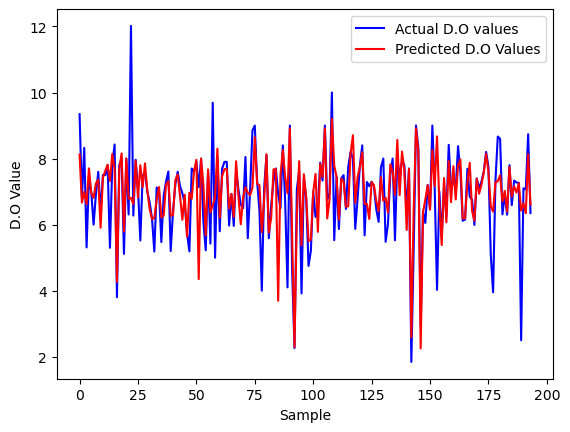

In [199]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O values')
plt.plot(range(len(y_pred_do)),y_pred_do,'r',label='Predicted D.O Values')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('D.O Value');

In [200]:
diff_do = y_pred_do - y_val

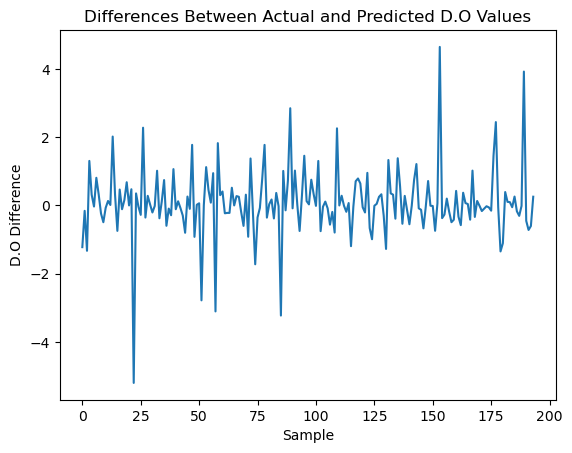

In [201]:
plt.plot(range(len(diff_do)),diff_do)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('D.O Difference');

In [202]:
degree_list = np.arange(1,5)

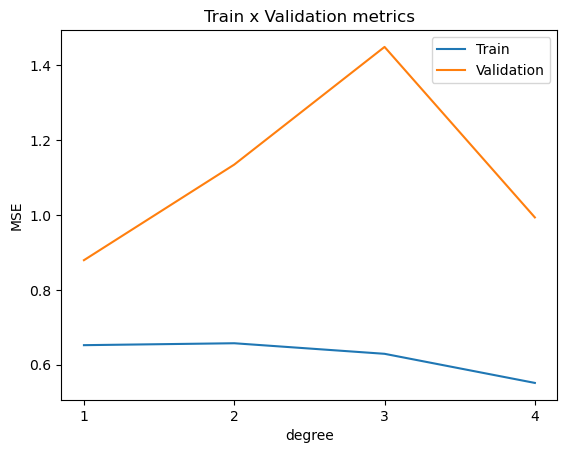

In [203]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = RandomForestRegressor(n_estimators = 5,
                                  max_depth = 16,
                                  min_samples_split = 10).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [204]:
MSE_list_val

[0.8792125637038429, 1.134439794531053, 1.4485991168879178, 0.9934009870186444]

In [205]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, train_size = 0.8, random_state = 123)

In [206]:
n = int(len(X_train)*0.8) ## Using 80% to train and 20% to eval

In [207]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [208]:
n_estimators_list = [10,50,100,500,1000,2000]

In [209]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = XGBRegressor(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

[0]	validation_0-rmse:5.24145
[1]	validation_0-rmse:4.07910
[2]	validation_0-rmse:3.31873
[3]	validation_0-rmse:2.84680
[4]	validation_0-rmse:2.53871
[5]	validation_0-rmse:2.36283
[6]	validation_0-rmse:2.26468
[7]	validation_0-rmse:2.21641
[8]	validation_0-rmse:2.19085
[9]	validation_0-rmse:2.16975
[0]	validation_0-rmse:5.24145
[1]	validation_0-rmse:4.07910
[2]	validation_0-rmse:3.31873
[3]	validation_0-rmse:2.84680
[4]	validation_0-rmse:2.53871
[5]	validation_0-rmse:2.36283
[6]	validation_0-rmse:2.26468
[7]	validation_0-rmse:2.21641
[8]	validation_0-rmse:2.19085
[9]	validation_0-rmse:2.16975
[10]	validation_0-rmse:2.16189
[11]	validation_0-rmse:2.15239
[12]	validation_0-rmse:2.14137
[13]	validation_0-rmse:2.14005
[14]	validation_0-rmse:2.13834
[15]	validation_0-rmse:2.13919
[16]	validation_0-rmse:2.14019
[17]	validation_0-rmse:2.13720
[18]	validation_0-rmse:2.13092
[19]	validation_0-rmse:2.13003
[20]	validation_0-rmse:2.12654
[21]	validation_0-rmse:2.12686
[22]	validation_0-rmse:2.128

[106]	validation_0-rmse:2.11556
[107]	validation_0-rmse:2.11547
[108]	validation_0-rmse:2.11539
[109]	validation_0-rmse:2.11536
[110]	validation_0-rmse:2.11534
[111]	validation_0-rmse:2.11553
[112]	validation_0-rmse:2.11549
[113]	validation_0-rmse:2.11552
[114]	validation_0-rmse:2.11548
[115]	validation_0-rmse:2.11551
[116]	validation_0-rmse:2.11564
[117]	validation_0-rmse:2.11566
[118]	validation_0-rmse:2.11567
[119]	validation_0-rmse:2.11564
[120]	validation_0-rmse:2.11557
[121]	validation_0-rmse:2.11559
[122]	validation_0-rmse:2.11556
[123]	validation_0-rmse:2.11558
[124]	validation_0-rmse:2.11566
[125]	validation_0-rmse:2.11558
[126]	validation_0-rmse:2.11572
[127]	validation_0-rmse:2.11566
[128]	validation_0-rmse:2.11559
[129]	validation_0-rmse:2.11560
[130]	validation_0-rmse:2.11549
[131]	validation_0-rmse:2.11546
[132]	validation_0-rmse:2.11545
[133]	validation_0-rmse:2.11537
[134]	validation_0-rmse:2.11535
[135]	validation_0-rmse:2.11538
[136]	validation_0-rmse:2.11519
[137]	va

[363]	validation_0-rmse:2.11483
[364]	validation_0-rmse:2.11483
[365]	validation_0-rmse:2.11483
[366]	validation_0-rmse:2.11483
[367]	validation_0-rmse:2.11483
[368]	validation_0-rmse:2.11483
[369]	validation_0-rmse:2.11483
[370]	validation_0-rmse:2.11483
[371]	validation_0-rmse:2.11483
[372]	validation_0-rmse:2.11483
[373]	validation_0-rmse:2.11483
[374]	validation_0-rmse:2.11483
[375]	validation_0-rmse:2.11483
[376]	validation_0-rmse:2.11483
[377]	validation_0-rmse:2.11483
[378]	validation_0-rmse:2.11483
[379]	validation_0-rmse:2.11483
[380]	validation_0-rmse:2.11483
[381]	validation_0-rmse:2.11483
[382]	validation_0-rmse:2.11483
[383]	validation_0-rmse:2.11483
[384]	validation_0-rmse:2.11483
[385]	validation_0-rmse:2.11483
[386]	validation_0-rmse:2.11483
[387]	validation_0-rmse:2.11483
[388]	validation_0-rmse:2.11483
[389]	validation_0-rmse:2.11483
[390]	validation_0-rmse:2.11483
[391]	validation_0-rmse:2.11483
[392]	validation_0-rmse:2.11483
[393]	validation_0-rmse:2.11483
[394]	va

[123]	validation_0-rmse:2.11558
[124]	validation_0-rmse:2.11566
[125]	validation_0-rmse:2.11558
[126]	validation_0-rmse:2.11572
[127]	validation_0-rmse:2.11566
[128]	validation_0-rmse:2.11559
[129]	validation_0-rmse:2.11560
[130]	validation_0-rmse:2.11549
[131]	validation_0-rmse:2.11546
[132]	validation_0-rmse:2.11545
[133]	validation_0-rmse:2.11537
[134]	validation_0-rmse:2.11535
[135]	validation_0-rmse:2.11538
[136]	validation_0-rmse:2.11519
[137]	validation_0-rmse:2.11521
[138]	validation_0-rmse:2.11520
[139]	validation_0-rmse:2.11517
[140]	validation_0-rmse:2.11520
[141]	validation_0-rmse:2.11516
[142]	validation_0-rmse:2.11515
[143]	validation_0-rmse:2.11515
[144]	validation_0-rmse:2.11513
[145]	validation_0-rmse:2.11508
[146]	validation_0-rmse:2.11503
[147]	validation_0-rmse:2.11503
[148]	validation_0-rmse:2.11501
[149]	validation_0-rmse:2.11496
[150]	validation_0-rmse:2.11493
[151]	validation_0-rmse:2.11486
[152]	validation_0-rmse:2.11491
[153]	validation_0-rmse:2.11492
[154]	va

[380]	validation_0-rmse:2.11483
[381]	validation_0-rmse:2.11483
[382]	validation_0-rmse:2.11483
[383]	validation_0-rmse:2.11483
[384]	validation_0-rmse:2.11483
[385]	validation_0-rmse:2.11483
[386]	validation_0-rmse:2.11483
[387]	validation_0-rmse:2.11483
[388]	validation_0-rmse:2.11483
[389]	validation_0-rmse:2.11483
[390]	validation_0-rmse:2.11483
[391]	validation_0-rmse:2.11483
[392]	validation_0-rmse:2.11483
[393]	validation_0-rmse:2.11483
[394]	validation_0-rmse:2.11483
[395]	validation_0-rmse:2.11483
[396]	validation_0-rmse:2.11483
[397]	validation_0-rmse:2.11483
[398]	validation_0-rmse:2.11483
[399]	validation_0-rmse:2.11483
[400]	validation_0-rmse:2.11483
[401]	validation_0-rmse:2.11483
[402]	validation_0-rmse:2.11483
[403]	validation_0-rmse:2.11483
[404]	validation_0-rmse:2.11483
[405]	validation_0-rmse:2.11483
[406]	validation_0-rmse:2.11483
[407]	validation_0-rmse:2.11483
[408]	validation_0-rmse:2.11483
[409]	validation_0-rmse:2.11483
[410]	validation_0-rmse:2.11483
[411]	va

[637]	validation_0-rmse:2.11483
[638]	validation_0-rmse:2.11483
[639]	validation_0-rmse:2.11483
[640]	validation_0-rmse:2.11483
[641]	validation_0-rmse:2.11483
[642]	validation_0-rmse:2.11483
[643]	validation_0-rmse:2.11483
[644]	validation_0-rmse:2.11483
[645]	validation_0-rmse:2.11483
[646]	validation_0-rmse:2.11483
[647]	validation_0-rmse:2.11483
[648]	validation_0-rmse:2.11483
[649]	validation_0-rmse:2.11483
[650]	validation_0-rmse:2.11483
[651]	validation_0-rmse:2.11483
[652]	validation_0-rmse:2.11483
[653]	validation_0-rmse:2.11483
[654]	validation_0-rmse:2.11483
[655]	validation_0-rmse:2.11483
[656]	validation_0-rmse:2.11483
[657]	validation_0-rmse:2.11483
[658]	validation_0-rmse:2.11483
[659]	validation_0-rmse:2.11483
[660]	validation_0-rmse:2.11483
[661]	validation_0-rmse:2.11483
[662]	validation_0-rmse:2.11483
[663]	validation_0-rmse:2.11483
[664]	validation_0-rmse:2.11483
[665]	validation_0-rmse:2.11483
[666]	validation_0-rmse:2.11483
[667]	validation_0-rmse:2.11483
[668]	va

[894]	validation_0-rmse:2.11483
[895]	validation_0-rmse:2.11483
[896]	validation_0-rmse:2.11483
[897]	validation_0-rmse:2.11483
[898]	validation_0-rmse:2.11483
[899]	validation_0-rmse:2.11483
[900]	validation_0-rmse:2.11483
[901]	validation_0-rmse:2.11483
[902]	validation_0-rmse:2.11483
[903]	validation_0-rmse:2.11483
[904]	validation_0-rmse:2.11483
[905]	validation_0-rmse:2.11483
[906]	validation_0-rmse:2.11483
[907]	validation_0-rmse:2.11483
[908]	validation_0-rmse:2.11483
[909]	validation_0-rmse:2.11483
[910]	validation_0-rmse:2.11483
[911]	validation_0-rmse:2.11483
[912]	validation_0-rmse:2.11483
[913]	validation_0-rmse:2.11483
[914]	validation_0-rmse:2.11483
[915]	validation_0-rmse:2.11483
[916]	validation_0-rmse:2.11483
[917]	validation_0-rmse:2.11483
[918]	validation_0-rmse:2.11483
[919]	validation_0-rmse:2.11483
[920]	validation_0-rmse:2.11483
[921]	validation_0-rmse:2.11483
[922]	validation_0-rmse:2.11483
[923]	validation_0-rmse:2.11483
[924]	validation_0-rmse:2.11483
[925]	va

[154]	validation_0-rmse:2.11493
[155]	validation_0-rmse:2.11490
[156]	validation_0-rmse:2.11491
[157]	validation_0-rmse:2.11488
[158]	validation_0-rmse:2.11489
[159]	validation_0-rmse:2.11489
[160]	validation_0-rmse:2.11486
[161]	validation_0-rmse:2.11485
[162]	validation_0-rmse:2.11486
[163]	validation_0-rmse:2.11485
[164]	validation_0-rmse:2.11482
[165]	validation_0-rmse:2.11482
[166]	validation_0-rmse:2.11483
[167]	validation_0-rmse:2.11482
[168]	validation_0-rmse:2.11482
[169]	validation_0-rmse:2.11484
[170]	validation_0-rmse:2.11484
[171]	validation_0-rmse:2.11485
[172]	validation_0-rmse:2.11488
[173]	validation_0-rmse:2.11487
[174]	validation_0-rmse:2.11485
[175]	validation_0-rmse:2.11486
[176]	validation_0-rmse:2.11488
[177]	validation_0-rmse:2.11488
[178]	validation_0-rmse:2.11486
[179]	validation_0-rmse:2.11486
[180]	validation_0-rmse:2.11485
[181]	validation_0-rmse:2.11483
[182]	validation_0-rmse:2.11483
[183]	validation_0-rmse:2.11483
[184]	validation_0-rmse:2.11484
[185]	va

[411]	validation_0-rmse:2.11483
[412]	validation_0-rmse:2.11483
[413]	validation_0-rmse:2.11483
[414]	validation_0-rmse:2.11483
[415]	validation_0-rmse:2.11483
[416]	validation_0-rmse:2.11483
[417]	validation_0-rmse:2.11483
[418]	validation_0-rmse:2.11483
[419]	validation_0-rmse:2.11483
[420]	validation_0-rmse:2.11483
[421]	validation_0-rmse:2.11483
[422]	validation_0-rmse:2.11483
[423]	validation_0-rmse:2.11483
[424]	validation_0-rmse:2.11483
[425]	validation_0-rmse:2.11483
[426]	validation_0-rmse:2.11483
[427]	validation_0-rmse:2.11483
[428]	validation_0-rmse:2.11483
[429]	validation_0-rmse:2.11483
[430]	validation_0-rmse:2.11483
[431]	validation_0-rmse:2.11483
[432]	validation_0-rmse:2.11483
[433]	validation_0-rmse:2.11483
[434]	validation_0-rmse:2.11483
[435]	validation_0-rmse:2.11483
[436]	validation_0-rmse:2.11483
[437]	validation_0-rmse:2.11483
[438]	validation_0-rmse:2.11483
[439]	validation_0-rmse:2.11483
[440]	validation_0-rmse:2.11483
[441]	validation_0-rmse:2.11483
[442]	va

[668]	validation_0-rmse:2.11483
[669]	validation_0-rmse:2.11483
[670]	validation_0-rmse:2.11483
[671]	validation_0-rmse:2.11483
[672]	validation_0-rmse:2.11483
[673]	validation_0-rmse:2.11483
[674]	validation_0-rmse:2.11483
[675]	validation_0-rmse:2.11483
[676]	validation_0-rmse:2.11483
[677]	validation_0-rmse:2.11483
[678]	validation_0-rmse:2.11483
[679]	validation_0-rmse:2.11483
[680]	validation_0-rmse:2.11483
[681]	validation_0-rmse:2.11483
[682]	validation_0-rmse:2.11483
[683]	validation_0-rmse:2.11483
[684]	validation_0-rmse:2.11483
[685]	validation_0-rmse:2.11483
[686]	validation_0-rmse:2.11483
[687]	validation_0-rmse:2.11483
[688]	validation_0-rmse:2.11483
[689]	validation_0-rmse:2.11483
[690]	validation_0-rmse:2.11483
[691]	validation_0-rmse:2.11483
[692]	validation_0-rmse:2.11483
[693]	validation_0-rmse:2.11483
[694]	validation_0-rmse:2.11483
[695]	validation_0-rmse:2.11483
[696]	validation_0-rmse:2.11483
[697]	validation_0-rmse:2.11483
[698]	validation_0-rmse:2.11483
[699]	va

[925]	validation_0-rmse:2.11483
[926]	validation_0-rmse:2.11483
[927]	validation_0-rmse:2.11483
[928]	validation_0-rmse:2.11483
[929]	validation_0-rmse:2.11483
[930]	validation_0-rmse:2.11483
[931]	validation_0-rmse:2.11483
[932]	validation_0-rmse:2.11483
[933]	validation_0-rmse:2.11483
[934]	validation_0-rmse:2.11483
[935]	validation_0-rmse:2.11483
[936]	validation_0-rmse:2.11483
[937]	validation_0-rmse:2.11483
[938]	validation_0-rmse:2.11483
[939]	validation_0-rmse:2.11483
[940]	validation_0-rmse:2.11483
[941]	validation_0-rmse:2.11483
[942]	validation_0-rmse:2.11483
[943]	validation_0-rmse:2.11483
[944]	validation_0-rmse:2.11483
[945]	validation_0-rmse:2.11483
[946]	validation_0-rmse:2.11483
[947]	validation_0-rmse:2.11483
[948]	validation_0-rmse:2.11483
[949]	validation_0-rmse:2.11483
[950]	validation_0-rmse:2.11483
[951]	validation_0-rmse:2.11483
[952]	validation_0-rmse:2.11483
[953]	validation_0-rmse:2.11483
[954]	validation_0-rmse:2.11483
[955]	validation_0-rmse:2.11483
[956]	va

[1176]	validation_0-rmse:2.11483
[1177]	validation_0-rmse:2.11483
[1178]	validation_0-rmse:2.11483
[1179]	validation_0-rmse:2.11483
[1180]	validation_0-rmse:2.11483
[1181]	validation_0-rmse:2.11483
[1182]	validation_0-rmse:2.11483
[1183]	validation_0-rmse:2.11483
[1184]	validation_0-rmse:2.11483
[1185]	validation_0-rmse:2.11483
[1186]	validation_0-rmse:2.11483
[1187]	validation_0-rmse:2.11483
[1188]	validation_0-rmse:2.11483
[1189]	validation_0-rmse:2.11483
[1190]	validation_0-rmse:2.11483
[1191]	validation_0-rmse:2.11483
[1192]	validation_0-rmse:2.11483
[1193]	validation_0-rmse:2.11483
[1194]	validation_0-rmse:2.11483
[1195]	validation_0-rmse:2.11483
[1196]	validation_0-rmse:2.11483
[1197]	validation_0-rmse:2.11483
[1198]	validation_0-rmse:2.11483
[1199]	validation_0-rmse:2.11483
[1200]	validation_0-rmse:2.11483
[1201]	validation_0-rmse:2.11483
[1202]	validation_0-rmse:2.11483
[1203]	validation_0-rmse:2.11483
[1204]	validation_0-rmse:2.11483
[1205]	validation_0-rmse:2.11483
[1206]	val

[1425]	validation_0-rmse:2.11483
[1426]	validation_0-rmse:2.11483
[1427]	validation_0-rmse:2.11483
[1428]	validation_0-rmse:2.11483
[1429]	validation_0-rmse:2.11483
[1430]	validation_0-rmse:2.11483
[1431]	validation_0-rmse:2.11483
[1432]	validation_0-rmse:2.11483
[1433]	validation_0-rmse:2.11483
[1434]	validation_0-rmse:2.11483
[1435]	validation_0-rmse:2.11483
[1436]	validation_0-rmse:2.11483
[1437]	validation_0-rmse:2.11483
[1438]	validation_0-rmse:2.11483
[1439]	validation_0-rmse:2.11483
[1440]	validation_0-rmse:2.11483
[1441]	validation_0-rmse:2.11483
[1442]	validation_0-rmse:2.11483
[1443]	validation_0-rmse:2.11483
[1444]	validation_0-rmse:2.11483
[1445]	validation_0-rmse:2.11483
[1446]	validation_0-rmse:2.11483
[1447]	validation_0-rmse:2.11483
[1448]	validation_0-rmse:2.11483
[1449]	validation_0-rmse:2.11483
[1450]	validation_0-rmse:2.11483
[1451]	validation_0-rmse:2.11483
[1452]	validation_0-rmse:2.11483
[1453]	validation_0-rmse:2.11483
[1454]	validation_0-rmse:2.11483
[1455]	val

[1674]	validation_0-rmse:2.11483
[1675]	validation_0-rmse:2.11483
[1676]	validation_0-rmse:2.11483
[1677]	validation_0-rmse:2.11483
[1678]	validation_0-rmse:2.11483
[1679]	validation_0-rmse:2.11483
[1680]	validation_0-rmse:2.11483
[1681]	validation_0-rmse:2.11483
[1682]	validation_0-rmse:2.11483
[1683]	validation_0-rmse:2.11483
[1684]	validation_0-rmse:2.11483
[1685]	validation_0-rmse:2.11483
[1686]	validation_0-rmse:2.11483
[1687]	validation_0-rmse:2.11483
[1688]	validation_0-rmse:2.11483
[1689]	validation_0-rmse:2.11483
[1690]	validation_0-rmse:2.11483
[1691]	validation_0-rmse:2.11483
[1692]	validation_0-rmse:2.11483
[1693]	validation_0-rmse:2.11483
[1694]	validation_0-rmse:2.11483
[1695]	validation_0-rmse:2.11483
[1696]	validation_0-rmse:2.11483
[1697]	validation_0-rmse:2.11483
[1698]	validation_0-rmse:2.11483
[1699]	validation_0-rmse:2.11483
[1700]	validation_0-rmse:2.11483
[1701]	validation_0-rmse:2.11483
[1702]	validation_0-rmse:2.11483
[1703]	validation_0-rmse:2.11483
[1704]	val

[1923]	validation_0-rmse:2.11483
[1924]	validation_0-rmse:2.11483
[1925]	validation_0-rmse:2.11483
[1926]	validation_0-rmse:2.11483
[1927]	validation_0-rmse:2.11483
[1928]	validation_0-rmse:2.11483
[1929]	validation_0-rmse:2.11483
[1930]	validation_0-rmse:2.11483
[1931]	validation_0-rmse:2.11483
[1932]	validation_0-rmse:2.11483
[1933]	validation_0-rmse:2.11483
[1934]	validation_0-rmse:2.11483
[1935]	validation_0-rmse:2.11483
[1936]	validation_0-rmse:2.11483
[1937]	validation_0-rmse:2.11483
[1938]	validation_0-rmse:2.11483
[1939]	validation_0-rmse:2.11483
[1940]	validation_0-rmse:2.11483
[1941]	validation_0-rmse:2.11483
[1942]	validation_0-rmse:2.11483
[1943]	validation_0-rmse:2.11483
[1944]	validation_0-rmse:2.11483
[1945]	validation_0-rmse:2.11483
[1946]	validation_0-rmse:2.11483
[1947]	validation_0-rmse:2.11483
[1948]	validation_0-rmse:2.11483
[1949]	validation_0-rmse:2.11483
[1950]	validation_0-rmse:2.11483
[1951]	validation_0-rmse:2.11483
[1952]	validation_0-rmse:2.11483
[1953]	val

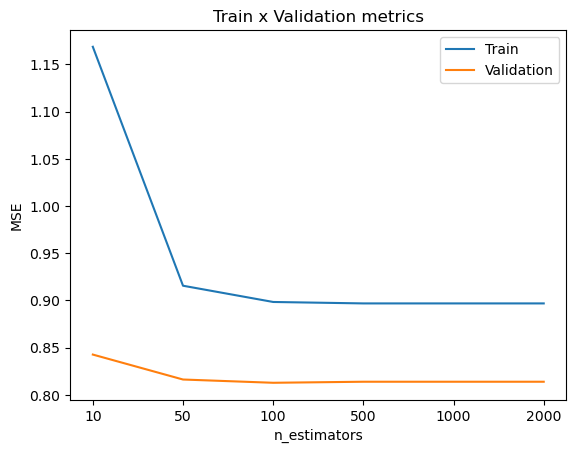

In [210]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [211]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

2

In [212]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

100

In [213]:
xgb_do_model = XGBRegressor(n_estimators = 100, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_do_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:6.40482
[1]	validation_0-rmse:5.87084
[2]	validation_0-rmse:5.39664
[3]	validation_0-rmse:4.97867
[4]	validation_0-rmse:4.60932
[5]	validation_0-rmse:4.28628
[6]	validation_0-rmse:3.99766
[7]	validation_0-rmse:3.74451
[8]	validation_0-rmse:3.52575
[9]	validation_0-rmse:3.33103
[10]	validation_0-rmse:3.16447
[11]	validation_0-rmse:3.01772
[12]	validation_0-rmse:2.89893
[13]	validation_0-rmse:2.79410
[14]	validation_0-rmse:2.69861
[15]	validation_0-rmse:2.62133
[16]	validation_0-rmse:2.55721
[17]	validation_0-rmse:2.50229
[18]	validation_0-rmse:2.44676
[19]	validation_0-rmse:2.40458
[20]	validation_0-rmse:2.36679
[21]	validation_0-rmse:2.33621
[22]	validation_0-rmse:2.31239
[23]	validation_0-rmse:2.29027
[24]	validation_0-rmse:2.27092
[25]	validation_0-rmse:2.25252
[26]	validation_0-rmse:2.24268
[27]	validation_0-rmse:2.23122
[28]	validation_0-rmse:2.21882
[29]	validation_0-rmse:2.20414
[30]	validation_0-rmse:2.19217
[31]	validation_0-rmse:2.18318
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [214]:
xgb_do_model.best_iteration

99

In [215]:
print(f"MSE for train:\n\tMSE: {MSE(xgb_do_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(xgb_do_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.9483
MSE for validation:
	MSE: 0.7075


In [216]:
y_pred_do = xgb_do_model.predict(X_val)

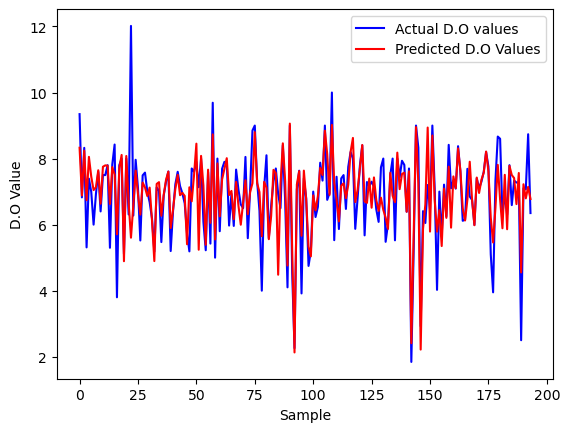

In [217]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O values')
plt.plot(range(len(y_pred_do)),y_pred_do,'r',label='Predicted D.O Values')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('D.O Value');

In [218]:
diff_do = y_pred_do - y_val

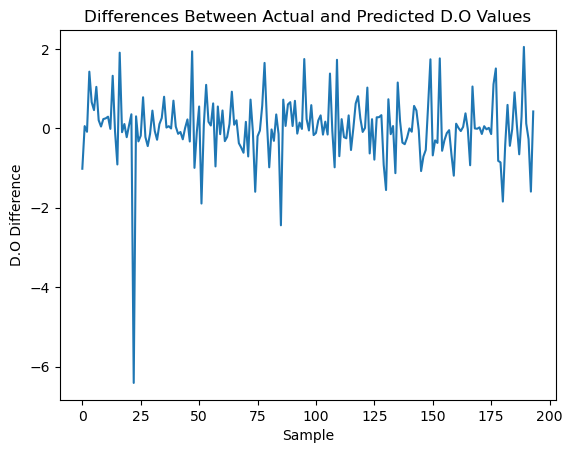

In [219]:
plt.plot(range(len(diff_do)),diff_do)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('D.O Difference');

In [220]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(X_train)
Xn = norm(X_train)

In [335]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 2s 2ms/step - loss: 18.4434
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 4.0935
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.0069
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.6524
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4277
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2916
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2227
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2222
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1977
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1987
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1494
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1217
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7744
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7459
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7389
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7728
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7334
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1402
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8606
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8794
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8041
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7981
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7746
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8724
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.6343
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5507
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5958
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6577
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5830
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5712
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5519
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5580
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4724
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5980
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4789
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5318
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3580
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3708
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4704
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4116
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4431
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3425
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4722
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4166
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3781
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4484
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4301
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3884
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4188
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3880
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3929
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4406
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5000
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3995
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4187
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4699
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4344
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3622
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4261
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3634
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2628
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3220
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3470
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4206
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3764
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3244
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3321
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3479
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2955
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4183
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4245
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3553
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3975
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3069
Epoch 593/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3351
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2938
Epoch 595/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2811
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2778
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3575
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3305
Epoch 599/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3378
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3232
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4021
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4149
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3560
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4206
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3273
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2595
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3255
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3264
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2486
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3511
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2966
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3643
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5441
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3542
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.2395
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1920
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3035
Epoch 790/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3215
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2856
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2303
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3644
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3067
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2765
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2825
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2564
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2707
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3495
Epoch 886/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3872
Epoch 887/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3765
Epoch 888/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3538
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3143
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3587
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3377
Epoch 892/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3232
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3418
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3793
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4103
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4415
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3476
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2761
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2982
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3144
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2961
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3501
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3292
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3302
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2892
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6620
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5378
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5920
Epoch 995/1000
25/2

In [336]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [337]:
MSE_pred

[1.4807358402329873]

In [338]:
MSE_pred

[1.4807358402329873]

In [339]:
MSE_train

[1.0805896217359312]

In [340]:
MSE_train

[1.0805896217359312]

In [341]:
yhat_pred

array([[ 8.81147  ],
       [ 6.949831 ],
       [ 7.071993 ],
       [ 7.542924 ],
       [ 7.3815966],
       [ 7.253995 ],
       [ 7.6926723],
       [ 6.777794 ],
       [ 6.8172345],
       [ 6.1481442],
       [ 7.098802 ],
       [ 6.296219 ],
       [ 7.1733794],
       [ 7.438077 ],
       [ 7.679095 ],
       [ 7.522128 ],
       [ 4.7368755],
       [ 6.0130053],
       [ 8.30029  ],
       [ 5.2017374],
       [ 8.0455   ],
       [ 6.479439 ],
       [10.347187 ],
       [ 6.497565 ],
       [ 7.81423  ],
       [ 6.8384614],
       [ 6.3593917],
       [ 7.1269674],
       [ 7.3818083],
       [ 6.683349 ],
       [ 6.5670285],
       [ 5.8467045],
       [ 5.769397 ],
       [ 6.997898 ],
       [ 7.1759634],
       [ 7.0946074],
       [ 7.2215333],
       [ 7.8734875],
       [ 7.031216 ],
       [ 5.4994802],
       [ 6.333023 ],
       [ 7.353328 ],
       [ 7.062984 ],
       [ 7.44746  ],
       [ 6.7727823],
       [ 6.8912563],
       [ 6.5234184],
       [ 7.58

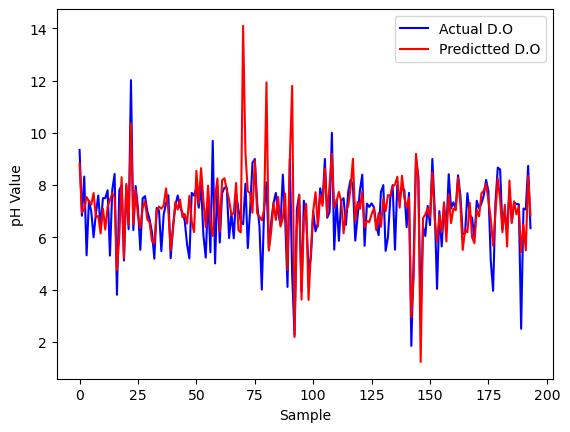

In [342]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted D.O')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [343]:
diff_pH = yhat_pred.flatten() - y_val

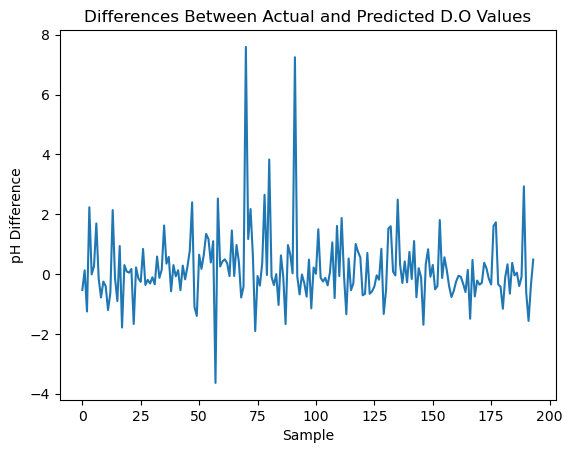

In [344]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [345]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 22.0939
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 4.2627
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.8979
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.6222
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4537
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3760
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3452
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2007
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2690
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1967
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1303
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1518
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8721
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8530
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8832
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8654
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8168
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8534
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8506
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9661
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8296
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8273
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9980
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8794
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.7017
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9490
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7464
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7378
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7574
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7421
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7239
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7856
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7930
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7894
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7192
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7634
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.6882
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7320
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6664
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7214
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6914
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6441
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6367
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6141
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6614
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6471
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6314
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6842
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.5193
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5506
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5257
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4911
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6110
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5526
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5312
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5318
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5057
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4981
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5496
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5212
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.7009
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5076
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5780
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5170
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4929
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6335
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5354
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4940
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4722
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4828
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4940
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4833
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.6093
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7767
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8929
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6802
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5793
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5762
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6378
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5696
Epoch 599/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6192
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5488
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5943
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5443
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4378
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4744
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3904
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4357
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4124
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4286
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4643
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4321
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4585
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4006
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4904
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4667
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4935
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5349
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5936
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5192
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5639
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4952
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5053
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5104
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5173
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6975
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6974
Epoch 798/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5794
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4972
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4823
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5490
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4966
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4701
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4892
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4731
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4325
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4810
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5772
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4975
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4686
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4586
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4165
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4184
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4774
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4266
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4477
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4314
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5166
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4507
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4494
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4842
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4755
Epoch 995/1000
25/2

In [346]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [347]:
MSE_pred

[1.3776593225875127]

In [348]:
MSE_pred

[1.3776593225875127]

In [349]:
MSE_train

[1.3119469404997532]

In [350]:
MSE_train

[1.3119469404997532]

In [351]:
yhat_pred

array([[ 8.830455 ],
       [ 7.2245765],
       [ 7.730573 ],
       [ 8.161044 ],
       [ 8.030966 ],
       [ 7.4748435],
       [ 7.6329865],
       [ 7.045313 ],
       [ 8.777788 ],
       [ 6.393694 ],
       [ 7.3354096],
       [ 6.522974 ],
       [ 6.4654174],
       [ 7.877694 ],
       [ 7.7202115],
       [ 7.6941724],
       [ 3.6248312],
       [ 7.7814727],
       [ 7.316867 ],
       [ 4.694011 ],
       [ 7.1378574],
       [ 6.980557 ],
       [ 9.013819 ],
       [ 6.5049963],
       [ 8.50873  ],
       [ 6.1612754],
       [ 7.915726 ],
       [ 7.708958 ],
       [ 7.0481906],
       [ 6.632579 ],
       [ 6.8583436],
       [ 6.5177627],
       [ 5.9032483],
       [ 7.1329455],
       [ 7.241546 ],
       [ 7.5185733],
       [ 6.7215457],
       [ 7.4992905],
       [ 7.9340963],
       [ 4.7462716],
       [ 6.710422 ],
       [ 7.160015 ],
       [ 7.581236 ],
       [ 7.2222624],
       [ 6.6100073],
       [ 7.6487007],
       [ 7.170675 ],
       [ 8.11

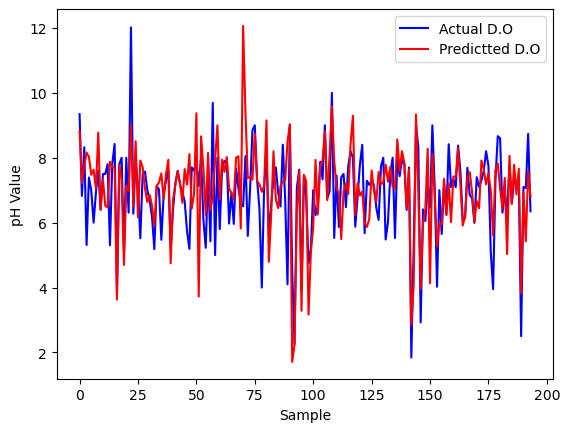

In [352]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted D.O')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [353]:
diff_pH = yhat_pred.flatten() - y_val

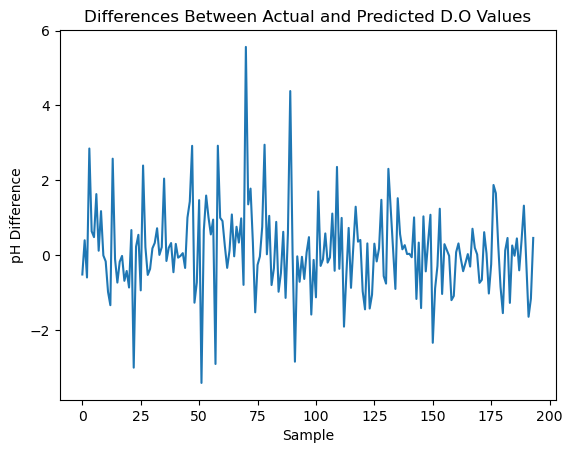

In [354]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [365]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 19.0203
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.8983
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.8636
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5334
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3409
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3211
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3442
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3178
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2036
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.1570
Epoch 11/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4299
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2960
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8236
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9124
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7926
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8352
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8547
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9483
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8239
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7680
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8991
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8950
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8595
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9576
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 1.6489
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5795
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5698
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5451
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6308
Epoch 204/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6569
Epoch 205/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6300
Epoch 206/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5681
Epoch 207/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6208
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6362
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5462
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4930
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4764
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4549
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5372
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5309
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5068
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5137
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5785
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5540
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4916
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4959
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4865
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5722
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4081
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3625
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3535
Epoch 398/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.4472
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8654
Epoch 400/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5934
Epoch 401/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4452
Epoch 402/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4285
Epoch 403/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4062
Epoch 404/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3932
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4480
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4824
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3448
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3398
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3442
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3156
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2901
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4819
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4926
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5732
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6454
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4768
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4928
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4926
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 592/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2160
Epoch 593/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2334
Epoch 594/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2545
Epoch 595/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1912
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2268
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2459
Epoch 598/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3204
Epoch 599/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3941
Epoch 600/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3540
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3256
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4569
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3122
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5166
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3886
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3469
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2929
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2744
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1972
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3308
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3094
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1705
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1158
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1840
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.1967
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1399
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2346
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0934
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0705
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1758
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2235
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2635
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1751
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2024
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1162
Epoch 799/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 1.5434
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5232
Epoch 887/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5223
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4933
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4604
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4981
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4993
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4389
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4300
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4869
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4477
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5350
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3621
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3016
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2699
Epoch 986/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2523
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3707
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5127
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3883
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3327
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2854
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3435
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4299
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3104
Epoch 995/1000
25/2

In [366]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [367]:
MSE_pred

[1.2559521116163468]

In [368]:
MSE_pred

[1.2559521116163468]

In [369]:
MSE_train

[1.1900664546475805]

In [370]:
MSE_train

[1.1900664546475805]

In [371]:
yhat_pred

array([[ 9.263922 ],
       [ 6.3762913],
       [ 6.5243835],
       [ 7.2422285],
       [ 6.206253 ],
       [ 7.10635  ],
       [ 7.3459396],
       [ 7.5313277],
       [ 6.9232497],
       [ 5.4433637],
       [ 7.3781533],
       [ 6.434934 ],
       [ 7.4140167],
       [ 7.273223 ],
       [ 7.6082854],
       [ 6.928027 ],
       [ 6.1902246],
       [ 6.639121 ],
       [ 8.536352 ],
       [ 6.5376916],
       [ 8.429182 ],
       [ 7.1615047],
       [ 9.931698 ],
       [ 6.5149746],
       [ 8.570241 ],
       [ 8.214216 ],
       [ 6.3719788],
       [ 6.940094 ],
       [ 7.1018248],
       [ 7.679232 ],
       [ 7.1165276],
       [ 5.949477 ],
       [ 6.1204   ],
       [ 7.690073 ],
       [ 7.37764  ],
       [ 6.733186 ],
       [ 6.846364 ],
       [ 7.5850735],
       [ 6.678383 ],
       [ 5.8475842],
       [ 6.632887 ],
       [ 7.504291 ],
       [ 6.912567 ],
       [ 7.731391 ],
       [ 6.9002504],
       [ 6.486408 ],
       [ 6.830605 ],
       [ 7.64

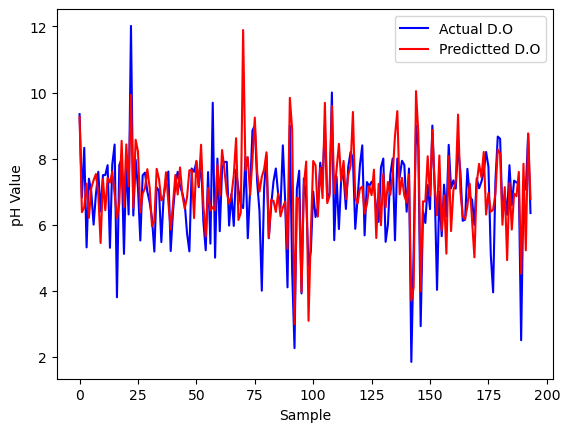

In [372]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted D.O')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [373]:
diff_pH = yhat_pred.flatten() - y_val

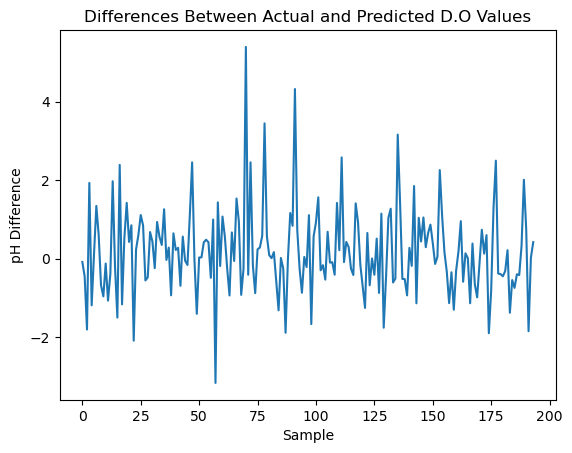

In [374]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [375]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 16.1430
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.8726
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.8357
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.6046
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5038
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3372
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3358
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2670
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1798
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2482
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4324
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3162
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6905
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6944
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8162
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7480
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8546
Epoch 106/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7126
Epoch 107/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7462
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7503
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6814
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6612
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6121
Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6987
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.4624
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4975
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5672
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5232
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4868
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5281
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5963
Epoch 206/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7009
Epoch 207/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5783
Epoch 208/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6193
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5760
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5518
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.5212
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4617
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4018
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4958
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5318
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3994
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4149
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3930
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4648
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4610
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4766
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5338
Epoch 309/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3361
Epoch 396/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3115
Epoch 397/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3625
Epoch 398/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3986
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3346
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3671
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2338
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6702
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5500
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5212
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5011
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5030
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4371
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3747
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3643
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3499
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3896
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3486
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4128
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3559
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3319
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3472
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3612
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3331
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3536
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3753
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3840
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3477
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3463
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3073
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3799
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3595
Epoch 599/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4638
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3575
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3255
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2989
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3544
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3641
Epoch 691/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2865
Epoch 692/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2976
Epoch 693/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3011
Epoch 694/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2905
Epoch 695/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3566
Epoch 696/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5405
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3833
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3223
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3140
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3234
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3581
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2682
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2944
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3296
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4633
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3594
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2946
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3153
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2459
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3163
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2943
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3201
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2610
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2733
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3721
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3069
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3850
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3058
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3558
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3312
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3460
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2634
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2703
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2310
Epoch 897/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.2894
Epoch 984/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2972
Epoch 985/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2925
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3079
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2748
Epoch 988/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2525
Epoch 989/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2390
Epoch 990/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3083
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2244
Epoch 992/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2454
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2313
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5068
Epoch 995/1000
25/2

In [376]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [377]:
MSE_pred

[0.8962706017637371]

In [378]:
MSE_pred

[0.8962706017637371]

In [379]:
MSE_train

[0.9890136222123707]

In [380]:
MSE_train

[0.9890136222123707]

In [381]:
yhat_pred

array([[ 8.400053 ],
       [ 6.687175 ],
       [ 6.9344106],
       [ 7.628527 ],
       [ 7.03948  ],
       [ 7.0594068],
       [ 7.246424 ],
       [ 6.8508606],
       [ 7.688164 ],
       [ 6.7636123],
       [ 7.4293246],
       [ 5.7093773],
       [ 7.068057 ],
       [ 7.189167 ],
       [ 7.523666 ],
       [ 7.1180634],
       [ 3.1397328],
       [ 6.980712 ],
       [ 7.9829087],
       [ 5.2212453],
       [ 7.6904693],
       [ 6.750212 ],
       [12.496276 ],
       [ 6.0555053],
       [ 7.9584284],
       [ 6.534313 ],
       [ 5.9372845],
       [ 7.2865834],
       [ 7.284632 ],
       [ 6.5634575],
       [ 6.8816047],
       [ 6.2094603],
       [ 5.777592 ],
       [ 7.2459345],
       [ 7.354003 ],
       [ 7.359605 ],
       [ 7.0175276],
       [ 7.7304864],
       [ 7.3570356],
       [ 5.968211 ],
       [ 6.312065 ],
       [ 7.4842076],
       [ 7.1064143],
       [ 7.5572176],
       [ 6.349404 ],
       [ 6.955134 ],
       [ 6.5895176],
       [ 7.71

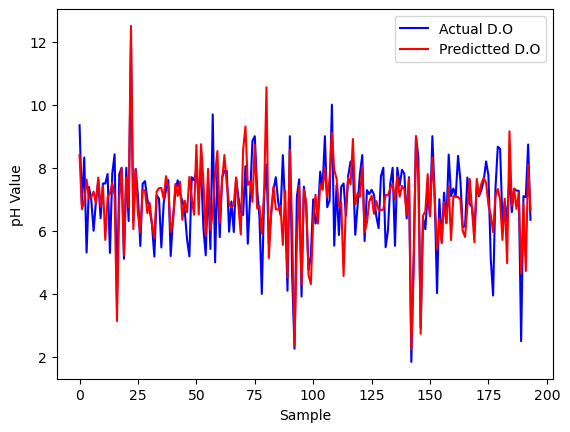

In [382]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted D.O')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [383]:
diff_pH = yhat_pred.flatten() - y_val

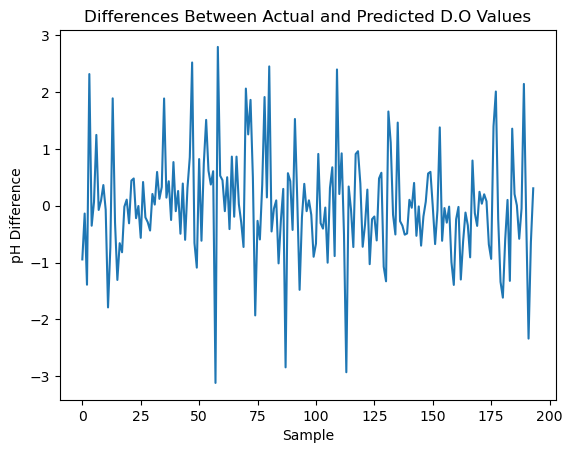

In [384]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [385]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 16.3521
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.4416
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.7124
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4474
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4206
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3958
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2904
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5845
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.7643
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4282
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2647
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2849
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8760
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9471
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8573
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7363
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7617
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8232
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8690
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8304
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7891
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9516
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8877
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8934
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.5537
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5639
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5352
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5610
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7355
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5794
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6164
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5402
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5416
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5673
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5354
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5134
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4700
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4077
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4384
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4397
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4041
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4311
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3441
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4504
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4384
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4811
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4589
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4326
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4820
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4373
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4218
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3620
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3428
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3796
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3643
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3673
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4148
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4624
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4066
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3692
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3551
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3275
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3166
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3257
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3362
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2703
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3647
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2981
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3647
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3825
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3223
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3205
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3277
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3410
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3705
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2962
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3791
Epoch 596/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.3564
Epoch 597/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2923
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3453
Epoch 599/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4745
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3984
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2904
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2872
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4769
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4564
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5380
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3954
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4264
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4570
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3942
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4263
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4050
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3671
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4028
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3722
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3550
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3558
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3702
Epoch 790/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4090
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3878
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4144
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3604
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3611
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3941
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4170
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3846
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3290
Epoch 799/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3618
Epoch 886/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4031
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3581
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3111
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3313
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3662
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3017
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3537
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2964
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2693
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3327
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3168
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4386
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3691
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4571
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3214
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4699
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4947
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4428
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3165
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3372
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3683
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3003
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2986
Epoch 995/1000
25/2

In [386]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 1ms/step


In [387]:
MSE_pred

[1.1850734405455228]

In [388]:
MSE_pred

[1.1850734405455228]

In [389]:
MSE_train

[1.1049557749087204]

In [390]:
MSE_train

[1.1049557749087204]

In [391]:
yhat_pred

array([[ 8.772274 ],
       [ 6.8020163],
       [ 6.544506 ],
       [ 7.213916 ],
       [ 7.4941607],
       [ 5.5230236],
       [ 7.2310476],
       [ 6.9627533],
       [ 7.245165 ],
       [ 5.5791063],
       [ 7.3949814],
       [ 7.6354837],
       [ 7.2274637],
       [ 6.5673904],
       [ 7.5311203],
       [ 7.0333643],
       [ 4.897705 ],
       [ 5.7272015],
       [ 8.061375 ],
       [ 4.2178006],
       [ 7.322837 ],
       [ 6.850424 ],
       [ 9.529231 ],
       [ 6.1479588],
       [ 7.846471 ],
       [ 7.1379747],
       [ 5.752508 ],
       [ 6.641567 ],
       [ 7.474062 ],
       [ 6.9408045],
       [ 6.0393105],
       [ 6.3318386],
       [ 5.6072397],
       [ 7.1573973],
       [ 7.170726 ],
       [ 6.803952 ],
       [ 7.094165 ],
       [ 7.4071016],
       [ 6.5792036],
       [ 5.6836185],
       [ 6.5953236],
       [ 6.9162827],
       [ 6.6970835],
       [ 7.0760717],
       [ 6.5417185],
       [ 7.085408 ],
       [ 5.717696 ],
       [ 7.40

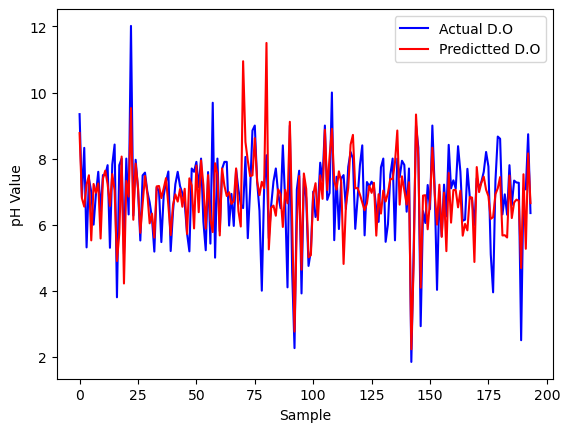

In [392]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted D.O')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [393]:
diff_pH = yhat_pred.flatten() - y_val

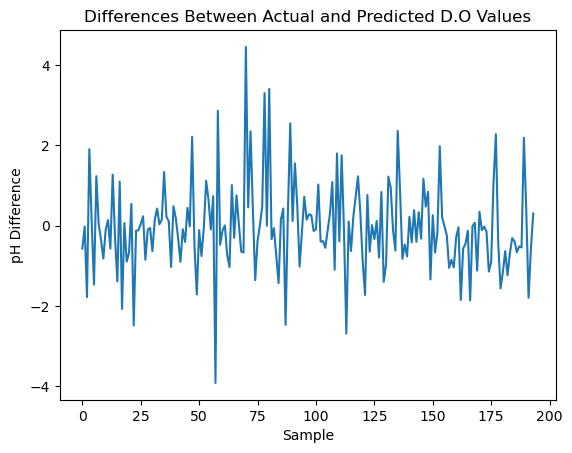

In [394]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [395]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 15.3304
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.9956
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.8511
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5217
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3733
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3157
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3529
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2202
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3410
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2513
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2761
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1998
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8481
Epoch 102/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8574
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.0159
Epoch 104/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.8358
Epoch 105/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8792
Epoch 106/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8064
Epoch 107/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8156
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8535
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8827
Epoch 110/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.8304
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7296
Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7952
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.6236
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6541
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8023
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7707
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5831
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5644
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5914
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5762
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5771
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6753
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6050
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5213
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.5562
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4878
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5803
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7576
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5099
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4562
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5045
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4707
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4357
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4514
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5020
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4848
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4765
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4544
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5697
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4838
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5406
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4259
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4825
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5066
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4044
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5572
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4539
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4227
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4702
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4353
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4785
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4216
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4755
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3898
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6280
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6594
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6832
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5951
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5227
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4010
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4042
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4632
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4521
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4982
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3880
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4785
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4753
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4476
Epoch 599/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5111
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4821
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4568
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4925
Epoch 603/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3974
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4820
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4417
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4089
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4028
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5744
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5825
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4700
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3883
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3797
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4971
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4721
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4010
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4341
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4412
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4254
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5072
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4115
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3863
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3908
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3680
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3615
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4311
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5191
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4032
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5029
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4039
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4090
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4186
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3853
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3663
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4166
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4303
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4993
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4443
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4613
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3730
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5412
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5686
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5125
Epoch 987/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5382
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4483
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4266
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5098
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4894
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3850
Epoch 993/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3758
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4845
Epoch 995/1000
25/2

In [396]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [397]:
MSE_pred

[1.2423584160686258]

In [398]:
MSE_pred

[1.2423584160686258]

In [399]:
MSE_train

[1.1798144236320423]

In [400]:
MSE_train

[1.1798144236320423]

In [401]:
yhat_pred

array([[ 8.471498 ],
       [ 7.113294 ],
       [ 7.011928 ],
       [ 7.2637424],
       [ 7.9035044],
       [ 6.3080378],
       [ 6.9864674],
       [ 6.838643 ],
       [ 7.7715993],
       [ 6.395971 ],
       [ 7.605639 ],
       [ 6.6465845],
       [ 7.423052 ],
       [ 7.1546116],
       [ 7.6399117],
       [ 7.5263233],
       [ 3.6113467],
       [ 7.952136 ],
       [ 7.941373 ],
       [ 4.18634  ],
       [ 7.940859 ],
       [ 6.688799 ],
       [ 9.824722 ],
       [ 6.0585456],
       [ 8.026164 ],
       [ 6.3825245],
       [ 7.0565386],
       [ 7.1703157],
       [ 7.0187387],
       [ 6.583042 ],
       [ 6.2436247],
       [ 6.5336547],
       [ 5.53907  ],
       [ 6.9631653],
       [ 6.830351 ],
       [ 7.2982445],
       [ 6.694049 ],
       [ 7.5612507],
       [ 7.1693134],
       [ 4.5388603],
       [ 6.2670164],
       [ 6.83852  ],
       [ 7.0273967],
       [ 6.948919 ],
       [ 6.1380067],
       [ 7.9280834],
       [ 6.5998936],
       [ 7.42

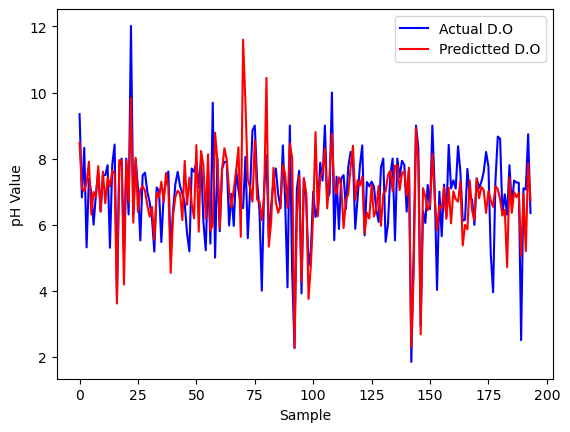

In [402]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted D.O')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [403]:
diff_pH = yhat_pred.flatten() - y_val

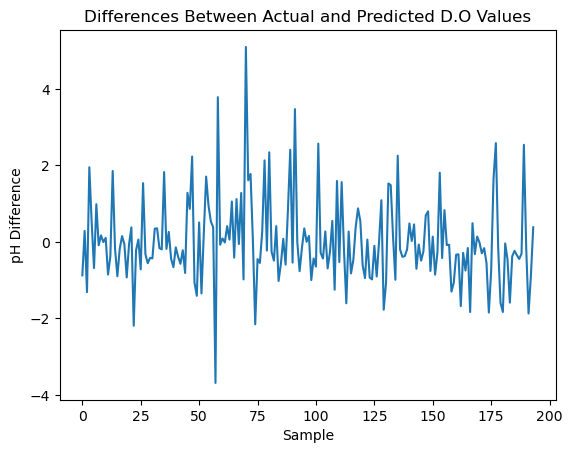

In [404]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [355]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 16.2451
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.7653
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.7729
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4586
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4544
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3242
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3087
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2495
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3392
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2050
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2869
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.0988
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8262
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9492
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8176
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3529
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9649
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8223
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7412
Epoch 108/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7528
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7714
Epoch 110/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8390
Epoch 111/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8573
Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8479
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.6454
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7412
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6876
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5575
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5654
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7188
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6256
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5989
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.9831
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6792
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6748
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5870
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4948
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4955
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4913
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4491
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4772
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4864
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5417
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5030
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5184
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5851
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5055
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4843
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4220
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4663
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3991
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4265
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4042
Epoch 400/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4101
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4220
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5689
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5564
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4877
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4730
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3902
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3472
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3739
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3426
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3832
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3469
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3362
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3545
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3843
Epoch 501/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3543
Epoch 502/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3175
Epoch 503/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3196
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3107
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3796
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3765
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3517
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3470
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3194
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2748
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3343
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3233
Epoch 599/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3040
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3323
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3078
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3082
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3138
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2853
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2805
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2726
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2883
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2822
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3412
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5515
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3460
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4922
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4099
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4500
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2734
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3263
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3266
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3116
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3492
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3342
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2708
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2762
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2823
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2872
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2393
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3004
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2387
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2240
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2766
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3228
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3046
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2267
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3175
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3076
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2403
Epoch 894/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2503
Epoch 895/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2642
Epoch 896/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2827
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.3998
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3424
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2879
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3112
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2474
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2405
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2479
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2276
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1993
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2207
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3095
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2793
Epoch 995/1000
25/2

In [356]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [357]:
MSE_pred

[1.109441332324623]

In [358]:
MSE_pred

[1.109441332324623]

In [359]:
MSE_train

[1.0599899455633532]

In [360]:
MSE_train

[1.0599899455633532]

In [361]:
yhat_pred

array([[ 8.66951  ],
       [ 6.6385503],
       [ 6.788517 ],
       [ 6.5429893],
       [ 7.149968 ],
       [ 5.9045973],
       [ 7.158002 ],
       [ 6.8838725],
       [ 7.637689 ],
       [ 5.354006 ],
       [ 7.6001697],
       [ 6.580538 ],
       [ 6.5217443],
       [ 8.184323 ],
       [ 7.417514 ],
       [ 6.781604 ],
       [ 2.5358498],
       [ 7.508593 ],
       [ 8.257075 ],
       [ 4.3514314],
       [ 7.7826786],
       [ 6.5891075],
       [11.253023 ],
       [ 6.2896943],
       [ 7.565035 ],
       [ 7.096595 ],
       [ 4.4326615],
       [ 7.006263 ],
       [ 6.745826 ],
       [ 6.586648 ],
       [ 5.9631925],
       [ 6.0401263],
       [ 5.7511854],
       [ 7.1676984],
       [ 7.3836846],
       [ 6.3922834],
       [ 6.550715 ],
       [ 6.95374  ],
       [ 6.9777336],
       [ 5.8021584],
       [ 6.6756897],
       [ 7.0347695],
       [ 6.862967 ],
       [ 7.063291 ],
       [ 6.2139587],
       [ 6.7659707],
       [ 7.2020183],
       [ 7.60

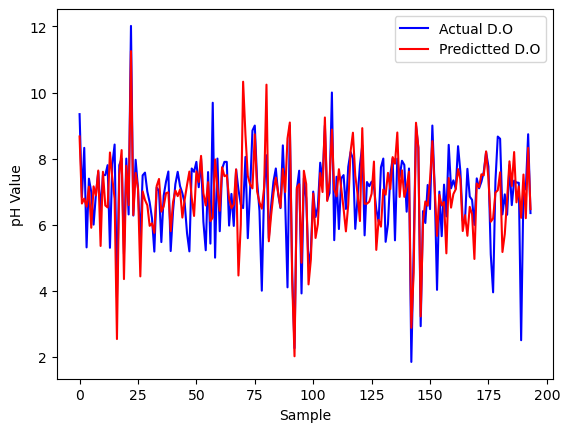

In [362]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted D.O')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [363]:
diff_pH = yhat_pred.flatten() - y_val

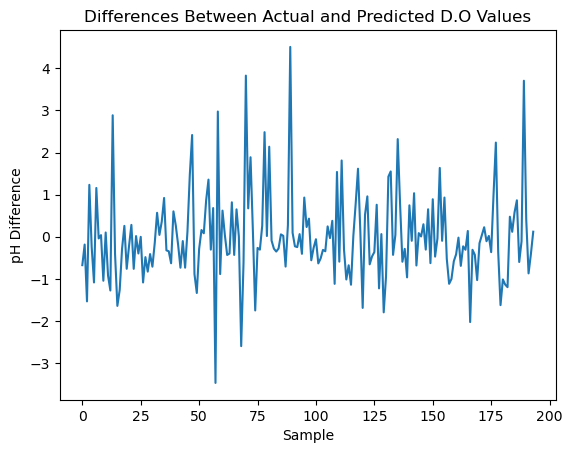

In [364]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [405]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 14.4229
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.7553
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.9793
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5856
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3528
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3155
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2863
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3440
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.5391
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3316
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2922
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2444
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8274
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7795
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8164
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8902
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7215
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8036
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8449
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8059
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7745
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9300
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9012
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7872
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.5723
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5354
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6137
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5821
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5506
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5445
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5139
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5398
Epoch 207/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5248
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5420
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5299
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5485
Epoch 211/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.5855
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5560
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5913
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5510
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5504
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6159
Epoch 303/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5867
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5320
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5474
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4989
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6367
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6937
Epoch 309/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.4041
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4300
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3768
Epoch 398/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3546
Epoch 399/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3557
Epoch 400/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4533
Epoch 401/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3846
Epoch 402/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3788
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4001
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3507
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3335
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3622
Epoch 407/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2641
Epoch 494/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2940
Epoch 495/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2978
Epoch 496/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2882
Epoch 497/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3085
Epoch 498/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3202
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3562
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2801
Epoch 501/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2975
Epoch 502/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3446
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3100
Epoch 504/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3175
Epoch 505/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2703
Epoch 592/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3953
Epoch 593/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2360
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2921
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3167
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2756
Epoch 597/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2459
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2101
Epoch 599/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2943
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2465
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2784
Epoch 602/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2667
Epoch 603/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2856
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3394
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3038
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2015
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2609
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2052
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2193
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1932
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2004
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5192
Epoch 699/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3493
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2205
Epoch 701/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2116
Epoch 788/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1851
Epoch 789/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2202
Epoch 790/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1883
Epoch 791/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1439
Epoch 792/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1318
Epoch 793/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4478
Epoch 794/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4243
Epoch 795/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3831
Epoch 796/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3507
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3364
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3077
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.0820
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1514
Epoch 887/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1331
Epoch 888/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2382
Epoch 889/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2072
Epoch 890/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1553
Epoch 891/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0741
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4235
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2219
Epoch 894/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1536
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0431
Epoch 896/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0773
Epoch 897/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.8982
Epoch 984/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1334
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0911
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0374
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0325
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9583
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1201
Epoch 990/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.1604
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0757
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0041
Epoch 993/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0018
Epoch 994/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.1313
Epoch 995/1000
25/2

In [406]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 3ms/step


In [407]:
MSE_pred

[1.4115384758819622]

In [408]:
MSE_pred

[1.4115384758819622]

In [409]:
MSE_train

[0.6963134165793077]

In [410]:
MSE_train

[0.6963134165793077]

In [411]:
yhat_pred

array([[ 9.305444 ],
       [ 6.2938666],
       [ 6.573562 ],
       [ 7.155151 ],
       [ 7.2524295],
       [ 4.964423 ],
       [ 6.6186237],
       [ 6.8310866],
       [ 7.6018357],
       [ 6.0416036],
       [ 7.474464 ],
       [ 6.332783 ],
       [ 6.994028 ],
       [ 7.519745 ],
       [ 7.229362 ],
       [ 6.5846825],
       [ 2.301422 ],
       [ 7.460531 ],
       [ 7.848311 ],
       [ 4.724701 ],
       [ 6.962245 ],
       [ 6.658346 ],
       [11.602741 ],
       [ 6.590827 ],
       [ 7.341907 ],
       [ 6.6255937],
       [ 6.2649817],
       [ 6.6525693],
       [ 6.962185 ],
       [ 6.4940724],
       [ 6.36593  ],
       [ 6.40274  ],
       [ 5.1076703],
       [ 6.9698744],
       [ 7.170695 ],
       [ 6.6828856],
       [ 6.568395 ],
       [ 7.465772 ],
       [ 6.5710235],
       [ 5.4482007],
       [ 6.7368565],
       [ 7.082662 ],
       [ 6.53888  ],
       [ 7.239631 ],
       [ 6.3021545],
       [ 6.704444 ],
       [ 6.916961 ],
       [ 7.37

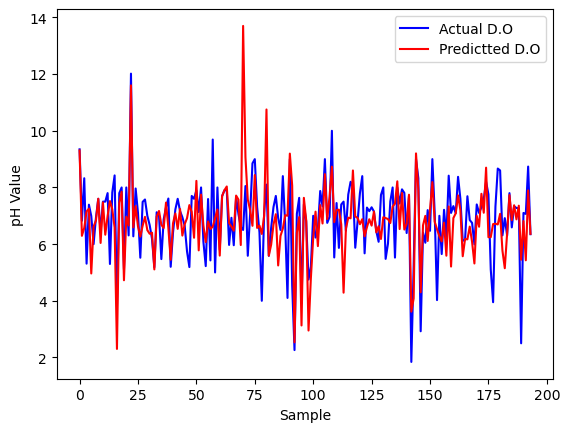

In [412]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual D.O')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted D.O')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [413]:
diff_pH = yhat_pred.flatten() - y_val

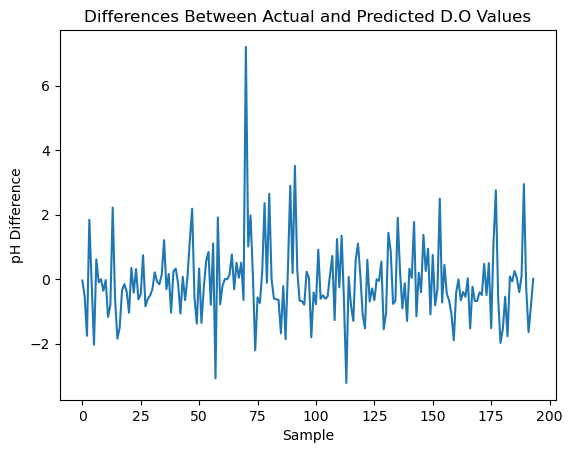

In [414]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted D.O Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [235]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 2s 2ms/step - loss: 36.1185
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 5.4592
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.1833
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5444
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.5508
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.4854
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.5286
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3838
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3598
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3219
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3086
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3458
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7170
Epoch 102/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7786
Epoch 103/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7164
Epoch 104/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6928
Epoch 105/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7116
Epoch 106/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7620
Epoch 107/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8792
Epoch 108/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.0150
Epoch 109/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8465
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8998
Epoch 111/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7613
Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7562
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.5992
Epoch 200/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6839
Epoch 201/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7046
Epoch 202/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5233
Epoch 203/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5533
Epoch 204/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4589
Epoch 205/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4715
Epoch 206/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5867
Epoch 207/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5061
Epoch 208/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5212
Epoch 209/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5681
Epoch 210/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5624
Epoch 211/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3951
Epoch 298/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5716
Epoch 299/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4625
Epoch 300/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4050
Epoch 301/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3446
Epoch 302/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3654
Epoch 303/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4933
Epoch 304/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5191
Epoch 305/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4962
Epoch 306/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5460
Epoch 307/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5090
Epoch 308/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4093
Epoch 309/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.6345
Epoch 396/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5898
Epoch 397/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5804
Epoch 398/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5234
Epoch 399/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5165
Epoch 400/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5292
Epoch 401/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4476
Epoch 402/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4486
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4492
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6385
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5753
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3196
Epoch 407/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.2360
Epoch 494/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2800
Epoch 495/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2860
Epoch 496/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5594
Epoch 497/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4069
Epoch 498/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2950
Epoch 499/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2928
Epoch 500/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2967
Epoch 501/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5153
Epoch 502/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4639
Epoch 503/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6203
Epoch 504/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2051
Epoch 505/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3762
Epoch 592/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3773
Epoch 593/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4316
Epoch 594/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5054
Epoch 595/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3818
Epoch 596/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3701
Epoch 597/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3038
Epoch 598/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4396
Epoch 599/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4076
Epoch 600/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2968
Epoch 601/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3197
Epoch 602/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4402
Epoch 603/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.4628
Epoch 690/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5841
Epoch 691/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5034
Epoch 692/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4400
Epoch 693/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4397
Epoch 694/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4604
Epoch 695/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4607
Epoch 696/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4322
Epoch 697/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4372
Epoch 698/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4451
Epoch 699/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6710
Epoch 700/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5365
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3881
Epoch 788/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5391
Epoch 789/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4482
Epoch 790/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0450
Epoch 791/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6264
Epoch 792/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4874
Epoch 793/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4318
Epoch 794/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4191
Epoch 795/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4599
Epoch 796/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4039
Epoch 797/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4260
Epoch 798/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4649
Epoch 799/1000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.5339
Epoch 886/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4916
Epoch 887/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6044
Epoch 888/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5808
Epoch 889/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4066
Epoch 890/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3818
Epoch 891/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4711
Epoch 892/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6520
Epoch 893/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4315
Epoch 894/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3608
Epoch 895/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5428
Epoch 896/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5338
Epoch 897/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.8312
Epoch 984/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8681
Epoch 985/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9493
Epoch 986/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0346
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8854
Epoch 988/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0141
Epoch 989/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9890
Epoch 990/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.0259
Epoch 991/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.0502
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9630
Epoch 993/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.9098
Epoch 994/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.9319
Epoch 995/1000
25/2

In [236]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 1ms/step


In [237]:
MSE_pred

[1.552087375899192]

In [238]:
MSE_train

[0.7785969397358649]

In [239]:
yhat_pred

array([[8.721276 ],
       [6.4737306],
       [7.27681  ],
       [8.524514 ],
       [5.233735 ],
       [5.2322216],
       [6.923058 ],
       [7.2958136],
       [6.6165605],
       [5.6949806],
       [7.0797577],
       [7.2967553],
       [7.919046 ],
       [7.684895 ],
       [6.960993 ],
       [7.0154185],
       [5.764898 ],
       [4.9018965],
       [8.412981 ],
       [5.5834274],
       [8.557592 ],
       [7.198969 ],
       [9.491705 ],
       [6.463753 ],
       [8.2712555],
       [6.877729 ],
       [8.487373 ],
       [7.177866 ],
       [6.6724687],
       [6.591428 ],
       [6.5382123],
       [7.2597294],
       [5.344859 ],
       [6.978629 ],
       [6.3532677],
       [6.4759636],
       [6.918542 ],
       [7.2473946],
       [7.1323004],
       [6.804308 ],
       [6.3547134],
       [6.9317594],
       [6.7862964],
       [7.197462 ],
       [6.804308 ],
       [6.955653 ],
       [6.978665 ],
       [8.457998 ],
       [6.286883 ],
       [7.19824  ],


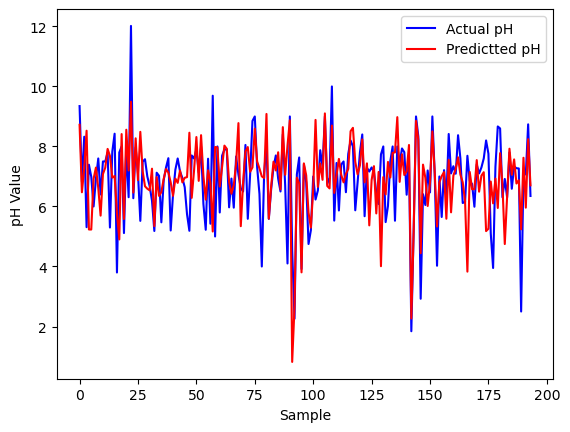

In [240]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [241]:
diff_pH = yhat_pred.flatten()- y_val

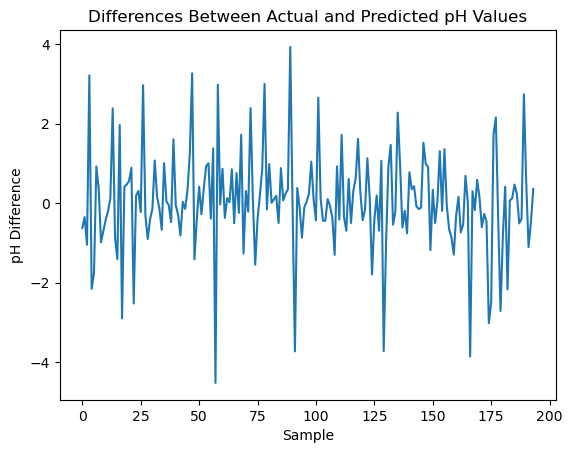

In [242]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

In [243]:
lamdas = [0.001]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
25/25 [==============================] - 4s 4ms/step - loss: 35.7360
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 6.0351
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.9627
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.6052
Epoch 5/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.4739
Epoch 6/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.4224
Epoch 7/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.3793
Epoch 8/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.3960
Epoch 9/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.3593
Epoch 10/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.5451
Epoch 11/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.2858
Epoch 12/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.3096
Epoch 13/1000
25/25 [===

Epoch 101/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5957
Epoch 102/1000
25/25 [==============================] - 0s 10ms/step - loss: 1.6009
Epoch 103/1000
25/25 [==============================] - 0s 10ms/step - loss: 1.5942
Epoch 104/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7026
Epoch 105/1000
25/25 [==============================] - 0s 9ms/step - loss: 1.5938
Epoch 106/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.5541
Epoch 107/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8124
Epoch 108/1000
25/25 [==============================] - 0s 10ms/step - loss: 1.5947
Epoch 109/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7911
Epoch 110/1000
25/25 [==============================] - 0s 7ms/step - loss: 2.2074
Epoch 111/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7865
Epoch 112/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.6471
E

25/25 [==============================] - 0s 5ms/step - loss: 1.5795
Epoch 200/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6485
Epoch 201/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5220
Epoch 202/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6466
Epoch 203/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6468
Epoch 204/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.9903
Epoch 205/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7069
Epoch 206/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5834
Epoch 207/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.5723
Epoch 208/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5461
Epoch 209/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5395
Epoch 210/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5379
Epoch 211/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 1.7660
Epoch 298/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6667
Epoch 299/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7985
Epoch 300/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6597
Epoch 301/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6710
Epoch 302/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.5922
Epoch 303/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9568
Epoch 304/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.9236
Epoch 305/1000
25/25 [==============================] - 0s 9ms/step - loss: 1.7254
Epoch 306/1000
25/25 [==============================] - 0s 15ms/step - loss: 1.5974
Epoch 307/1000
25/25 [==============================] - 0s 15ms/step - loss: 1.5071
Epoch 308/1000
25/25 [==============================] - 0s 12ms/step - loss: 1.8423
Epoch 309/1000
2

25/25 [==============================] - 0s 3ms/step - loss: 1.9474
Epoch 396/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.8616
Epoch 397/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.8172
Epoch 398/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8369
Epoch 399/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.2567
Epoch 400/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8427
Epoch 401/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7675
Epoch 402/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7671
Epoch 403/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7849
Epoch 404/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.8404
Epoch 405/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7432
Epoch 406/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7953
Epoch 407/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.5381
Epoch 494/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6235
Epoch 495/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.7391
Epoch 496/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.8660
Epoch 497/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6365
Epoch 498/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5535
Epoch 499/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5421
Epoch 500/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5185
Epoch 501/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5717
Epoch 502/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5395
Epoch 503/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5707
Epoch 504/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5168
Epoch 505/1000
25/2

25/25 [==============================] - 0s 5ms/step - loss: 1.4578
Epoch 592/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5294
Epoch 593/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5319
Epoch 594/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4788
Epoch 595/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4799
Epoch 596/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4972
Epoch 597/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.4967
Epoch 598/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.5183
Epoch 599/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4791
Epoch 600/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4886
Epoch 601/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5198
Epoch 602/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4516
Epoch 603/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 1.4537
Epoch 690/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.4265
Epoch 691/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.7271
Epoch 692/1000
25/25 [==============================] - 0s 9ms/step - loss: 1.8019
Epoch 693/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5697
Epoch 694/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5183
Epoch 695/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4881
Epoch 696/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4986
Epoch 697/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.4917
Epoch 698/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.5024
Epoch 699/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.4543
Epoch 700/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.4597
Epoch 701/1000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.3948
Epoch 788/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3742
Epoch 789/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3492
Epoch 790/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3585
Epoch 791/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3445
Epoch 792/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3758
Epoch 793/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4094
Epoch 794/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3635
Epoch 795/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3815
Epoch 796/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4906
Epoch 797/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4575
Epoch 798/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.3886
Epoch 799/1000
25/2

25/25 [==============================] - 0s 5ms/step - loss: 1.4800
Epoch 886/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4362
Epoch 887/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4852
Epoch 888/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4813
Epoch 889/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4235
Epoch 890/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4177
Epoch 891/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3448
Epoch 892/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3702
Epoch 893/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3879
Epoch 894/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4056
Epoch 895/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4263
Epoch 896/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3748
Epoch 897/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 1.7376
Epoch 984/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6435
Epoch 985/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6114
Epoch 986/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6619
Epoch 987/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5479
Epoch 988/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5580
Epoch 989/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5586
Epoch 990/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5842
Epoch 991/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5368
Epoch 992/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5766
Epoch 993/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.6339
Epoch 994/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5681
Epoch 995/1000
25/2

In [244]:
MSE_pred = [None] * len(models)
MSE_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_val))
    MSE_pred[i] = MSE(y_val,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    MSE_train[i] = MSE(y_train,yhat_train)

25/25 [==============================] - 0s 3ms/step


In [245]:
MSE_pred

[0.9511991002386508]

In [246]:
MSE_train

[1.3049584794108904]

In [247]:
yhat_pred

array([[ 8.8358   ],
       [ 6.8578353],
       [ 6.646755 ],
       [ 6.9323006],
       [ 7.2159953],
       [ 6.2094684],
       [ 6.40509  ],
       [ 6.604831 ],
       [ 5.8668966],
       [ 6.1835613],
       [ 7.077038 ],
       [ 5.956946 ],
       [ 7.1670957],
       [ 6.8307333],
       [ 7.391082 ],
       [ 6.422303 ],
       [ 4.6431055],
       [ 5.7765784],
       [ 7.907924 ],
       [ 5.1288033],
       [ 7.235457 ],
       [ 6.4374466],
       [ 9.44899  ],
       [ 6.1983023],
       [ 7.9175267],
       [ 6.740063 ],
       [ 6.815347 ],
       [ 6.7699428],
       [ 7.228092 ],
       [ 6.3511276],
       [ 6.306836 ],
       [ 5.8097243],
       [ 5.7492037],
       [ 6.7705846],
       [ 6.5686855],
       [ 5.918102 ],
       [ 7.3739815],
       [ 7.207747 ],
       [ 6.617759 ],
       [ 5.707433 ],
       [ 6.0148034],
       [ 6.419708 ],
       [ 6.506383 ],
       [ 6.109272 ],
       [ 5.7283764],
       [ 6.3647337],
       [ 7.13757  ],
       [ 7.09

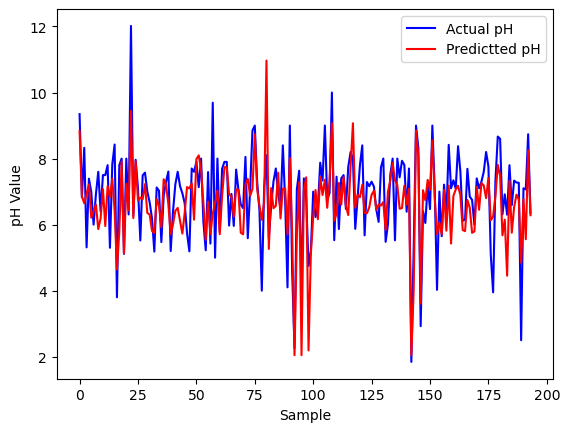

In [248]:
plt.plot(range(len(y_val)),y_val,'b',label='Actual pH')
plt.plot(range(len(yhat_pred)),yhat_pred,'r',label='Predictted pH')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('pH Value');

In [249]:
diff_pH = yhat_pred.flatten() - y_val

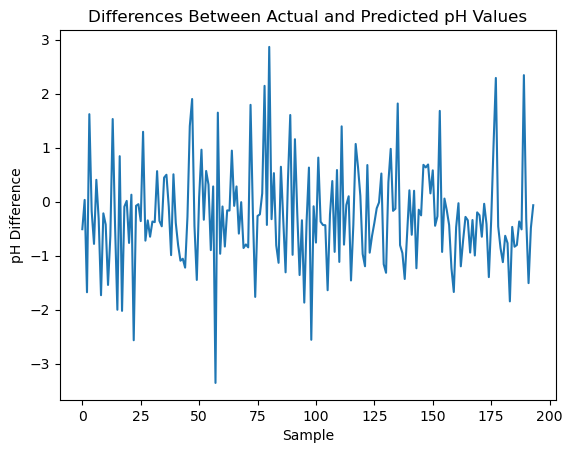

In [250]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences Between Actual and Predicted pH Values')
plt.xlabel('Sample')
plt.ylabel('pH Difference');

#### DUMPING NEEDED MODELS AND PREPROCCESSORS

In [271]:
# import joblib

##### Dumping for pH

In [272]:
# joblib.dump(xgb_pH_model,'pH_model.sav')

##### Dumping for DO

In [273]:
# joblib.dump(random_forest_do_model,'do_model.sav')